In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from numpy import save,load
from pathlib import Path
from sklearn import svm,preprocessing
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm
from collections import Counter


# Import own code
import data_processing as proc


# Getting the data

In [2]:
path_data = Path('../Data/2D_Model/Grid_Simulation/taua_1000/')
path_regime = Path('../Data/2D_Model/Grid_Simulation/taua_1000/Regime_diagonals_matrices/')

In [3]:
main_path_mult = Path.joinpath(path_data, "Mult_Noise/N_600/Gauss/grid_mult/")
main_path_mult2 = Path.joinpath(path_data, "Mult_Noise/N_1200/Gauss/grid_mult/")
main_path_mult3 = Path.joinpath(path_data, "Mult_Noise/N_300/Gauss/grid_mult/")
main_path_mult4 = Path.joinpath(path_data, "Mult_Noise/N_600/Gauss/grid_mult2/")
main_path_mult5 = Path.joinpath(path_data, "Mult_Noise/N_1200/Gauss/grid_mult2/")
main_path_mult6 = Path.joinpath(path_data, "Mult_Noise/N_300/Gauss/grid_mult2/")
main_path_add = Path.joinpath(path_data, "Add_Noise/Constant_noise/noise_exc_only/sigma_022/grid_add_noadaptnoise_const/")
main_path_add2 = Path.joinpath(path_data, "Add_Noise/Constant_noise/noise_exc_only/sigma_03/grid_add_noadaptnoise_consthigh/")
main_path_add3 = Path.joinpath(path_data, "Add_Noise/Constant_noise/noise_exc_only/sigma_013/grid_add_noadaptnoise_constlow/")
main_path_add4 = Path.joinpath(path_data, "Add_Noise/Constant_noise/noise_exc_only/sigma_022/grid_add_noadaptnoise_const2/")
main_path_add5 = Path.joinpath(path_data, "Add_Noise/Constant_noise/noise_exc_only/sigma_03/grid_add_noadaptnoise_consthigh2/")
main_path_add6 = Path.joinpath(path_data, "Add_Noise/Constant_noise/noise_exc_only/sigma_013/grid_add_noadaptnoise_constlow2/")

In [4]:
regime_matrix = load(Path.joinpath(path_regime, "regime_matrix.npy"))

In [5]:
# obtain data with >= 400 transitions
data_mult1 = proc.get_400_transitions_data(main_path_mult,regime_matrix,0)
data_mult2 = proc.get_400_transitions_data(main_path_mult2,regime_matrix,0)
data_mult3 = proc.get_400_transitions_data(main_path_mult3,regime_matrix,0)
data_add1 = proc.get_400_transitions_data(main_path_add,regime_matrix,1)
data_add2 = proc.get_400_transitions_data(main_path_add2,regime_matrix,1)
data_add3 = proc.get_400_transitions_data(main_path_add3,regime_matrix,1)
data_mult4 = proc.get_400_transitions_data(main_path_mult4,regime_matrix,0)
data_mult5 = proc.get_400_transitions_data(main_path_mult5,regime_matrix,0)
data_mult6 = proc.get_400_transitions_data(main_path_mult6,regime_matrix,0)
data_add4 = proc.get_400_transitions_data(main_path_add4,regime_matrix,1)
data_add5 = proc.get_400_transitions_data(main_path_add5,regime_matrix,1)
data_add6 = proc.get_400_transitions_data(main_path_add6,regime_matrix,1)

# getting data with significant SCC (SCC > 0.1)
data_mult1_filter = proc.get_significant_scc_data(main_path_mult,regime_matrix,0)
data_mult2_filter = proc.get_significant_scc_data(main_path_mult2,regime_matrix,0)
data_mult3_filter = proc.get_significant_scc_data(main_path_mult3,regime_matrix,0)
data_add1_filter = proc.get_significant_scc_data(main_path_add,regime_matrix,1)
data_add2_filter = proc.get_significant_scc_data(main_path_add2,regime_matrix,1)
data_add3_filter = proc.get_significant_scc_data(main_path_add3,regime_matrix,1)

# reduced feature set: percup,cvdiff,sccdiff and noise strength for the figures
# data with 400 transitions only

X_mult1,noise_mult1,regime_mult1 = proc.data_with_scc_classify_noise_or_regime(data_mult1,1)
X_mult2,noise_mult2,regime_mult2 = proc.data_with_scc_classify_noise_or_regime(data_mult2,0)
X_mult3,noise_mult3,regime_mult3 = proc.data_with_scc_classify_noise_or_regime(data_mult3,2)
X_add1,noise_add1,regime_add1 = proc.data_with_scc_classify_noise_or_regime(data_add1,4)
X_add2,noise_add2,regime_add2 = proc.data_with_scc_classify_noise_or_regime(data_add2,5)
X_add3,noise_add3,regime_add3 = proc.data_with_scc_classify_noise_or_regime(data_add3,3)
X_mult4,noise_mult4,regime_mult4 = proc.data_with_scc_classify_noise_or_regime(data_mult4,1)
X_mult5,noise_mult5,regime_mult5 = proc.data_with_scc_classify_noise_or_regime(data_mult5,0)
X_mult6,noise_mult6,regime_mult6 = proc.data_with_scc_classify_noise_or_regime(data_mult6,2)
X_add4,noise_add4,regime_add4 = proc.data_with_scc_classify_noise_or_regime(data_add4,4)
X_add5,noise_add5,regime_add5 = proc.data_with_scc_classify_noise_or_regime(data_add5,5)
X_add6,noise_add6,regime_add6 = proc.data_with_scc_classify_noise_or_regime(data_add6,3)

X_mult1_filter,noise_mult1_filter,regime_mult1_filter = proc.data_with_scc_classify_noise_or_regime(data_mult1_filter,1)
X_mult2_filter,noise_mult2_filter,regime_mult2_filter = proc.data_with_scc_classify_noise_or_regime(data_mult2_filter,0)
X_mult3_filter,noise_mult3_filter,regime_mult3_filter = proc.data_with_scc_classify_noise_or_regime(data_mult3_filter,2)
X_add1_filter,noise_add1_filter,regime_add1_filter = proc.data_with_scc_classify_noise_or_regime(data_add1_filter,4)
X_add2_filter,noise_add2_filter,regime_add2_filter = proc.data_with_scc_classify_noise_or_regime(data_add2_filter,5)
X_add3_filter,noise_add3_filter,regime_add3_filter = proc.data_with_scc_classify_noise_or_regime(data_add3_filter,3)

# full feature set
# feature set: percup_notnan,percdown_notnan,meanup_notnan,meandown_notnan,cvup_notnan,cvdown_notnan,scclag0_notnan,scclag1_notnan,mean_diff,cv_diff,scc_diff,noise_strength_notnan
# data with 400 transitions only

X_mult1_full,noise_mult1_full,regime_mult1_full = proc.data_with_all_features_classify_noise_or_regime(data_mult1,1)
X_mult2_full,noise_mult2_full,regime_mult2_full = proc.data_with_all_features_classify_noise_or_regime(data_mult2,0)
X_mult3_full,noise_mult3_full,regime_mult3_full = proc.data_with_all_features_classify_noise_or_regime(data_mult3,2)
X_add1_full,noise_add1_full,regime_add1_full = proc.data_with_all_features_classify_noise_or_regime(data_add1,4)
X_add2_full,noise_add2_full,regime_add2_full = proc.data_with_all_features_classify_noise_or_regime(data_add2,5)
X_add3_full,noise_add3_full,regime_add3_full = proc.data_with_all_features_classify_noise_or_regime(data_add3,3)
X_mult4_full,noise_mult4_full,regime_mult4_full = proc.data_with_all_features_classify_noise_or_regime(data_mult4,1)
X_mult5_full,noise_mult5_full,regime_mult5_full = proc.data_with_all_features_classify_noise_or_regime(data_mult5,0)
X_mult6_full,noise_mult6_full,regime_mult6_full = proc.data_with_all_features_classify_noise_or_regime(data_mult6,2)
X_add4_full,noise_add4_full,regime_add4_full = proc.data_with_all_features_classify_noise_or_regime(data_add4,4)
X_add5_full,noise_add5_full,regime_add5_full = proc.data_with_all_features_classify_noise_or_regime(data_add5,5)
X_add6_full,noise_add6_full,regime_add6_full = proc.data_with_all_features_classify_noise_or_regime(data_add6,3)

# get all features but with significant SCC
X_mult1_filter_full,noise_mult1_filter_full,regime_mult1_filter_full = proc.data_with_all_features_classify_noise_or_regime(data_mult1_filter,1)
X_mult2_filter_full,noise_mult2_filter_full,regime_mult2_filter_full = proc.data_with_all_features_classify_noise_or_regime(data_mult2_filter,0)
X_mult3_filter_full,noise_mult3_filter_full,regime_mult3_filter_full = proc.data_with_all_features_classify_noise_or_regime(data_mult3_filter,2)
X_add1_filter_full,noise_add1_filter_full,regime_add1_filter_full = proc.data_with_all_features_classify_noise_or_regime(data_add1_filter,4)
X_add2_filter_full,noise_add2_filter_full,regime_add2_filter_full = proc.data_with_all_features_classify_noise_or_regime(data_add2_filter,5)
X_add3_filter_full,noise_add3_filter_full,regime_add3_filter_full = proc.data_with_all_features_classify_noise_or_regime(data_add3_filter,3)



/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Masterthesis/Code/data_processing.py:160: RuntimeWarning: invalid value encountered in greater
  filter_stats =  np.logical_and(stats_data[-1] > 0.1,stats_data[-2] > 0.1)


In [6]:
# create the datasets for classifiers
# concatenation of different noise strengths
X = np.concatenate((X_mult1,X_mult2,X_mult3,X_add1,X_add2,X_add3))# dataset needed for noise classification
X_add = np.concatenate((X_add1,X_add2,X_add3)) # dataset needed for regime classification
X_mult = np.concatenate((X_mult1,X_mult2,X_mult3))# dataset needed for regime classification
label_noise = np.concatenate((noise_mult1,noise_mult2,noise_mult3,noise_add1,noise_add2,noise_add3)) # labels for noise classification
label_mult_regime = np.concatenate((regime_mult1,regime_mult2,regime_mult3)) # labels for regime classification
label_add_regime = np.concatenate((regime_add1,regime_add2,regime_add3))# labels for regime classification

X_filter = np.concatenate((X_mult1_filter,X_mult2_filter,X_mult3_filter,X_add1_filter,X_add2_filter,X_add3_filter))
label_filter_noise = np.concatenate((noise_mult1_filter,noise_mult2_filter,noise_mult3_filter,noise_add1_filter,noise_add2_filter,noise_add3_filter))
label_filter_regime = np.concatenate((regime_mult1_filter,regime_mult2_filter,regime_mult3_filter,regime_add1_filter,regime_add2_filter,regime_add3_filter))

In [7]:
X_full = np.concatenate((X_mult1_full,X_mult2_full,X_mult3_full,X_add1_full,X_add2_full,X_add3_full))
X_full_mult = np.concatenate((X_mult1_full,X_mult2_full,X_mult3_full))
X_full_add = np.concatenate((X_add1_full,X_add2_full,X_add3_full))
label_full_noise = np.concatenate((noise_mult1_full,noise_mult2_full,noise_mult3_full,noise_add1_full,noise_add2_full,noise_add3_full))
label_full_mult_regime = np.concatenate((regime_mult1_full,regime_mult2_full,regime_mult3_full))
label_full_add_regime = np.concatenate((regime_add1_full,regime_add2_full,regime_add3_full))


X_filter_full = np.concatenate((X_mult1_filter_full,X_mult2_filter_full,X_mult3_filter_full,X_add1_filter_full,X_add2_filter_full,X_add3_filter_full))
label_filter_full_noise = np.concatenate((noise_mult1_filter_full,noise_mult2_filter_full,noise_mult3_filter_full,noise_add1_filter_full,noise_add2_filter_full,noise_add3_filter_full))
label_filter_full_regime = np.concatenate((regime_mult1_filter_full,regime_mult2_filter_full,regime_mult3_filter_full,regime_add1_filter_full,regime_add2_filter_full,regime_add3_filter_full))



In [8]:
X.shape
#percup,cv_diff,scc_diff

X_full.shape
# exclude ratios from the data
feature_names = ["percup","percdown","meanup","meandown","cvup","cvdown","scclag0","scclag1","mean_diff","cv_diff","scc_diff"]

In [9]:
path_save = '/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Latex/images/image'
path_save_2 = '/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Latex/images/image2'

# Classification into noise type (add vs mult)

In [26]:
def SVM_prediction_subsets(data,labels):
    """SVM prediction for noise type: mult vs add
    Prediction on the different subset combinations of percUp,CVDiff,sccdiff
    data: features need to be percUp,CVDiff,sccdiff,noise_strength. 
    Noise strength will be removed in the beginning from the train and test set but is used only for evaluation."""
    scaler = preprocessing.StandardScaler().fit(data) 
    X_stand = scaler.transform(data)# standardizing dataset
    X_train, X_test, y_train, y_test = train_test_split(X_stand, labels, test_size=0.33) # train test split
    #n_data,dim_data = X_train.shape
    
    noise_strength_train,noise_strength_test = X_train[:,3], X_test[:,3] # get the noise type
    X_train, X_test = X_train[:,:3],X_test[:,:3] # remove the noise type from data
    X_train_percupcv, X_test_percupcv = X_train[:,:2] , X_test[:,:2]
    X_train_percupscc, X_test_percupscc = X_train[:,[0,2]] , X_test[:,[0,2]]
    X_train_cvscc, X_test_cvscc = X_train[:,[1,2]] , X_test[:,[1,2]]
       
    X_train_onlyscc, X_test_onlyscc = X_train[:,2].reshape(-1, 1) , X_test[:,2].reshape(-1, 1)
    X_train_onlypercup, X_test_onlypercup = X_train[:,0].reshape(-1, 1) , X_test[:,0].reshape(-1, 1)
    X_train_onlycv, X_test_onlycv = X_train[:,1].reshape(-1, 1) , X_test[:,1].reshape(-1, 1)
    
    clf_all = svm.SVC(kernel='linear', C = 1)
    clf_all.fit(X_train,y_train)
    accuracy_all = accuracy_score(y_train,clf_all.predict(X_train))
    test_predict_all = clf_all.predict(X_test)
    accuracy_test_all = accuracy_score(y_test,test_predict_all)
    
    clf_percupcv = svm.SVC(kernel='linear', C = 1)
    clf_percupcv.fit(X_train_percupcv,y_train)
    accuracy_percupcv = accuracy_score(y_train,clf_percupcv.predict(X_train_percupcv))
    test_predict_percupcv = clf_percupcv.predict(X_test_percupcv)
    accuracy_test_percupcv = accuracy_score(y_test,test_predict_percupcv)
    
    clf_percupscc = svm.SVC(kernel='linear', C = 1)
    clf_percupscc.fit(X_train_percupscc,y_train)
    accuracy_percupscc = accuracy_score(y_train,clf_percupscc.predict(X_train_percupscc))
    test_predict_percupscc = clf_percupscc.predict(X_test_percupscc)
    accuracy_test_percupscc = accuracy_score(y_test,test_predict_percupscc)
    
    clf_cvscc = svm.SVC(kernel='linear', C = 1)
    clf_cvscc.fit(X_train_cvscc,y_train)
    accuracy_cvscc = accuracy_score(y_train,clf_cvscc.predict(X_train_cvscc))
    test_predict_cvscc = clf_cvscc.predict(X_test_cvscc)
    accuracy_test_cvscc = accuracy_score(y_test,test_predict_cvscc)
    
    clf_onlyscc = svm.SVC(kernel='linear', C = 1)
    clf_onlyscc.fit(X_train_onlyscc,y_train)
    accuracy_onlyscc = accuracy_score(y_train,clf_onlyscc.predict(X_train_onlyscc))
    test_predict_onlyscc = clf_onlyscc.predict(X_test_onlyscc)
    accuracy_test_onlyscc = accuracy_score(y_test,test_predict_onlyscc)
    
    clf_onlypercup = svm.SVC(kernel='linear', C = 1)
    clf_onlypercup.fit(X_train_onlypercup,y_train)
    accuracy_onlypercup = accuracy_score(y_train,clf_onlypercup.predict(X_train_onlypercup))
    test_predict_onlypercup = clf_onlypercup.predict(X_test_onlypercup)
    accuracy_test_onlypercup = accuracy_score(y_test,test_predict_onlypercup)
    
    clf_onlycv = svm.SVC(kernel='linear', C = 1)
    clf_onlycv.fit(X_train_onlycv,y_train)
    accuracy_onlycv = accuracy_score(y_train,clf_onlycv.predict(X_train_onlycv))
    test_predict_onlycv = clf_onlycv.predict(X_test_onlycv)
    accuracy_test_onlycv = accuracy_score(y_test,test_predict_onlycv)
    

    
    print("Accuracy all Features")
    print("Accuracy Train",accuracy_all)
    print("Accuracy Test",accuracy_test_all)
    
    print(" ")
    print("Accuracy percUp,SCC Features")
    print("Accuracy Train percUp,SCC",accuracy_percupscc)
    print("Accuracy Test percUp,SCC",accuracy_test_percupscc)
    
    print(" ")
    print("Accuracy CV SCC Features")
    print("Accuracy Train",accuracy_cvscc)
    print("Accuracy Test",accuracy_test_cvscc)
    
    print(" ")
    print("Accuracy percUp CV Features")
    print("Accuracy Train",accuracy_percupcv)
    print("Accuracy Test",accuracy_test_percupcv)
    
    print(" ")
    print("Accuracy only SCC Features")
    print("Accuracy Train",accuracy_onlyscc)
    print("Accuracy Test",accuracy_test_onlyscc)
    
    print(" ")
    print("Accuracy only percUp Features")
    print("Accuracy Train",accuracy_onlypercup)
    print("Accuracy Test",accuracy_test_onlypercup)
    
    print(" ")
    print("Accuracy only CV Features")
    print("Accuracy Train",accuracy_onlycv)
    print("Accuracy Test",accuracy_test_onlycv)
    
    misclassified_all = np.where(y_test != test_predict_all)
    missclass_all = noise_strength_test[misclassified_all]
    #misclassified_noscc = np.where(y_test != test_predict_noscc)
    #misclassified_onlyscc = np.where(y_test != test_predict_onlyscc)
    #missclass_onlyscc = noise_strength_test[misclassified_onlyscc]
    
    
    # plots for thesis
    params = {'figure.figsize': (16,10),
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
    plt.rcParams.update(params)
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,constrained_layout = True)
    counts_train,bin_edges = np.histogram(y_train,bins = 2)
    counts_test,bin_edges =  np.histogram(y_test,bins = 2)
    labels = ['Mult', 'Add']

    ax1.bar(labels,counts_train,width = 0.5,color = ["tab:orange","tab:blue"])
    ax1.bar(labels,counts_test,width = 0.5,bottom = counts_train,color = ["tab:orange","tab:blue"],hatch = "/")
    ax1.set_ylabel("Count")
    pa1 = Patch(facecolor='tab:orange')
    pa2 = Patch(facecolor='tab:orange',hatch = "/")
    pa3 = Patch(facecolor='tab:blue')
    pa4 = Patch(facecolor='tab:blue',hatch = "/")
    ax1.set_title("Distribution of classes")

    ax1.legend(handles=[pa1,pa2,pa3,pa4],labels = ["","","Train","Test"],ncol = 2,columnspacing=-0.8,markerscale = 1.5,loc='center',
                 bbox_to_anchor=(-0.6, 0.5))
    
    conf_mat = confusion_matrix(y_test,test_predict_all)
    sns.heatmap(conf_mat,annot = True, annot_kws={"size":25},cmap = "Greens",fmt = "d",xticklabels=["Mult","Add"],yticklabels=["Mult","Add"],ax = ax2,cbar_kws = {'label':"Count"})
    ax2.set_xlabel("Predicted noise") # columns are where we predict the datapoint to lie in
    ax2.set_ylabel("True noise") #rows are the true regimes
    ax2.set_title("Confusion matrix test data")
    
    
    counts_all, bin_edges_all = np.histogram(noise_strength_test,bins = 6)
    counts_miss, bin_edges_miss = np.histogram(missclass_all,bins = 6)
    pa1 = Patch(facecolor='tab:orange')
    pa2 = Patch(facecolor='tab:blue')
    pa3 = Patch(facecolor='tab:red')
    ax3.set_title("Misclassification distribution")
    ax3.bar(bin_edges_all[:-1],counts_all,width = 0.2, color = ["tab:orange","tab:orange","tab:orange","tab:blue","tab:blue","tab:blue"])
    ax3.bar(bin_edges_miss[:-1],counts_miss,width = 0.2,color = ["tab:red"])
    ax3.set_xticks(bin_edges_all[:-1])
    ax3.set_xticklabels(["N = 1200","N = 600","N = 300",r"$\sigma = 0.13$",r"$\sigma = 0.22$",r"$\sigma = 0.3$"], rotation = 90)
    ax3.legend(handles=[pa1,pa2,pa3],labels = ["Mult","Add","Misclassified"],markerscale = 1.5,loc='center',bbox_to_anchor=(-0.6, 0.5))
    ax3.set_ylabel("Count")

    ax4.set_title("Misclassification Ratios")
    ax4.bar(bin_edges_miss[:-1],counts_miss/counts_all,width = 0.2, color = ["tab:orange","tab:orange","tab:orange","tab:blue","tab:blue","tab:blue"])
    ax4.set_xticks(bin_edges_miss[:-1])
    ax4.set_ylabel("Ratio")
    ax4.set_xticklabels(["N = 1200","N = 600","N = 300",r"$\sigma = 0.13$",r"$\sigma = 0.22$",r"$\sigma = 0.3$"], rotation = 90)
    
    plt.savefig(path_save,dpi=200,bbox_inches='tight')
    plt.show()
    # show classification against the SCC diff
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (24,5),constrained_layout = True)
    colors = np.array(["tab:orange","tab:blue"])
    y_test = y_test.astype(int)
    ax1.scatter(X_test_percupscc[:, 0], X_test_percupscc[:, 1], c = colors[y_test],s = 50)
    ax1.set_xlabel("percUp")
    ax1.set_ylabel("SCCdiff")
    w = clf_percupscc.coef_[0]
    a = -w[0] / w[1]

    xx = np.linspace(np.min(X_test_percupscc[:, 0]),np.max(X_test_percupscc[:, 0]))
    yy = a * xx - clf_percupscc.intercept_[0] / w[1]

    h0 = ax1.plot(xx, yy, 'k-', label="SVM decision plane")

    
    ax2.scatter(X_test_percupcv[:, 0], X_test_percupcv[:, 1], c = colors[y_test],s = 50)
    ax2.set_xlabel("percUp")
    ax2.set_ylabel("CVdiff")
    w = clf_percupcv.coef_[0]
    a = -w[0] / w[1]

    xx = np.linspace(np.min(X_test_percupcv[:, 0]),np.max(X_test_percupcv[:, 0]))
    yy = a * xx - clf_percupcv.intercept_[0] / w[1]

    h0 = ax2.plot(xx, yy, 'k-')
    
    
    ax3.scatter(X_test_cvscc[:, 0], X_test_cvscc[:, 1], c = colors[y_test],s = 50)
    ax3.set_xlabel("CVdiff")
    ax3.set_ylabel("SCCdiff")
    w = clf_cvscc.coef_[0]
    a = -w[0] / w[1]

    xx = np.linspace(np.min(X_test_cvscc[:, 0]),np.max(X_test_cvscc[:, 0]))
    yy = a * xx - clf_cvscc.intercept_[0] / w[1]

    h0 = ax3.plot(xx, yy, 'k-')
    
    
    pa1 = Line2D([0], [0], markerfacecolor='tab:orange',color = "white", marker = 'o',markersize = 15, label='Mult')
    pa2 = Line2D([0], [0], markerfacecolor='tab:blue',color = "white", marker = 'o',markersize = 15, label='Add')
    pa3 = Line2D([0], [0], color='black', lw=4, label="SVM \ndecision plane")
    plt.legend(handles=[pa1,pa2,pa3],loc='right',
                 bbox_to_anchor=(1.6, 0.5))
    
    #plt.savefig(path_save_2,dpi=200,bbox_inches='tight')
    
    plt.show()
    


In [23]:
def SVM_prediction(data,labels):
    """SVM prediction into noise type.
    More general than the function above can be used for different features."""
    scaler = preprocessing.StandardScaler().fit(data)
    X_stand = scaler.transform(data)
    X_train, X_test, y_train, y_test = train_test_split(X_stand, labels, test_size=0.33)
    n_data,dim_data = X_train.shape
    
 
    clf = svm.SVC(kernel='linear', C = 1)
    clf.fit(X_train,y_train)
    accuracy = accuracy_score(y_train,clf.predict(X_train))
    accuracy_test = accuracy_score(y_test,clf.predict(X_test))
    
    print("Accuracy Train",accuracy)
    print("Accuracy Test",accuracy_test)
    
    test_predict = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test,test_predict)
    sns.heatmap(conf_mat,annot = True,fmt = "d",xticklabels=["Mult","Add"],yticklabels=["Mult","Add"])
    plt.xlabel("Predicted regime") # columns are where we predict the datapoint to lie in
    plt.ylabel("True regime") #rows are the true regimes
    plt.title("Test data confusion matrix")
    plt.show()
     
    if dim_data == 2:
        plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
        w = clf.coef_[0]
        a = -w[0] / w[1]

        xx = np.linspace(np.min(X_test[:, 0]),np.max(X_test[:, 0]))
        yy = a * xx - clf.intercept_[0] / w[1]

        h0 = plt.plot(xx, yy, 'k-', label="SVM decision plane")


        plt.show()
        
    # plotting results for thesis
    params = {'figure.figsize': (7,5),
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
    plt.rcParams.update(params)
    fig, ax = plt.subplots()
    counts_train,bin_edges = np.histogram(y_train,bins = 2)
    counts_test,bin_edges =  np.histogram(y_test,bins = 2)
    labels = ['Mult', 'Add']

    ax.bar(labels,counts_train,color = ["tab:orange","tab:blue"])
    ax.bar(labels,counts_test,bottom = counts_train,color = ["tab:orange","tab:blue"],hatch = "/")
    pa1 = Patch(facecolor='tab:orange')
    pa2 = Patch(facecolor='tab:orange',hatch = "/")
    pa3 = Patch(facecolor='tab:blue')
    pa4 = Patch(facecolor='tab:blue',hatch = "/")

    ax.legend(handles=[pa1,pa2,pa3,pa4],labels = ["","","Train","Test"],ncol = 2,columnspacing=-0.8,markerscale = 1.5,loc='right',
                 bbox_to_anchor=(1.57, 0.5))

    plt.show()
    

Accuracy Train 0.8040983606557377
Accuracy Test 0.782392026578073


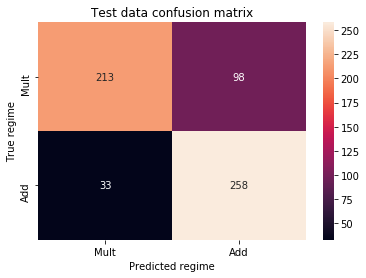

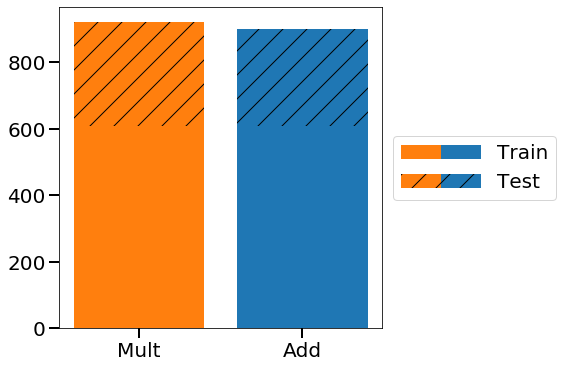

In [24]:
SVM_prediction(X[:,:3],label_noise)

Accuracy all Features
Accuracy Train 0.8
Accuracy Test 0.7807308970099668
 
Accuracy percUp,SCC Features
Accuracy Train percUp,SCC 0.7868852459016393
Accuracy Test percUp,SCC 0.782392026578073
 
Accuracy CV SCC Features
Accuracy Train 0.7934426229508197
Accuracy Test 0.792358803986711
 
Accuracy percUp CV Features
Accuracy Train 0.6811475409836065
Accuracy Test 0.6760797342192691
 
Accuracy only SCC Features
Accuracy Train 0.780327868852459
Accuracy Test 0.7740863787375415
 
Accuracy only percUp Features
Accuracy Train 0.5180327868852459
Accuracy Test 0.5132890365448505
 
Accuracy only CV Features
Accuracy Train 0.5918032786885246
Accuracy Test 0.5913621262458472


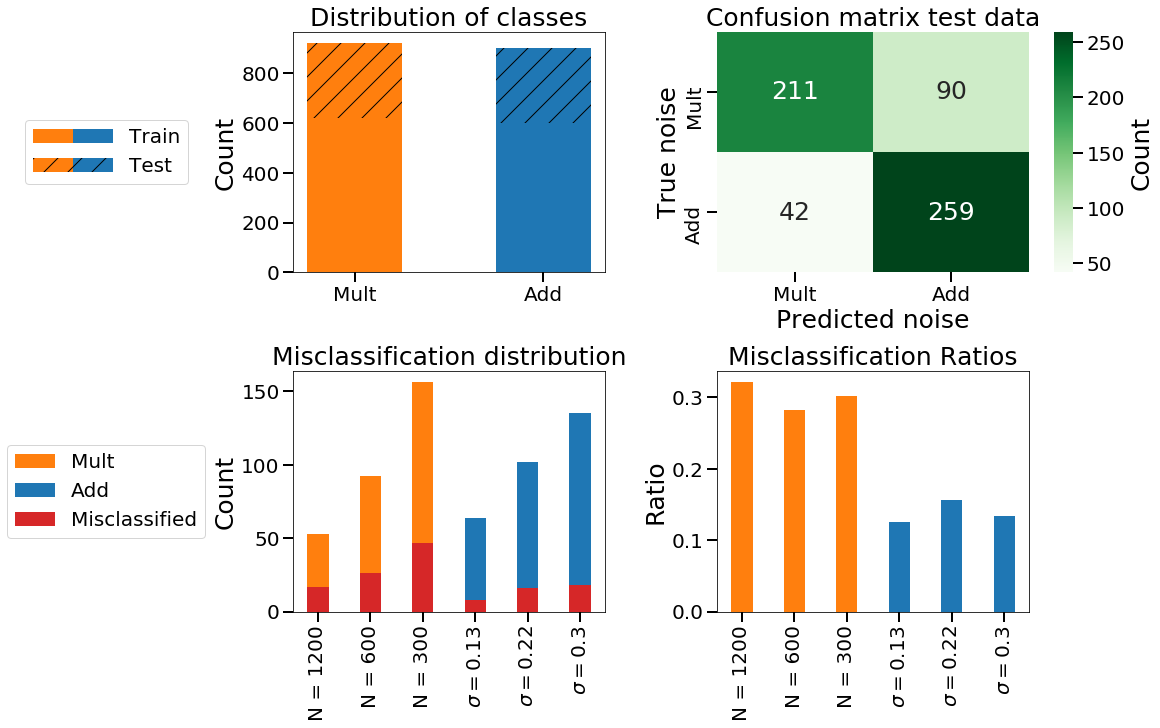

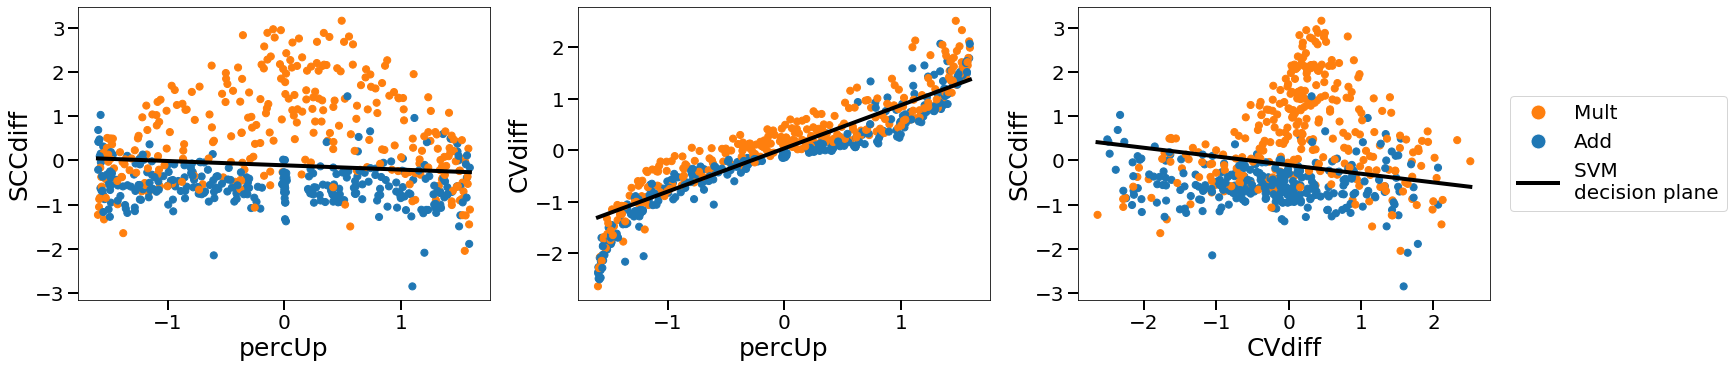

In [27]:
SVM_prediction_subsets(X,label_noise)

Accuracy all Features
Accuracy Train 0.8842281879194631
Accuracy Test 0.8673469387755102
 
Accuracy percUp,SCC Features
Accuracy Train percUp,SCC 0.8758389261744967
Accuracy Test percUp,SCC 0.8571428571428571
 
Accuracy CV SCC Features
Accuracy Train 0.8791946308724832
Accuracy Test 0.8673469387755102
 
Accuracy percUp CV Features
Accuracy Train 0.7835570469798657
Accuracy Test 0.8129251700680272
 
Accuracy only SCC Features
Accuracy Train 0.87248322147651
Accuracy Test 0.8503401360544217
 
Accuracy only percUp Features
Accuracy Train 0.5033557046979866
Accuracy Test 0.48299319727891155
 
Accuracy only CV Features
Accuracy Train 0.6359060402684564
Accuracy Test 0.6564625850340136


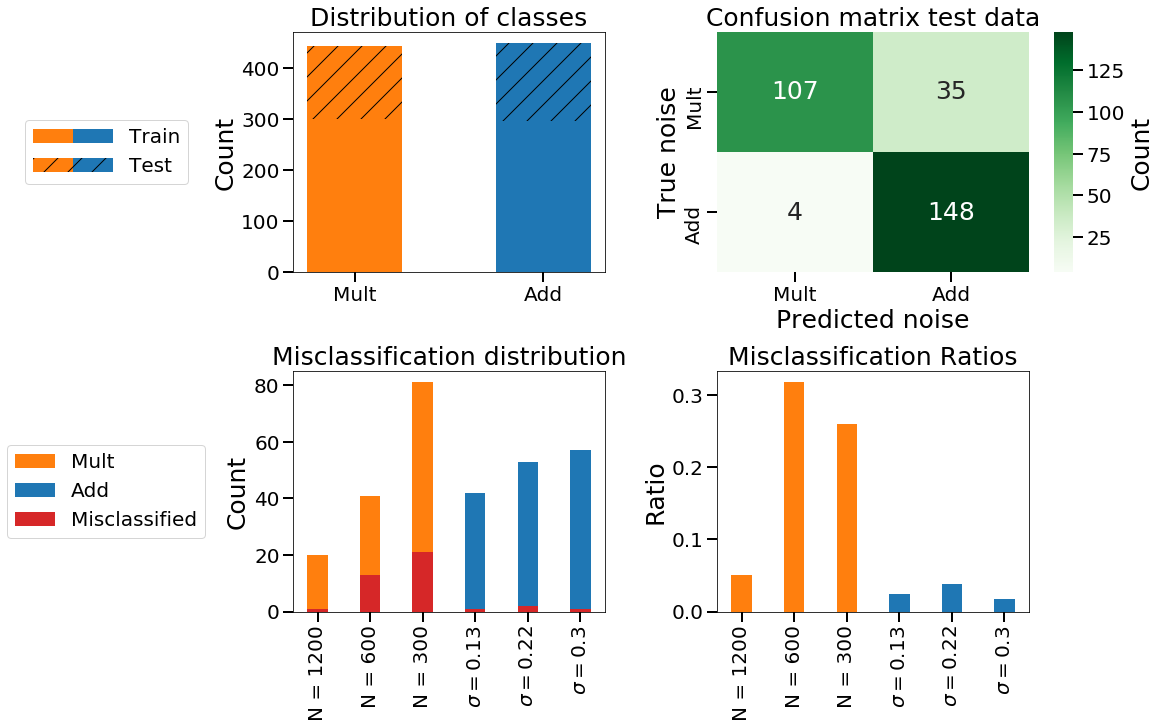

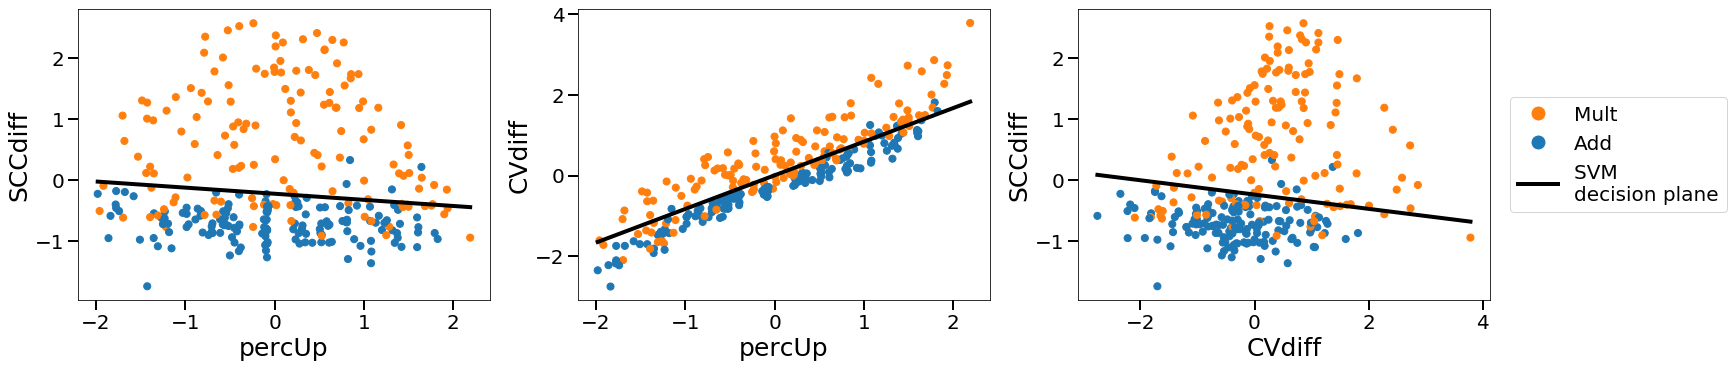

In [28]:
# same on filtered SCC > 0.1 dataset
SVM_prediction_subsets(X_filter,label_filter_noise)

Accuracy Train 0.7885245901639344
Accuracy Test 0.7857142857142857


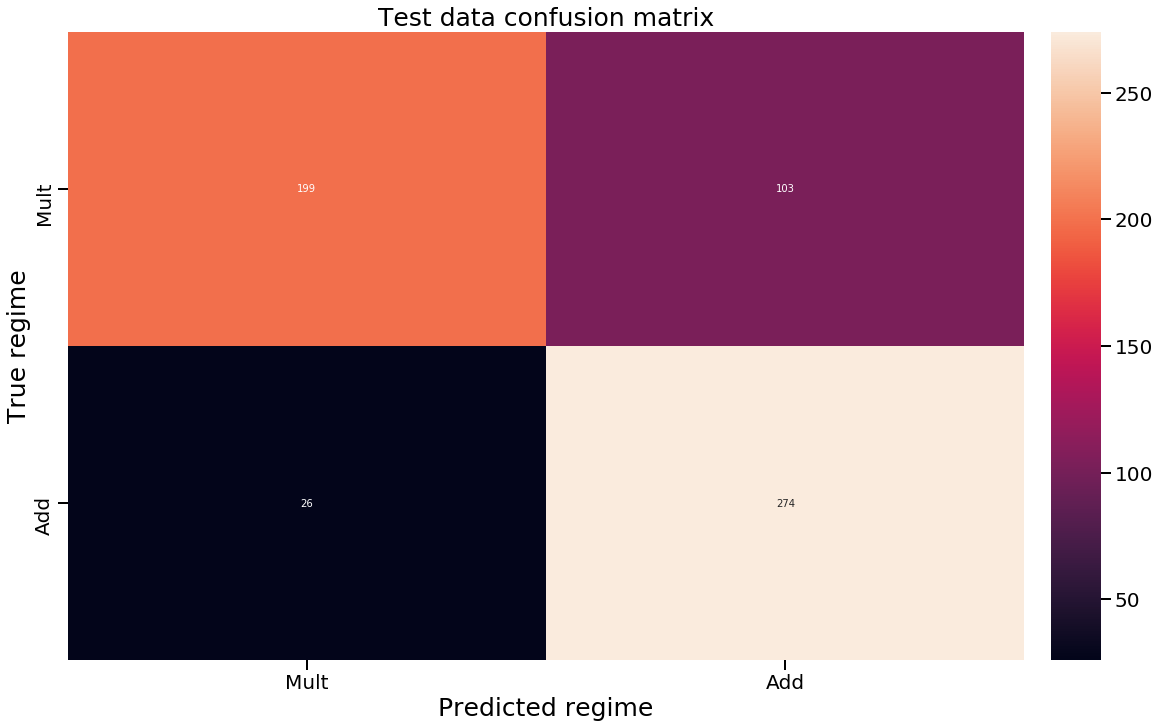

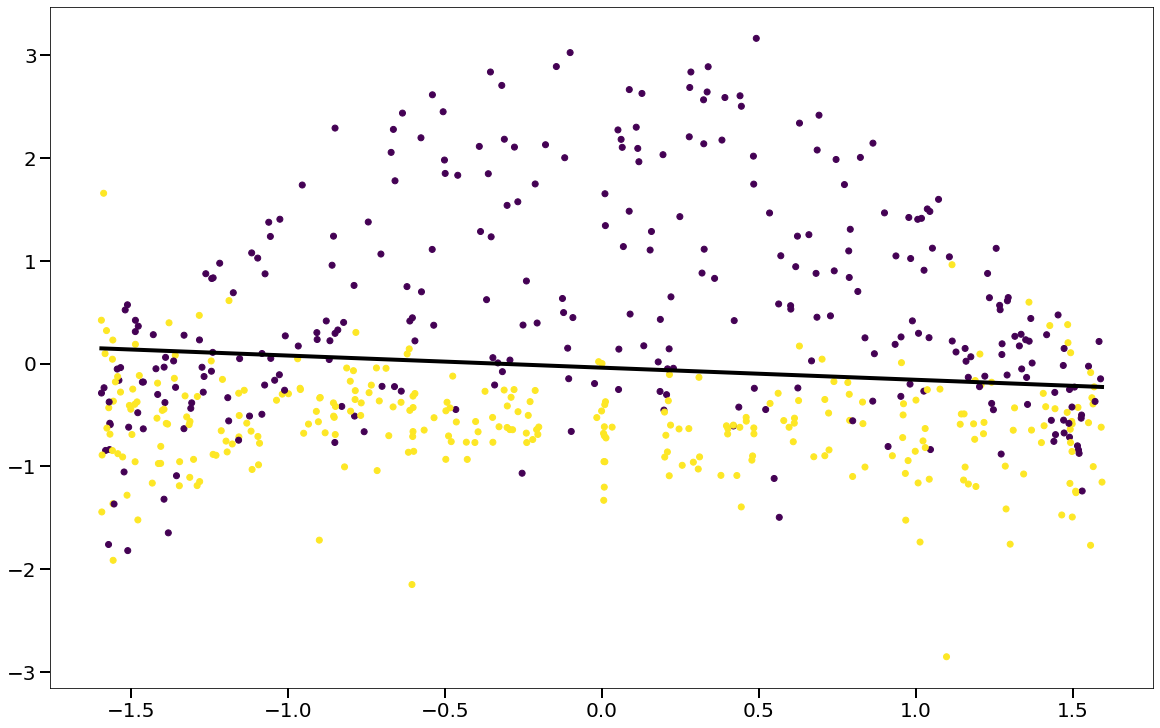

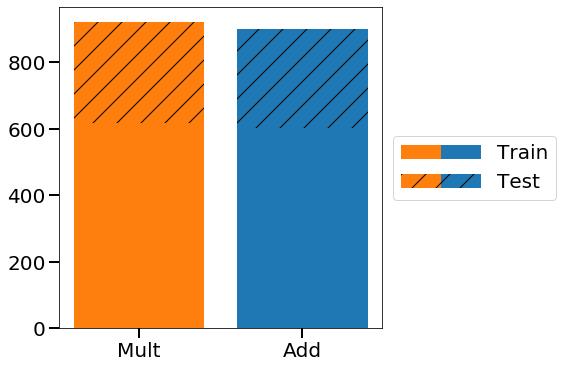

In [29]:
SVM_prediction(X[:,[0,2]],label_noise)

## Find best subsets for accuracy (add vs mult)

In [30]:
# get data with a lot of features
def find_best_subsets(data,labels,no_subsets,acc_thresh):
    """Function which tries out all n over k combinations of features to find the feature giving highest accuracy.
    no_subsets: #features which should be used
    acc_thresh: accuracy threshold where we even show the results"""
    max_acc = 0 
    best_subset_indices = 0
    
    scaler = preprocessing.StandardScaler().fit(data)
    X_stand = scaler.transform(data)
    X_train, X_test, y_train, y_test = train_test_split(X_stand, labels, test_size=0.33)
    
    noise_strength_train,noise_strength_test = X_train[:,-1], X_test[:,-1] # get the noise type class
    
    X_train, X_test = X_train[:,:-1],X_test[:,:-1]
    features = np.arange(0,X_train.shape[1],1)
    
    for subset in itertools.combinations(features, no_subsets):
        X_train_subset = X_train[:,subset]
        X_test_subset = X_test[:,subset]
        
        clf = svm.SVC(kernel='linear', C = 1)
        clf.fit(X_train_subset,y_train)
        
        accuracy = accuracy_score(y_train,clf.predict(X_train_subset))
        accuracy_test = accuracy_score(y_test,clf.predict(X_test_subset))
        
        if accuracy_test > acc_thresh:
            if accuracy_test > max_acc:
                max_acc = accuracy_test
                best_subset_indices = subset
                
            for set_index in subset:
                print("Features",feature_names[set_index])
                
            print("Accuracy on training data",np.round(accuracy*100,1))
            print("Accuracy on test set",np.round(accuracy_test*100,1))
            print("\n")
            
    clf_whole_dataset = svm.SVC(kernel='linear', C = 1)
    clf_whole_dataset.fit(X_train,y_train)
    accuracy_whole = accuracy_score(y_train,clf_whole_dataset.predict(X_train))
    accuracy_whole_test = accuracy_score(y_test,clf_whole_dataset.predict(X_test)) 
            
    print("Accuracy on WHOLE training data",np.round(accuracy_whole*100,1))
    print("Accuracy on WHOLE test set",np.round(accuracy_whole_test*100,1))
    print("\n")
            
    for set_index in best_subset_indices:
        print("Best features:", feature_names[set_index])
    
    print("Best accuracy on test set",np.round(max_acc*100,1)) 

In [31]:
find_best_subsets(X_full,label_full_noise,2,0.77)

Features percup
Features scc_diff
Accuracy on training data 78.8
Accuracy on test set 78.4


Features percdown
Features scc_diff
Accuracy on training data 78.8
Accuracy on test set 78.4


Features meanup
Features scc_diff
Accuracy on training data 78.4
Accuracy on test set 78.2


Features meandown
Features scc_diff
Accuracy on training data 78.1
Accuracy on test set 77.2


Features cvup
Features scc_diff
Accuracy on training data 79.7
Accuracy on test set 78.2


Features cvdown
Features scc_diff
Accuracy on training data 77.6
Accuracy on test set 77.7


Features mean_diff
Features scc_diff
Accuracy on training data 78.7
Accuracy on test set 78.2


Features cv_diff
Features scc_diff
Accuracy on training data 79.4
Accuracy on test set 79.9


Accuracy on WHOLE training data 81.2
Accuracy on WHOLE test set 80.7


Best features: cv_diff
Best features: scc_diff
Best accuracy on test set 79.9


In [58]:
find_best_subsets(X_filter_full,label_filter_full_noise,3,0.9)

Features percup
Features meandown
Features scc_diff
Accuracy on training data 88.4
Accuracy on test set 92.2


Features percup
Features cvup
Features scc_diff
Accuracy on training data 88.3
Accuracy on test set 90.8


Features percup
Features cvdown
Features scc_diff
Accuracy on training data 87.8
Accuracy on test set 91.2


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 88.4
Accuracy on test set 92.2


Features percdown
Features cvup
Features scc_diff
Accuracy on training data 88.3
Accuracy on test set 90.8


Features percdown
Features cvdown
Features scc_diff
Accuracy on training data 87.8
Accuracy on test set 91.2


Features meanup
Features meandown
Features scc_diff
Accuracy on training data 88.9
Accuracy on test set 92.5


Features meanup
Features cvup
Features scc_diff
Accuracy on training data 88.4
Accuracy on test set 91.5


Features meanup
Features mean_diff
Features scc_diff
Accuracy on training data 89.3
Accuracy on test set 92.5


Features m

# Classify into regimes

In [32]:
X_full_mult = np.concatenate((X_mult1_full,X_mult2_full,X_mult3_full,X_mult4_full,X_mult5_full,X_mult6_full))
X_full_add = np.concatenate((X_add1_full,X_add2_full,X_add3_full,X_add4_full,X_add5_full,X_add6_full))

label_full_mult_regime = np.concatenate((regime_mult1_full,regime_mult2_full,regime_mult3_full,regime_mult4_full,regime_mult5_full,regime_mult6_full))
label_full_add_regime = np.concatenate((regime_add1_full,regime_add2_full,regime_add3_full,regime_add4_full,regime_add5_full,regime_add6_full))

In [33]:
# regime labels:
# 0 Exc Up, 1 Osc, 2 Bistable, 3 Exc Down

In [34]:
regime_names = ["Excitable Up","Oscillatory","Bistable","Excitable Down"]

In [11]:
# multiclass classification problem
def find_best_subset_regime_classifier(data,labels,no_subsets,acc_thresh):
    """Classification into regime. 
    Input: data only from one noise type (either add or mult)
    Find best subset for classification from all features
    Multiclass classification problem
    no_subsets: #features of subset
    acc_thresh: threshold for accuracy resutls to show (we use F1 score)"""
    max_acc = 0
    best_subset_indices = 0
    
    scaler = preprocessing.StandardScaler().fit(data)
    X_stand = scaler.transform(data)
    X_train, X_test, y_train, y_test = train_test_split(X_stand, labels, test_size=0.33)
    
    noise_strength_train,noise_strength_test = X_train[:,-1], X_test[:,-1] # get the noise type class
    
    X_train, X_test = X_train[:,:-1],X_test[:,:-1] # remove noise strength from dataset for fitting
    features = np.arange(0,X_train.shape[1],1)
    
    for subset in itertools.combinations(features, no_subsets):
        X_train_subset = X_train[:,subset]
        X_test_subset = X_test[:,subset]
        
        clf = svm.LinearSVC(max_iter = 2000).fit(X_train_subset,y_train)
        
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)
        f1_train = f1_score(y_train,y_train_predict,average = 'macro')
        f1_test = f1_score(y_test,y_test_predict,average = 'macro')
        
        if f1_test > acc_thresh:
            if f1_test > max_acc:
                max_acc = f1_test
                best_subset_indices = subset
                
            conf_mat = confusion_matrix(y_test,y_test_predict)
            #sns.heatmap(conf_mat,annot = True,fmt = "d",xticklabels=regime_names,yticklabels=regime_names)
            #plt.xlabel("Predicted regime") # columns are where we predict the datapoint to lie in
            #plt.ylabel("True regime") #rows are the true regimes
            #plt.title("Test data confusion matrix")
            #plt.show()
            
            #conf_mat = confusion_matrix(y_train,y_train_predict)
            #sns.heatmap(conf_mat,annot = True,fmt = "d",xticklabels=regime_names,yticklabels=regime_names)
            #plt.xlabel("Predicted regime")
            #plt.ylabel("True regime")
            #plt.title("Train data confusion matrix")
            #plt.show()
                
            for set_index in subset:
                print("Features",feature_names[set_index])
                
            print("Accuracy on training data",np.round(f1_train*100,1))
            print("Accuracy on test set",np.round(f1_test*100,1))
            print("\n")
            
    clf_whole_dataset = svm.LinearSVC(max_iter = 2000)
    clf_whole_dataset.fit(X_train,y_train)
    f1_whole = f1_score(y_train,clf_whole_dataset.predict(X_train),average = 'macro')
    f1_whole_test = f1_score(y_test,clf_whole_dataset.predict(X_test),average = 'macro') 
            
    print("Accuracy on WHOLE training data",np.round(f1_whole*100,1))
    print("Accuracy on WHOLE test set",np.round(f1_whole_test*100,1))
    print("\n")
    if best_subset_indices:      
        for set_index in best_subset_indices:
            print("Best features:", feature_names[set_index])
    else:
        best_subset_indices = ()
    
    print("Best accuracy on test set",np.round(max_acc*100,1)) 
    
    return best_subset_indices

In [39]:
def get_f1_performance_regime_classifier(data,subset,labels):
    """Function to compute F1-performance for regime classification based on specific feature subset.
    CAUTION: input data needs to be the full dataset with last 4 features mean_diff,cvdiff, sccdiff and noise strength
    subset: list of indices which features to use.
    This function is used to iterate over and compute a mean F1 score"""
    scaler = preprocessing.StandardScaler().fit(data)
    X_stand = scaler.transform(data)
    X_train, X_test, y_train, y_test = train_test_split(X_stand, labels, test_size=0.33)
    X_train, X_test = X_train[:,:-4],X_test[:,:-4]# get rid of noise and of the differences!mean_diff,cv_diff,sccdiff,noise_strength features removed

    
    X_train_subset = X_train[:,subset]
    X_test_subset = X_test[:,subset]
    
    clf = svm.LinearSVC(max_iter = 2000).fit(X_train,y_train)
    clf_subset = svm.LinearSVC(max_iter = 2000).fit(X_train_subset,y_train)
        
    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    y_train_predict_subset = clf_subset.predict(X_train_subset)
    y_test_predict_subset = clf_subset.predict(X_test_subset)
    f1_train = f1_score(y_train,y_train_predict,average = 'macro')
    f1_test = f1_score(y_test,y_test_predict,average = 'macro')
    f1_train_subset = f1_score(y_train,y_train_predict_subset,average = 'macro')
    f1_test_subset = f1_score(y_test,y_test_predict_subset,average = 'macro')
            
    print("Accuracy on WHOLE training data",np.round(f1_train*100,1))
    print("Accuracy on WHOLE test set",np.round(f1_test*100,1))
    print("\n")
    
    print("Accuracy on subset Train",np.round(f1_train_subset*100,1)) 
    print("Accuracy on subset Test",np.round(f1_test_subset*100,1)) 
    
    return f1_train,f1_test,f1_train_subset,f1_test_subset

In [41]:
# obtain F1 score averaged over several trials specifying the features to use
f1_train_whole_list = []
f1_test_whole_list = []
f1_train_subset_list = []
f1_test_subset_list = []
for i in range(100):
    f1_train,f1_test,f1_train_subset,f1_test_subset = get_f1_performance_regime_classifier(X_full_mult,[0,6],label_full_mult_regime)
    f1_train_whole_list.append(f1_train)
    f1_test_whole_list.append(f1_test)
    f1_train_subset_list.append(f1_train_subset)
    f1_test_subset_list.append(f1_test_subset)
f1_whole_train_mean = np.mean(f1_train_whole_list)
f1_whole_test_mean = np.mean(f1_test_whole_list)
f1_subset_train_mean = np.mean(f1_train_subset_list)
f1_subset_test_mean = np.mean(f1_test_subset_list)
    

Accuracy on WHOLE training data 83.3
Accuracy on WHOLE test set 86.6


Accuracy on subset Train 69.6
Accuracy on subset Test 70.4
Accuracy on WHOLE training data 82.3
Accuracy on WHOLE test set 84.1


Accuracy on subset Train 69.6
Accuracy on subset Test 71.2
Accuracy on WHOLE training data 86.2
Accuracy on WHOLE test set 84.5


Accuracy on subset Train 70.3
Accuracy on subset Test 71.2
Accuracy on WHOLE training data 85.4
Accuracy on WHOLE test set 85.6


Accuracy on subset Train 71.7
Accuracy on subset Test 68.2
Accuracy on WHOLE training data 82.9
Accuracy on WHOLE test set 85.4


Accuracy on subset Train 69.3
Accuracy on subset Test 68.7
Accuracy on WHOLE training data 84.1
Accuracy on WHOLE test set 87.8


Accuracy on subset Train 69.6
Accuracy on subset Test 70.6
Accuracy on WHOLE training data 85.8
Accuracy on WHOLE test set 83.3


Accuracy on subset Train 70.3
Accuracy on subset Test 69.6
Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 86.7


Accuracy on subset 

Accuracy on WHOLE training data 83.3
Accuracy on WHOLE test set 86.3


Accuracy on subset Train 67.2
Accuracy on subset Test 70.8
Accuracy on WHOLE training data 84.1
Accuracy on WHOLE test set 86.5


Accuracy on subset Train 71.2
Accuracy on subset Test 71.3
Accuracy on WHOLE training data 86.1
Accuracy on WHOLE test set 87.1


Accuracy on subset Train 71.4
Accuracy on subset Test 72.5
Accuracy on WHOLE training data 87.4
Accuracy on WHOLE test set 83.8


Accuracy on subset Train 72.1
Accuracy on subset Test 73.1
Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 83.9


Accuracy on subset Train 70.6
Accuracy on subset Test 68.2
Accuracy on WHOLE training data 84.8
Accuracy on WHOLE test set 82.8


Accuracy on subset Train 69.9
Accuracy on subset Test 68.9
Accuracy on WHOLE training data 85.1
Accuracy on WHOLE test set 82.6


Accuracy on subset Train 68.9
Accuracy on subset Test 70.1
Accuracy on WHOLE training data 85.0
Accuracy on WHOLE test set 85.9


Accuracy on subset 

In [421]:
f1_whole_train_mean,f1_whole_test_mean,f1_subset_train_mean,f1_subset_test_mean

(0.8536673490560404, 0.84618444423297, 0.7057948888099067, 0.7040056404399803)

In [12]:
# checking the accuracy of the classifier on the features percup,cvdiff,sccdiff we used before
# Features displayed are not correct in this case
find_best_subset_regime_classifier(X_add,label_add_regime,3,0.4)

Features percup
Features percdown
Features meanup
Accuracy on training data 51.9
Accuracy on test set 50.5


Accuracy on WHOLE training data 51.9
Accuracy on WHOLE test set 50.5


Best features: percup
Best features: percdown
Best features: meanup
Best accuracy on test set 50.5


(0, 1, 2)

In [13]:
# checking the accuracy of the classifier on the features percup,cvdiff,sccdiff we used before
# Features displayed are not correct in this case
find_best_subset_regime_classifier(X_mult,label_mult_regime,3,0.4)

Features percup
Features percdown
Features meanup
Accuracy on training data 56.6
Accuracy on test set 56.5


Accuracy on WHOLE training data 56.6
Accuracy on WHOLE test set 56.5


Best features: percup
Best features: percdown
Best features: meanup
Best accuracy on test set 56.5


(0, 1, 2)

In [392]:
# find best subsets for mult noise regime classification
# mult data
# using two features
best_subsets_list = []
for i in range(100):
    best_subset = find_best_subset_regime_classifier(X_full_mult,label_full_mult_regime,2,0.65)
    best_subsets_list.append(best_subset)

Features percup
Features meandown
Accuracy on training data 66.5
Accuracy on test set 66.0


Features percup
Features scclag0
Accuracy on training data 72.5
Accuracy on test set 67.0


Features percdown
Features meandown
Accuracy on training data 66.5
Accuracy on test set 66.0


Features percdown
Features scclag0
Accuracy on training data 72.5
Accuracy on test set 67.0


Accuracy on WHOLE training data 87.1
Accuracy on WHOLE test set 84.0


Best features: percup
Best features: scclag0
Best accuracy on test set 67.0
Features percup
Features meandown
Accuracy on training data 67.1
Accuracy on test set 66.7


Features percup
Features scclag0
Accuracy on training data 71.9
Accuracy on test set 70.0


Features percdown
Features meandown
Accuracy on training data 67.1
Accuracy on test set 66.7


Features percdown
Features scclag0
Accuracy on training data 71.9
Accuracy on test set 70.0


Accuracy on WHOLE training data 85.7
Accuracy on WHOLE test set 85.6


Best features: percup
Best feature

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 84.4
Accuracy on WHOLE test set 82.5


Best features: percup
Best features: scclag0
Best accuracy on test set 70.7
Features percup
Features meandown
Accuracy on training data 65.3
Accuracy on test set 67.8


Features percup
Features scclag0
Accuracy on training data 70.1
Accuracy on test set 73.1


Features percdown
Features meandown
Accuracy on training data 65.3
Accuracy on test set 67.8


Features percdown
Features scclag0
Accuracy on training data 70.1
Accuracy on test set 73.1


Accuracy on WHOLE training data 85.1
Accuracy on WHOLE test set 85.7


Best features: percup
Best features: scclag0
Best accuracy on test set 73.1
Features percup
Features meandown
Accuracy on training data 65.6
Accuracy on test set 66.9


Features percup
Features scclag0
Accuracy on training data 70.3
Accuracy on test set 71.9


Features percdown
Features meandown
Accuracy on training data 65.6
Accuracy on test set 66.9


Features percdown
Features scclag0
Accuracy on train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.1
Accuracy on WHOLE test set 84.1


Best features: percup
Best features: scclag0
Best accuracy on test set 71.9
Features percup
Features meandown
Accuracy on training data 70.0
Accuracy on test set 67.6


Features percup
Features scclag0
Accuracy on training data 71.9
Accuracy on test set 67.5


Features percdown
Features meandown
Accuracy on training data 70.0
Accuracy on test set 67.6


Features percdown
Features scclag0
Accuracy on training data 71.9
Accuracy on test set 67.5


Accuracy on WHOLE training data 87.3
Accuracy on WHOLE test set 83.3


Best features: percup
Best features: meandown
Best accuracy on test set 67.6
Features percup
Features meandown
Accuracy on training data 71.2
Accuracy on test set 70.4


Features percup
Features scclag0
Accuracy on training data 72.3
Accuracy on test set 71.0


Features percdown
Features meandown
Accuracy on training data 71.2
Accuracy on test set 70.4


Features percdown
Features scclag0
Accuracy on trai

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.6
Accuracy on WHOLE test set 86.4


Best features: percup
Best features: scclag0
Best accuracy on test set 70.7
Features percup
Features meandown
Accuracy on training data 66.0
Accuracy on test set 66.2


Features percup
Features scclag0
Accuracy on training data 70.2
Accuracy on test set 70.9


Features percdown
Features meandown
Accuracy on training data 66.0
Accuracy on test set 66.2


Features percdown
Features scclag0
Accuracy on training data 70.2
Accuracy on test set 70.9


Accuracy on WHOLE training data 84.5
Accuracy on WHOLE test set 83.0


Best features: percup
Best features: scclag0
Best accuracy on test set 70.9
Features percup
Features meandown
Accuracy on training data 70.3
Accuracy on test set 67.5


Features percup
Features scclag0
Accuracy on training data 71.5
Accuracy on test set 69.7


Features percdown
Features meandown
Accuracy on training data 70.3
Accuracy on test set 67.5


Features percdown
Features scclag0
Accuracy on train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.1
Accuracy on WHOLE test set 86.2


Best features: percup
Best features: scclag0
Best accuracy on test set 69.7
Features percup
Features meandown
Accuracy on training data 67.3
Accuracy on test set 67.6


Features percup
Features scclag0
Accuracy on training data 70.0
Accuracy on test set 68.4


Features percdown
Features meandown
Accuracy on training data 67.3
Accuracy on test set 67.6


Features percdown
Features scclag0
Accuracy on training data 70.0
Accuracy on test set 68.4


Accuracy on WHOLE training data 85.4
Accuracy on WHOLE test set 84.8


Best features: percup
Best features: scclag0
Best accuracy on test set 68.4
Features percup
Features meanup
Accuracy on training data 60.9
Accuracy on test set 65.2


Features percup
Features meandown
Accuracy on training data 65.4
Accuracy on test set 65.1


Features percup
Features scclag0
Accuracy on training data 70.3
Accuracy on test set 70.4


Features percdown
Features meanup
Accuracy on training d

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.1
Accuracy on WHOLE test set 83.9


Best features: percup
Best features: scclag0
Best accuracy on test set 67.8
Features percup
Features meanup
Accuracy on training data 63.6
Accuracy on test set 66.2


Features percup
Features scclag0
Accuracy on training data 69.6
Accuracy on test set 71.6


Features percdown
Features meanup
Accuracy on training data 63.6
Accuracy on test set 66.2


Features percdown
Features scclag0
Accuracy on training data 69.6
Accuracy on test set 71.6


Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 83.7


Best features: percup
Best features: scclag0
Best accuracy on test set 71.6
Features percup
Features scclag0
Accuracy on training data 71.4
Accuracy on test set 68.8


Features percdown
Features scclag0
Accuracy on training data 71.4
Accuracy on test set 68.8


Accuracy on WHOLE training data 85.6
Accuracy on WHOLE test set 85.4


Best features: percup
Best features: scclag0
Best accuracy on test set 68.8
Fea

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 84.8
Accuracy on WHOLE test set 86.6


Best features: percup
Best features: scclag0
Best accuracy on test set 70.0
Features percup
Features meandown
Accuracy on training data 70.5
Accuracy on test set 67.5


Features percup
Features scclag0
Accuracy on training data 70.9
Accuracy on test set 70.8


Features percdown
Features meandown
Accuracy on training data 70.5
Accuracy on test set 67.5


Features percdown
Features scclag0
Accuracy on training data 70.9
Accuracy on test set 70.8




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.6
Accuracy on WHOLE test set 82.5


Best features: percup
Best features: scclag0
Best accuracy on test set 70.8
Features percup
Features meanup
Accuracy on training data 64.5
Accuracy on test set 65.2


Features percup
Features meandown
Accuracy on training data 68.5
Accuracy on test set 67.4


Features percup
Features scclag0
Accuracy on training data 72.9
Accuracy on test set 67.8


Features percdown
Features meanup
Accuracy on training data 64.5
Accuracy on test set 65.2


Features percdown
Features meandown
Accuracy on training data 68.5
Accuracy on test set 67.4


Features percdown
Features scclag0
Accuracy on training data 72.9
Accuracy on test set 67.8


Accuracy on WHOLE training data 86.4
Accuracy on WHOLE test set 83.5


Best features: percup
Best features: scclag0
Best accuracy on test set 67.8
Features percup
Features scclag0
Accuracy on training data 70.6
Accuracy on test set 65.5


Features percdown
Features scclag0
Accuracy on training 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.9
Accuracy on WHOLE test set 86.4


Best features: percup
Best features: scclag0
Best accuracy on test set 73.0
Features percup
Features meandown
Accuracy on training data 72.1
Accuracy on test set 69.7


Features percup
Features scclag0
Accuracy on training data 72.3
Accuracy on test set 68.8


Features percdown
Features meandown
Accuracy on training data 72.1
Accuracy on test set 69.7


Features percdown
Features scclag0
Accuracy on training data 72.3
Accuracy on test set 68.8


Accuracy on WHOLE training data 86.3
Accuracy on WHOLE test set 82.9


Best features: percup
Best features: meandown
Best accuracy on test set 69.7
Features percup
Features meandown
Accuracy on training data 66.2
Accuracy on test set 67.7


Features percup
Features scclag0
Accuracy on training data 70.7
Accuracy on test set 71.8


Features percdown
Features meandown
Accuracy on training data 66.2
Accuracy on test set 67.7


Features percdown
Features scclag0
Accuracy on trai

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 82.8
Accuracy on WHOLE test set 86.7


Best features: percup
Best features: scclag0
Best accuracy on test set 72.3
Features percup
Features meanup
Accuracy on training data 63.4
Accuracy on test set 66.0


Features percup
Features scclag0
Accuracy on training data 69.6
Accuracy on test set 69.8


Features percdown
Features meanup
Accuracy on training data 63.4
Accuracy on test set 66.0


Features percdown
Features scclag0
Accuracy on training data 69.6
Accuracy on test set 69.8


Accuracy on WHOLE training data 85.9
Accuracy on WHOLE test set 84.6


Best features: percup
Best features: scclag0
Best accuracy on test set 69.8
Features percup
Features meandown
Accuracy on training data 68.2
Accuracy on test set 67.4


Features percup
Features scclag0
Accuracy on training data 72.8
Accuracy on test set 70.4


Features percdown
Features meandown
Accuracy on training data 68.2
Accuracy on test set 67.4


Features percdown
Features scclag0
Accuracy on training 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.1
Accuracy on WHOLE test set 84.8


Best features: percup
Best features: scclag0
Best accuracy on test set 72.2
Features percup
Features meandown
Accuracy on training data 65.3
Accuracy on test set 66.7


Features percup
Features scclag0
Accuracy on training data 71.1
Accuracy on test set 68.8


Features percdown
Features meandown
Accuracy on training data 65.3
Accuracy on test set 66.7


Features percdown
Features scclag0
Accuracy on training data 71.1
Accuracy on test set 68.8




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 84.9


Best features: percup
Best features: scclag0
Best accuracy on test set 68.8
Features percup
Features meanup
Accuracy on training data 63.6
Accuracy on test set 68.0


Features percup
Features meandown
Accuracy on training data 67.7
Accuracy on test set 69.6


Features percup
Features scclag0
Accuracy on training data 70.4
Accuracy on test set 70.5


Features percdown
Features meanup
Accuracy on training data 63.6
Accuracy on test set 68.0


Features percdown
Features meandown
Accuracy on training data 67.7
Accuracy on test set 69.6


Features percdown
Features scclag0
Accuracy on training data 70.4
Accuracy on test set 70.5


Accuracy on WHOLE training data 86.4
Accuracy on WHOLE test set 84.6


Best features: percup
Best features: scclag0
Best accuracy on test set 70.5
Features percup
Features meandown
Accuracy on training data 64.5
Accuracy on test set 65.0


Features percup
Features scclag0
Accuracy on training d

Features percup
Features scclag0
Accuracy on training data 69.4
Accuracy on test set 74.9


Features percdown
Features meanup
Accuracy on training data 62.1
Accuracy on test set 65.2


Features percdown
Features meandown
Accuracy on training data 65.9
Accuracy on test set 68.9


Features percdown
Features scclag0
Accuracy on training data 69.4
Accuracy on test set 74.9


Accuracy on WHOLE training data 85.2
Accuracy on WHOLE test set 85.6


Best features: percup
Best features: scclag0
Best accuracy on test set 74.9
Features percup
Features meandown
Accuracy on training data 64.5
Accuracy on test set 66.8


Features percup
Features scclag0
Accuracy on training data 69.8
Accuracy on test set 70.8


Features percdown
Features meandown
Accuracy on training data 64.5
Accuracy on test set 66.8


Features percdown
Features scclag0
Accuracy on training data 69.8
Accuracy on test set 70.8


Accuracy on WHOLE training data 85.4
Accuracy on WHOLE test set 84.6


Best features: percup
Best feature

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.9
Accuracy on WHOLE test set 84.8


Best features: percup
Best features: scclag0
Best accuracy on test set 69.8
Features percup
Features meandown
Accuracy on training data 68.3
Accuracy on test set 66.6


Features percup
Features scclag0
Accuracy on training data 72.9
Accuracy on test set 71.1


Features percdown
Features meandown
Accuracy on training data 68.3
Accuracy on test set 66.6


Features percdown
Features scclag0
Accuracy on training data 72.9
Accuracy on test set 71.1


Accuracy on WHOLE training data 87.6
Accuracy on WHOLE test set 83.9


Best features: percup
Best features: scclag0
Best accuracy on test set 71.1
Features percup
Features meanup
Accuracy on training data 64.9
Accuracy on test set 66.4


Features percup
Features meandown
Accuracy on training data 70.8
Accuracy on test set 72.4


Features percup
Features scclag0
Accuracy on training data 71.9
Accuracy on test set 70.4


Features percdown
Features meanup
Accuracy on training d

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 87.4
Accuracy on WHOLE test set 79.2


Best features: percup
Best features: scclag0
Best accuracy on test set 67.7
Features percup
Features meandown
Accuracy on training data 71.6
Accuracy on test set 69.0


Features percup
Features scclag0
Accuracy on training data 71.4
Accuracy on test set 70.0


Features percdown
Features meandown
Accuracy on training data 71.6
Accuracy on test set 69.0


Features percdown
Features scclag0
Accuracy on training data 71.4
Accuracy on test set 70.0


Accuracy on WHOLE training data 86.5
Accuracy on WHOLE test set 81.8


Best features: percup
Best features: scclag0
Best accuracy on test set 70.0
Features percup
Features meandown
Accuracy on training data 64.1
Accuracy on test set 68.7


Features percup
Features scclag0
Accuracy on training data 69.7
Accuracy on test set 72.0


Features percdown
Features meandown
Accuracy on training data 64.1
Accuracy on test set 68.7


Features percdown
Features scclag0
Accuracy on train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.9
Accuracy on WHOLE test set 85.9


Best features: percup
Best features: scclag0
Best accuracy on test set 70.2
Features percup
Features meanup
Accuracy on training data 61.5
Accuracy on test set 66.0


Features percup
Features meandown
Accuracy on training data 65.7
Accuracy on test set 68.0


Features percup
Features scclag0
Accuracy on training data 70.3
Accuracy on test set 70.9


Features percdown
Features meanup
Accuracy on training data 61.5
Accuracy on test set 66.0


Features percdown
Features meandown
Accuracy on training data 65.7
Accuracy on test set 68.0


Features percdown
Features scclag0
Accuracy on training data 70.3
Accuracy on test set 70.9




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.3
Accuracy on WHOLE test set 87.9


Best features: percup
Best features: scclag0
Best accuracy on test set 70.9
Features percup
Features scclag0
Accuracy on training data 72.3
Accuracy on test set 67.4


Features percdown
Features scclag0
Accuracy on training data 72.3
Accuracy on test set 67.4




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.0
Accuracy on WHOLE test set 82.9


Best features: percup
Best features: scclag0
Best accuracy on test set 67.4
Features percup
Features meandown
Accuracy on training data 63.1
Accuracy on test set 67.3


Features percup
Features scclag0
Accuracy on training data 67.7
Accuracy on test set 72.7


Features percdown
Features meandown
Accuracy on training data 63.1
Accuracy on test set 67.3


Features percdown
Features scclag0
Accuracy on training data 67.7
Accuracy on test set 72.7


Accuracy on WHOLE training data 83.6
Accuracy on WHOLE test set 87.0


Best features: percup
Best features: scclag0
Best accuracy on test set 72.7
Features percup
Features meandown
Accuracy on training data 66.4
Accuracy on test set 66.2


Features percup
Features scclag0
Accuracy on training data 69.7
Accuracy on test set 71.2


Features percdown
Features meandown
Accuracy on training data 66.4
Accuracy on test set 66.2


Features percdown
Features scclag0
Accuracy on train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.6
Accuracy on WHOLE test set 86.7


Best features: percup
Best features: scclag0
Best accuracy on test set 70.8
Features percup
Features meandown
Accuracy on training data 72.4
Accuracy on test set 72.0


Features percup
Features scclag0
Accuracy on training data 72.2
Accuracy on test set 71.5


Features percdown
Features meandown
Accuracy on training data 72.4
Accuracy on test set 72.0


Features percdown
Features scclag0
Accuracy on training data 72.2
Accuracy on test set 71.5


Accuracy on WHOLE training data 86.6
Accuracy on WHOLE test set 84.4


Best features: percup
Best features: meandown
Best accuracy on test set 72.0
Features percup
Features meandown
Accuracy on training data 65.1
Accuracy on test set 65.7


Features percup
Features scclag0
Accuracy on training data 69.9
Accuracy on test set 71.9


Features percdown
Features meandown
Accuracy on training data 65.1
Accuracy on test set 65.7


Features percdown
Features scclag0
Accuracy on trai

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.3
Accuracy on WHOLE test set 84.2


Best features: percup
Best features: meandown
Best accuracy on test set 67.8
Features percup
Features meanup
Accuracy on training data 62.3
Accuracy on test set 67.5


Features percup
Features meandown
Accuracy on training data 69.5
Accuracy on test set 70.6


Features percup
Features scclag0
Accuracy on training data 69.9
Accuracy on test set 75.1


Features percdown
Features meanup
Accuracy on training data 62.3
Accuracy on test set 67.5


Features percdown
Features meandown
Accuracy on training data 69.5
Accuracy on test set 70.6


Features percdown
Features scclag0
Accuracy on training data 69.9
Accuracy on test set 75.1




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.1
Accuracy on WHOLE test set 85.9


Best features: percup
Best features: scclag0
Best accuracy on test set 75.1
Features percup
Features meandown
Accuracy on training data 66.1
Accuracy on test set 67.7


Features percup
Features scclag0
Accuracy on training data 69.8
Accuracy on test set 71.8


Features percdown
Features meandown
Accuracy on training data 66.1
Accuracy on test set 67.7


Features percdown
Features scclag0
Accuracy on training data 69.8
Accuracy on test set 71.8


Accuracy on WHOLE training data 84.2
Accuracy on WHOLE test set 87.4


Best features: percup
Best features: scclag0
Best accuracy on test set 71.8
Features percup
Features meanup
Accuracy on training data 60.4
Accuracy on test set 65.2


Features percup
Features scclag0
Accuracy on training data 70.6
Accuracy on test set 68.6


Features percdown
Features meanup
Accuracy on training data 60.4
Accuracy on test set 65.2


Features percdown
Features scclag0
Accuracy on training 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 87.1
Accuracy on WHOLE test set 84.3


Best features: percup
Best features: scclag0
Best accuracy on test set 72.4
Features percup
Features scclag0
Accuracy on training data 71.6
Accuracy on test set 69.2


Features percdown
Features scclag0
Accuracy on training data 71.6
Accuracy on test set 69.2


Accuracy on WHOLE training data 85.7
Accuracy on WHOLE test set 82.5


Best features: percup
Best features: scclag0
Best accuracy on test set 69.2
Features percup
Features meandown
Accuracy on training data 64.9
Accuracy on test set 67.9


Features percup
Features scclag0
Accuracy on training data 70.2
Accuracy on test set 70.8


Features percdown
Features meandown
Accuracy on training data 64.9
Accuracy on test set 67.9


Features percdown
Features scclag0
Accuracy on training data 70.2
Accuracy on test set 70.8


Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 85.7


Best features: percup
Best features: scclag0
Best accuracy on test set 70.8

In [393]:
# find best subsets for add noise regime classification
# add data
# using two features
best_subsets_list_add = []
for i in range(100):
    best_subset = find_best_subset_regime_classifier(X_full_add,label_full_add_regime,2,0.5)
    best_subsets_list_add.append(best_subset)

Features percup
Features meanup
Accuracy on training data 67.1
Accuracy on test set 68.6


Features percup
Features meandown
Accuracy on training data 64.0
Accuracy on test set 67.6


Features percup
Features cvup
Accuracy on training data 56.6
Accuracy on test set 55.7


Features percup
Features cvdown
Accuracy on training data 56.5
Accuracy on test set 55.7


Features percup
Features scclag0
Accuracy on training data 49.3
Accuracy on test set 55.5


Features percup
Features scclag1
Accuracy on training data 48.1
Accuracy on test set 53.2


Features percup
Features mean_diff
Accuracy on training data 52.3
Accuracy on test set 53.6


Features percup
Features cv_diff
Accuracy on training data 51.7
Accuracy on test set 54.5


Features percdown
Features meanup
Accuracy on training data 67.1
Accuracy on test set 68.6


Features percdown
Features meandown
Accuracy on training data 64.0
Accuracy on test set 67.6


Features percdown
Features cvup
Accuracy on training data 56.6
Accuracy on tes

Features cvup
Features cvdown
Accuracy on training data 53.0
Accuracy on test set 52.1


Features cvup
Features mean_diff
Accuracy on training data 51.5
Accuracy on test set 51.2


Features cvup
Features cv_diff
Accuracy on training data 52.8
Accuracy on test set 52.1


Features cvdown
Features cv_diff
Accuracy on training data 53.0
Accuracy on test set 52.1


Accuracy on WHOLE training data 77.1
Accuracy on WHOLE test set 80.6


Best features: percup
Best features: meandown
Best accuracy on test set 61.0
Features percup
Features meanup
Accuracy on training data 69.0
Accuracy on test set 65.2


Features percup
Features meandown
Accuracy on training data 63.5
Accuracy on test set 61.3


Features percup
Features cvup
Accuracy on training data 57.6
Accuracy on test set 54.5


Features percup
Features cvdown
Accuracy on training data 57.7
Accuracy on test set 54.7


Features percup
Features mean_diff
Accuracy on training data 53.1
Accuracy on test set 51.9


Features percup
Features cv_dif

Features meanup
Features meandown
Accuracy on training data 60.8
Accuracy on test set 61.9


Features meanup
Features cvup
Accuracy on training data 55.4
Accuracy on test set 58.3


Features meanup
Features mean_diff
Accuracy on training data 60.3
Accuracy on test set 61.9


Features meanup
Features cv_diff
Accuracy on training data 51.0
Accuracy on test set 52.7


Features meandown
Features cvdown
Accuracy on training data 60.8
Accuracy on test set 59.8


Features meandown
Features mean_diff
Accuracy on training data 61.1
Accuracy on test set 60.5


Features meandown
Features cv_diff
Accuracy on training data 56.3
Accuracy on test set 59.0


Features cvup
Features cvdown
Accuracy on training data 52.8
Accuracy on test set 56.3


Features cvup
Features mean_diff
Accuracy on training data 50.1
Accuracy on test set 54.4


Features cvup
Features cv_diff
Accuracy on training data 52.9
Accuracy on test set 56.3


Features cvdown
Features mean_diff
Accuracy on training data 49.0
Accuracy on 

Features cvdown
Features cv_diff
Accuracy on training data 55.7
Accuracy on test set 52.0


Accuracy on WHOLE training data 81.4
Accuracy on WHOLE test set 75.8


Best features: percup
Best features: meandown
Best accuracy on test set 67.8
Features percup
Features meanup
Accuracy on training data 70.0
Accuracy on test set 63.9


Features percup
Features meandown
Accuracy on training data 67.9
Accuracy on test set 66.7


Features percup
Features cvup
Accuracy on training data 57.4
Accuracy on test set 55.4


Features percup
Features cvdown
Accuracy on training data 56.7
Accuracy on test set 56.9


Features percup
Features scclag0
Accuracy on training data 61.1
Accuracy on test set 55.9


Features percup
Features scclag1
Accuracy on training data 60.4
Accuracy on test set 58.4


Features percup
Features mean_diff
Accuracy on training data 52.6
Accuracy on test set 52.8


Features percup
Features cv_diff
Accuracy on training data 52.8
Accuracy on test set 54.2


Features percdown
Features

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 79.3
Accuracy on WHOLE test set 79.1


Best features: percup
Best features: meanup
Best accuracy on test set 69.4
Features percup
Features meanup
Accuracy on training data 69.3
Accuracy on test set 63.0


Features percup
Features meandown
Accuracy on training data 64.8
Accuracy on test set 66.1


Features percup
Features cvup
Accuracy on training data 56.9
Accuracy on test set 55.2


Features percup
Features cvdown
Accuracy on training data 56.4
Accuracy on test set 56.2


Features percup
Features scclag0
Accuracy on training data 52.3
Accuracy on test set 52.4


Features percup
Features scclag1
Accuracy on training data 49.7
Accuracy on test set 50.2


Features percup
Features mean_diff
Accuracy on training data 52.8
Accuracy on test set 52.6


Features percup
Features cv_diff
Accuracy on training data 52.1
Accuracy on test set 53.3


Features percdown
Features meanup
Accuracy on training data 69.3
Accuracy on test set 63.0


Features percdown
Features 

Features percup
Features mean_diff
Accuracy on training data 51.3
Accuracy on test set 55.0


Features percup
Features cv_diff
Accuracy on training data 51.7
Accuracy on test set 53.7


Features percdown
Features meanup
Accuracy on training data 68.7
Accuracy on test set 66.7


Features percdown
Features meandown
Accuracy on training data 70.4
Accuracy on test set 67.6


Features percdown
Features cvup
Accuracy on training data 55.1
Accuracy on test set 57.1


Features percdown
Features cvdown
Accuracy on training data 55.7
Accuracy on test set 56.2


Features percdown
Features scclag0
Accuracy on training data 54.5
Accuracy on test set 53.0


Features percdown
Features scclag1
Accuracy on training data 52.6
Accuracy on test set 51.8


Features percdown
Features mean_diff
Accuracy on training data 51.3
Accuracy on test set 55.0


Features percdown
Features cv_diff
Accuracy on training data 51.7
Accuracy on test set 53.7


Features meanup
Features meandown
Accuracy on training data 60.5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 79.7
Accuracy on WHOLE test set 77.5


Best features: percup
Best features: meanup
Best accuracy on test set 64.4
Features percup
Features meanup
Accuracy on training data 70.1
Accuracy on test set 68.0


Features percup
Features meandown
Accuracy on training data 70.1
Accuracy on test set 69.0


Features percup
Features cvup
Accuracy on training data 56.4
Accuracy on test set 56.5


Features percup
Features cvdown
Accuracy on training data 56.8
Accuracy on test set 56.8


Features percup
Features scclag0
Accuracy on training data 54.1
Accuracy on test set 52.3


Features percup
Features scclag1
Accuracy on training data 53.4
Accuracy on test set 55.1


Features percup
Features mean_diff
Accuracy on training data 51.8
Accuracy on test set 52.8


Features percup
Features cv_diff
Accuracy on training data 51.5
Accuracy on test set 51.8


Features percdown
Features meanup
Accuracy on training data 70.1
Accuracy on test set 68.0


Features percdown
Features 

Features meanup
Features meandown
Accuracy on training data 61.1
Accuracy on test set 61.4


Features meanup
Features cvup
Accuracy on training data 55.2
Accuracy on test set 57.1


Features meanup
Features mean_diff
Accuracy on training data 60.6
Accuracy on test set 61.1


Features meanup
Features cv_diff
Accuracy on training data 51.1
Accuracy on test set 52.7


Features meandown
Features cvdown
Accuracy on training data 60.4
Accuracy on test set 61.7


Features meandown
Features mean_diff
Accuracy on training data 60.2
Accuracy on test set 60.4


Features meandown
Features cv_diff
Accuracy on training data 56.0
Accuracy on test set 55.9


Features cvup
Features cvdown
Accuracy on training data 52.8
Accuracy on test set 52.9


Features cvup
Features mean_diff
Accuracy on training data 51.4
Accuracy on test set 53.1


Features cvup
Features cv_diff
Accuracy on training data 52.8
Accuracy on test set 52.9


Features cvdown
Features cv_diff
Accuracy on training data 52.8
Accuracy on te

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 77.0
Accuracy on WHOLE test set 80.9


Best features: percup
Best features: meanup
Best accuracy on test set 71.0
Features percup
Features meanup
Accuracy on training data 67.7
Accuracy on test set 67.8


Features percup
Features meandown
Accuracy on training data 61.0
Accuracy on test set 62.3


Features percup
Features cvup
Accuracy on training data 54.8
Accuracy on test set 56.3


Features percup
Features cvdown
Accuracy on training data 56.5
Accuracy on test set 55.8


Features percup
Features scclag0
Accuracy on training data 52.6
Accuracy on test set 50.3


Features percup
Features scclag1
Accuracy on training data 51.5
Accuracy on test set 53.0


Features percup
Features mean_diff
Accuracy on training data 52.2
Accuracy on test set 53.7


Features percup
Features cv_diff
Accuracy on training data 52.4
Accuracy on test set 54.3


Features percdown
Features meanup
Accuracy on training data 67.7
Accuracy on test set 67.8


Features percdown
Features 

Features meanup
Features meandown
Accuracy on training data 62.0
Accuracy on test set 60.7


Features meanup
Features cvup
Accuracy on training data 56.5
Accuracy on test set 55.0


Features meanup
Features mean_diff
Accuracy on training data 61.0
Accuracy on test set 60.7


Features meanup
Features cv_diff
Accuracy on training data 53.5
Accuracy on test set 51.5


Features meandown
Features cvdown
Accuracy on training data 60.3
Accuracy on test set 61.5


Features meandown
Features mean_diff
Accuracy on training data 61.2
Accuracy on test set 60.1


Features meandown
Features cv_diff
Accuracy on training data 56.4
Accuracy on test set 56.5


Features cvup
Features cvdown
Accuracy on training data 53.7
Accuracy on test set 51.1


Features cvup
Features mean_diff
Accuracy on training data 51.8
Accuracy on test set 50.8


Features cvup
Features cv_diff
Accuracy on training data 53.7
Accuracy on test set 51.1


Features cvdown
Features cv_diff
Accuracy on training data 53.7
Accuracy on te

Features cvup
Features cvdown
Accuracy on training data 54.7
Accuracy on test set 52.8


Features cvup
Features mean_diff
Accuracy on training data 52.2
Accuracy on test set 50.2


Features cvup
Features cv_diff
Accuracy on training data 54.5
Accuracy on test set 52.8


Features cvdown
Features cv_diff
Accuracy on training data 54.7
Accuracy on test set 52.8


Accuracy on WHOLE training data 78.6
Accuracy on WHOLE test set 82.1


Best features: percup
Best features: meandown
Best accuracy on test set 70.1
Features percup
Features meanup
Accuracy on training data 65.6
Accuracy on test set 68.0


Features percup
Features meandown
Accuracy on training data 64.3
Accuracy on test set 66.6


Features percup
Features cvup
Accuracy on training data 56.0
Accuracy on test set 58.8


Features percup
Features cvdown
Accuracy on training data 56.3
Accuracy on test set 57.7


Features percup
Features scclag0
Accuracy on training data 51.6
Accuracy on test set 56.5


Features percup
Features scclag1


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 79.3
Accuracy on WHOLE test set 72.8


Best features: meandown
Best features: cvdown
Best accuracy on test set 60.3
Features percup
Features meanup
Accuracy on training data 61.3
Accuracy on test set 62.6


Features percup
Features meandown
Accuracy on training data 61.0
Accuracy on test set 61.5


Features percup
Features cvup
Accuracy on training data 56.7
Accuracy on test set 56.5


Features percup
Features cvdown
Accuracy on training data 57.4
Accuracy on test set 55.1


Features percup
Features mean_diff
Accuracy on training data 53.1
Accuracy on test set 52.2


Features percup
Features cv_diff
Accuracy on training data 52.4
Accuracy on test set 52.5


Features percdown
Features meanup
Accuracy on training data 61.3
Accuracy on test set 62.6


Features percdown
Features meandown
Accuracy on training data 61.0
Accuracy on test set 61.5


Features percdown
Features cvup
Accuracy on training data 56.7
Accuracy on test set 56.5


Features percdown
Featu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 77.9
Accuracy on WHOLE test set 75.4


Best features: percup
Best features: meanup
Best accuracy on test set 62.6
Features percup
Features meanup
Accuracy on training data 66.5
Accuracy on test set 63.9


Features percup
Features meandown
Accuracy on training data 66.2
Accuracy on test set 67.7


Features percup
Features cvup
Accuracy on training data 57.5
Accuracy on test set 54.7


Features percup
Features cvdown
Accuracy on training data 57.1
Accuracy on test set 55.6


Features percup
Features scclag0
Accuracy on training data 51.2
Accuracy on test set 51.2


Features percup
Features mean_diff
Accuracy on training data 53.1
Accuracy on test set 51.9


Features percup
Features cv_diff
Accuracy on training data 53.2
Accuracy on test set 52.6


Features percdown
Features meanup
Accuracy on training data 66.5
Accuracy on test set 63.9


Features percdown
Features meandown
Accuracy on training data 66.2
Accuracy on test set 67.7


Features percdown
Featur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.4
Accuracy on WHOLE test set 78.2


Best features: percup
Best features: meandown
Best accuracy on test set 66.7
Features percup
Features meanup
Accuracy on training data 59.5
Accuracy on test set 66.3


Features percup
Features meandown
Accuracy on training data 63.4
Accuracy on test set 67.2


Features percup
Features cvup
Accuracy on training data 56.1
Accuracy on test set 57.0


Features percup
Features cvdown
Accuracy on training data 56.6
Accuracy on test set 56.1


Features percup
Features scclag0
Accuracy on training data 47.7
Accuracy on test set 50.5


Features percup
Features mean_diff
Accuracy on training data 51.4
Accuracy on test set 54.8


Features percup
Features cv_diff
Accuracy on training data 50.3
Accuracy on test set 54.6


Features percdown
Features meanup
Accuracy on training data 59.5
Accuracy on test set 66.3


Features percdown
Features meandown
Accuracy on training data 63.4
Accuracy on test set 67.2


Features percdown
Feat

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 77.1
Accuracy on WHOLE test set 82.3


Best features: percup
Best features: meandown
Best accuracy on test set 67.2
Features percup
Features percdown
Accuracy on training data 47.5
Accuracy on test set 50.4


Features percup
Features meanup
Accuracy on training data 65.6
Accuracy on test set 68.6


Features percup
Features meandown
Accuracy on training data 69.2
Accuracy on test set 71.0


Features percup
Features cvup
Accuracy on training data 55.3
Accuracy on test set 59.1


Features percup
Features cvdown
Accuracy on training data 54.7
Accuracy on test set 59.4


Features percup
Features scclag0
Accuracy on training data 57.5
Accuracy on test set 55.8


Features percup
Features scclag1
Accuracy on training data 58.8
Accuracy on test set 58.7


Features percup
Features mean_diff
Accuracy on training data 51.4
Accuracy on test set 55.4


Features percup
Features cv_diff
Accuracy on training data 51.7
Accuracy on test set 56.3


Features percdown
Feature

Features percdown
Features scclag0
Accuracy on training data 50.2
Accuracy on test set 53.4


Features percdown
Features scclag1
Accuracy on training data 50.3
Accuracy on test set 53.1


Features percdown
Features mean_diff
Accuracy on training data 52.1
Accuracy on test set 53.5


Features percdown
Features cv_diff
Accuracy on training data 49.8
Accuracy on test set 53.3


Features meanup
Features meandown
Accuracy on training data 61.6
Accuracy on test set 61.8


Features meanup
Features cvup
Accuracy on training data 56.9
Accuracy on test set 54.9


Features meanup
Features mean_diff
Accuracy on training data 61.3
Accuracy on test set 60.0


Features meanup
Features cv_diff
Accuracy on training data 52.6
Accuracy on test set 50.1


Features meandown
Features cvdown
Accuracy on training data 60.2
Accuracy on test set 59.9


Features meandown
Features mean_diff
Accuracy on training data 60.8
Accuracy on test set 60.6


Features meandown
Features cv_diff
Accuracy on training data 55.4

Features meanup
Features meandown
Accuracy on training data 60.4
Accuracy on test set 62.3


Features meanup
Features cvup
Accuracy on training data 55.0
Accuracy on test set 58.4


Features meanup
Features mean_diff
Accuracy on training data 59.6
Accuracy on test set 61.5


Features meanup
Features cv_diff
Accuracy on training data 51.2
Accuracy on test set 53.4


Features meandown
Features cvdown
Accuracy on training data 60.8
Accuracy on test set 60.9


Features meandown
Features mean_diff
Accuracy on training data 59.4
Accuracy on test set 62.1


Features meandown
Features cv_diff
Accuracy on training data 56.8
Accuracy on test set 57.8


Features cvup
Features cvdown
Accuracy on training data 53.2
Accuracy on test set 54.9


Features cvup
Features mean_diff
Accuracy on training data 51.8
Accuracy on test set 53.4


Features cvup
Features cv_diff
Accuracy on training data 53.2
Accuracy on test set 54.8


Features cvdown
Features mean_diff
Accuracy on training data 48.6
Accuracy on 

Features meanup
Features mean_diff
Accuracy on training data 60.4
Accuracy on test set 61.2


Features meanup
Features cv_diff
Accuracy on training data 51.7
Accuracy on test set 52.1


Features meandown
Features cvdown
Accuracy on training data 60.0
Accuracy on test set 61.8


Features meandown
Features mean_diff
Accuracy on training data 60.7
Accuracy on test set 62.2


Features meandown
Features cv_diff
Accuracy on training data 57.3
Accuracy on test set 56.3


Features cvup
Features cvdown
Accuracy on training data 52.9
Accuracy on test set 53.5


Features cvup
Features mean_diff
Accuracy on training data 51.9
Accuracy on test set 51.3


Features cvup
Features cv_diff
Accuracy on training data 52.7
Accuracy on test set 53.5


Features cvdown
Features cv_diff
Accuracy on training data 52.9
Accuracy on test set 53.5


Accuracy on WHOLE training data 80.1
Accuracy on WHOLE test set 77.9


Best features: percup
Best features: meanup
Best accuracy on test set 67.8
Features percup
Featur

Features meanup
Features meandown
Accuracy on training data 61.9
Accuracy on test set 62.7


Features meanup
Features cvup
Accuracy on training data 56.0
Accuracy on test set 57.4


Features meanup
Features mean_diff
Accuracy on training data 61.2
Accuracy on test set 62.7


Features meanup
Features cv_diff
Accuracy on training data 51.4
Accuracy on test set 53.1


Features meandown
Features cvdown
Accuracy on training data 60.9
Accuracy on test set 60.8


Features meandown
Features mean_diff
Accuracy on training data 60.7
Accuracy on test set 62.0


Features meandown
Features cv_diff
Accuracy on training data 56.8
Accuracy on test set 58.0


Features cvup
Features cvdown
Accuracy on training data 53.7
Accuracy on test set 55.2


Features cvup
Features mean_diff
Accuracy on training data 51.7
Accuracy on test set 52.5


Features cvup
Features cv_diff
Accuracy on training data 53.8
Accuracy on test set 55.2


Features cvdown
Features mean_diff
Accuracy on training data 49.6
Accuracy on 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.7
Accuracy on WHOLE test set 74.2


Best features: percup
Best features: meanup
Best accuracy on test set 61.2
Features percup
Features meanup
Accuracy on training data 62.4
Accuracy on test set 66.2


Features percup
Features meandown
Accuracy on training data 60.8
Accuracy on test set 63.8


Features percup
Features cvup
Accuracy on training data 55.1
Accuracy on test set 54.8


Features percup
Features cvdown
Accuracy on training data 55.4
Accuracy on test set 56.7


Features percdown
Features meanup
Accuracy on training data 62.4
Accuracy on test set 66.2


Features percdown
Features meandown
Accuracy on training data 60.8
Accuracy on test set 63.8


Features percdown
Features cvup
Accuracy on training data 55.1
Accuracy on test set 54.8


Features percdown
Features cvdown
Accuracy on training data 55.4
Accuracy on test set 56.7


Features meanup
Features meandown
Accuracy on training data 60.7
Accuracy on test set 60.8


Features meanup
Features 

Features cvdown
Features cv_diff
Accuracy on training data 53.9
Accuracy on test set 54.2


Accuracy on WHOLE training data 80.3
Accuracy on WHOLE test set 76.3


Best features: percup
Best features: meanup
Best accuracy on test set 67.6
Features percup
Features meanup
Accuracy on training data 64.6
Accuracy on test set 63.3


Features percup
Features meandown
Accuracy on training data 65.7
Accuracy on test set 64.3


Features percup
Features cvup
Accuracy on training data 55.8
Accuracy on test set 54.7


Features percup
Features cvdown
Accuracy on training data 56.6
Accuracy on test set 54.6


Features percup
Features scclag0
Accuracy on training data 52.5
Accuracy on test set 51.6


Features percup
Features scclag1
Accuracy on training data 52.7
Accuracy on test set 51.1


Features percdown
Features meanup
Accuracy on training data 64.6
Accuracy on test set 63.3


Features percdown
Features meandown
Accuracy on training data 65.7
Accuracy on test set 64.3


Features percdown
Features

Features percdown
Features cvdown
Accuracy on training data 54.9
Accuracy on test set 56.4


Features percdown
Features mean_diff
Accuracy on training data 53.1
Accuracy on test set 52.6


Features percdown
Features cv_diff
Accuracy on training data 51.6
Accuracy on test set 52.4


Features meanup
Features meandown
Accuracy on training data 60.6
Accuracy on test set 61.8


Features meanup
Features cvup
Accuracy on training data 54.9
Accuracy on test set 58.0


Features meanup
Features mean_diff
Accuracy on training data 60.0
Accuracy on test set 61.7


Features meanup
Features cv_diff
Accuracy on training data 51.2
Accuracy on test set 52.6


Features meandown
Features cvdown
Accuracy on training data 59.8
Accuracy on test set 61.8


Features meandown
Features mean_diff
Accuracy on training data 60.2
Accuracy on test set 60.5


Features meandown
Features cv_diff
Accuracy on training data 55.8
Accuracy on test set 58.5


Features cvup
Features cvdown
Accuracy on training data 51.9
Accur

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.7
Accuracy on WHOLE test set 77.1


Best features: percup
Best features: meanup
Best accuracy on test set 65.8
Features percup
Features meanup
Accuracy on training data 67.5
Accuracy on test set 66.8


Features percup
Features meandown
Accuracy on training data 65.7
Accuracy on test set 65.7


Features percup
Features cvup
Accuracy on training data 56.3
Accuracy on test set 57.5


Features percup
Features cvdown
Accuracy on training data 56.7
Accuracy on test set 57.3


Features percup
Features scclag0
Accuracy on training data 50.6
Accuracy on test set 51.8


Features percup
Features scclag1
Accuracy on training data 51.0
Accuracy on test set 50.7


Features percup
Features mean_diff
Accuracy on training data 52.5
Accuracy on test set 52.5


Features percup
Features cv_diff
Accuracy on training data 50.9
Accuracy on test set 51.4


Features percdown
Features meanup
Accuracy on training data 67.5
Accuracy on test set 66.8


Features percdown
Features 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.3
Accuracy on WHOLE test set 76.9


Best features: percup
Best features: meanup
Best accuracy on test set 66.8
Features percup
Features meanup
Accuracy on training data 56.0
Accuracy on test set 54.9


Features percup
Features meandown
Accuracy on training data 64.9
Accuracy on test set 68.0


Features percup
Features cvup
Accuracy on training data 56.5
Accuracy on test set 54.0


Features percup
Features cvdown
Accuracy on training data 56.7
Accuracy on test set 54.8


Features percdown
Features meanup
Accuracy on training data 56.0
Accuracy on test set 54.9


Features percdown
Features meandown
Accuracy on training data 64.9
Accuracy on test set 68.0


Features percdown
Features cvup
Accuracy on training data 56.5
Accuracy on test set 54.0


Features percdown
Features cvdown
Accuracy on training data 56.7
Accuracy on test set 54.8


Features meanup
Features meandown
Accuracy on training data 61.3
Accuracy on test set 62.0


Features meanup
Features 

Features cvup
Features cv_diff
Accuracy on training data 54.4
Accuracy on test set 53.5


Features cvdown
Features mean_diff
Accuracy on training data 51.8
Accuracy on test set 51.4


Features cvdown
Features cv_diff
Accuracy on training data 54.4
Accuracy on test set 53.3


Accuracy on WHOLE training data 79.8
Accuracy on WHOLE test set 76.8


Best features: percup
Best features: meandown
Best accuracy on test set 62.2
Features percup
Features meanup
Accuracy on training data 68.9
Accuracy on test set 65.9


Features percup
Features meandown
Accuracy on training data 65.9
Accuracy on test set 61.5


Features percup
Features cvup
Accuracy on training data 56.4
Accuracy on test set 56.1


Features percup
Features cvdown
Accuracy on training data 56.9
Accuracy on test set 55.2


Features percup
Features scclag0
Accuracy on training data 54.6
Accuracy on test set 50.2


Features percup
Features scclag1
Accuracy on training data 55.5
Accuracy on test set 50.3


Features percup
Features mea

Accuracy on WHOLE training data 80.1
Accuracy on WHOLE test set 75.0


Best features: percup
Best features: meanup
Best accuracy on test set 63.8
Features percup
Features meanup
Accuracy on training data 68.1
Accuracy on test set 66.3


Features percup
Features meandown
Accuracy on training data 62.7
Accuracy on test set 66.2


Features percup
Features cvup
Accuracy on training data 55.2
Accuracy on test set 57.6


Features percup
Features cvdown
Accuracy on training data 54.7
Accuracy on test set 58.5


Features percup
Features scclag0
Accuracy on training data 56.6
Accuracy on test set 52.3


Features percup
Features scclag1
Accuracy on training data 57.4
Accuracy on test set 53.2


Features percup
Features mean_diff
Accuracy on training data 52.4
Accuracy on test set 53.7


Features percup
Features cv_diff
Accuracy on training data 52.7
Accuracy on test set 53.4


Features percdown
Features meanup
Accuracy on training data 68.1
Accuracy on test set 66.3


Features percdown
Features 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 81.1
Accuracy on WHOLE test set 80.8


Best features: percup
Best features: meanup
Best accuracy on test set 71.8
Features percup
Features meanup
Accuracy on training data 67.9
Accuracy on test set 68.8


Features percup
Features meandown
Accuracy on training data 68.2
Accuracy on test set 70.4


Features percup
Features cvup
Accuracy on training data 56.5
Accuracy on test set 56.3


Features percup
Features cvdown
Accuracy on training data 56.9
Accuracy on test set 57.5


Features percup
Features scclag0
Accuracy on training data 54.9
Accuracy on test set 54.7


Features percup
Features scclag1
Accuracy on training data 53.3
Accuracy on test set 54.0


Features percup
Features mean_diff
Accuracy on training data 51.9
Accuracy on test set 54.8


Features percup
Features cv_diff
Accuracy on training data 52.4
Accuracy on test set 52.2


Features percdown
Features meanup
Accuracy on training data 67.9
Accuracy on test set 68.8


Features percdown
Features 

Features cvup
Features mean_diff
Accuracy on training data 53.0
Accuracy on test set 51.2


Features cvup
Features cv_diff
Accuracy on training data 53.6
Accuracy on test set 50.8


Features cvdown
Features cv_diff
Accuracy on training data 53.7
Accuracy on test set 50.8


Accuracy on WHOLE training data 78.0
Accuracy on WHOLE test set 76.6


Best features: percup
Best features: meanup
Best accuracy on test set 67.1
Features percup
Features meanup
Accuracy on training data 66.2
Accuracy on test set 63.8


Features percup
Features meandown
Accuracy on training data 61.8
Accuracy on test set 60.8


Features percup
Features cvup
Accuracy on training data 54.8
Accuracy on test set 57.3


Features percup
Features cvdown
Accuracy on training data 55.8
Accuracy on test set 56.3


Features percup
Features scclag0
Accuracy on training data 54.3
Accuracy on test set 53.9


Features percup
Features scclag1
Accuracy on training data 54.8
Accuracy on test set 51.3


Features percup
Features mean_di

Features meanup
Features cvup
Accuracy on training data 56.4
Accuracy on test set 55.5


Features meanup
Features mean_diff
Accuracy on training data 60.9
Accuracy on test set 60.2


Features meanup
Features cv_diff
Accuracy on training data 52.2
Accuracy on test set 50.7


Features meandown
Features cvdown
Accuracy on training data 61.0
Accuracy on test set 60.8


Features meandown
Features mean_diff
Accuracy on training data 61.0
Accuracy on test set 59.7


Features meandown
Features cv_diff
Accuracy on training data 57.0
Accuracy on test set 55.3


Features cvup
Features cvdown
Accuracy on training data 53.7
Accuracy on test set 52.3


Features cvup
Features mean_diff
Accuracy on training data 52.4
Accuracy on test set 51.4


Features cvup
Features cv_diff
Accuracy on training data 53.7
Accuracy on test set 52.3


Features cvdown
Features cv_diff
Accuracy on training data 53.7
Accuracy on test set 52.3


Accuracy on WHOLE training data 79.3
Accuracy on WHOLE test set 78.6


Best fea

Features meandown
Features mean_diff
Accuracy on training data 60.3
Accuracy on test set 60.7


Features meandown
Features cv_diff
Accuracy on training data 55.7
Accuracy on test set 58.1


Features cvup
Features cvdown
Accuracy on training data 53.4
Accuracy on test set 51.7


Features cvup
Features mean_diff
Accuracy on training data 51.9
Accuracy on test set 50.4


Features cvup
Features cv_diff
Accuracy on training data 53.4
Accuracy on test set 51.7


Features cvdown
Features cv_diff
Accuracy on training data 53.4
Accuracy on test set 51.7


Accuracy on WHOLE training data 78.8
Accuracy on WHOLE test set 77.2


Best features: meanup
Best features: meandown
Best accuracy on test set 61.5
Features percup
Features meanup
Accuracy on training data 63.4
Accuracy on test set 69.3


Features percup
Features meandown
Accuracy on training data 60.6
Accuracy on test set 64.9


Features percup
Features cvup
Accuracy on training data 56.9
Accuracy on test set 56.2


Features percup
Features c

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 77.9
Accuracy on WHOLE test set 82.0


Best features: percup
Best features: meanup
Best accuracy on test set 69.3
Features percup
Features meanup
Accuracy on training data 61.7
Accuracy on test set 58.4


Features percup
Features meandown
Accuracy on training data 65.9
Accuracy on test set 65.6


Features percup
Features cvup
Accuracy on training data 56.7
Accuracy on test set 54.9


Features percup
Features cvdown
Accuracy on training data 56.7
Accuracy on test set 56.3


Features percup
Features scclag0
Accuracy on training data 47.8
Accuracy on test set 51.1


Features percdown
Features meanup
Accuracy on training data 61.7
Accuracy on test set 58.4


Features percdown
Features meandown
Accuracy on training data 65.9
Accuracy on test set 65.6


Features percdown
Features cvup
Accuracy on training data 56.7
Accuracy on test set 54.9


Features percdown
Features cvdown
Accuracy on training data 56.7
Accuracy on test set 56.3


Features percdown
Features

Features meanup
Features meandown
Accuracy on training data 61.9
Accuracy on test set 61.2


Features meanup
Features cvup
Accuracy on training data 56.8
Accuracy on test set 56.0


Features meanup
Features mean_diff
Accuracy on training data 61.6
Accuracy on test set 60.5


Features meanup
Features cv_diff
Accuracy on training data 50.8
Accuracy on test set 53.8


Features meandown
Features cvdown
Accuracy on training data 61.1
Accuracy on test set 60.6


Features meandown
Features mean_diff
Accuracy on training data 61.0
Accuracy on test set 60.8


Features meandown
Features cv_diff
Accuracy on training data 56.8
Accuracy on test set 57.7


Features cvup
Features cvdown
Accuracy on training data 53.7
Accuracy on test set 56.0


Features cvup
Features mean_diff
Accuracy on training data 52.0
Accuracy on test set 51.2


Features cvup
Features cv_diff
Accuracy on training data 53.7
Accuracy on test set 56.0


Features cvdown
Features mean_diff
Accuracy on training data 50.0
Accuracy on 

Accuracy on WHOLE training data 77.4
Accuracy on WHOLE test set 78.2


Best features: percup
Best features: meanup
Best accuracy on test set 64.4
Features percup
Features meanup
Accuracy on training data 67.9
Accuracy on test set 59.6


Features percup
Features meandown
Accuracy on training data 63.3
Accuracy on test set 61.3


Features percup
Features cvup
Accuracy on training data 57.2
Accuracy on test set 51.3


Features percup
Features cvdown
Accuracy on training data 57.7
Accuracy on test set 53.0


Features percup
Features scclag0
Accuracy on training data 53.1
Accuracy on test set 52.0


Features percup
Features scclag1
Accuracy on training data 49.8
Accuracy on test set 50.1


Features percdown
Features meanup
Accuracy on training data 67.9
Accuracy on test set 59.6


Features percdown
Features meandown
Accuracy on training data 63.3
Accuracy on test set 61.3


Features percdown
Features cvup
Accuracy on training data 57.2
Accuracy on test set 51.3


Features percdown
Features 

Features meanup
Features cvup
Accuracy on training data 56.7
Accuracy on test set 56.2


Features meanup
Features mean_diff
Accuracy on training data 61.6
Accuracy on test set 59.6


Features meanup
Features cv_diff
Accuracy on training data 52.2
Accuracy on test set 51.7


Features meandown
Features cvdown
Accuracy on training data 61.1
Accuracy on test set 60.5


Features meandown
Features mean_diff
Accuracy on training data 60.8
Accuracy on test set 58.9


Features meandown
Features cv_diff
Accuracy on training data 57.4
Accuracy on test set 54.3


Features cvup
Features cvdown
Accuracy on training data 54.5
Accuracy on test set 53.3


Features cvup
Features mean_diff
Accuracy on training data 53.9
Accuracy on test set 52.2


Features cvup
Features cv_diff
Accuracy on training data 54.5
Accuracy on test set 53.3


Features cvdown
Features cv_diff
Accuracy on training data 54.5
Accuracy on test set 53.3




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.0
Accuracy on WHOLE test set 77.9


Best features: percup
Best features: meanup
Best accuracy on test set 65.5
Features percup
Features meanup
Accuracy on training data 65.9
Accuracy on test set 67.9


Features percup
Features meandown
Accuracy on training data 64.4
Accuracy on test set 70.2


Features percup
Features cvup
Accuracy on training data 54.5
Accuracy on test set 53.6


Features percup
Features cvdown
Accuracy on training data 55.3
Accuracy on test set 57.7


Features percup
Features scclag0
Accuracy on training data 51.3
Accuracy on test set 51.7


Features percup
Features mean_diff
Accuracy on training data 52.5
Accuracy on test set 51.8


Features percup
Features cv_diff
Accuracy on training data 50.2
Accuracy on test set 51.2


Features percdown
Features meanup
Accuracy on training data 65.9
Accuracy on test set 67.9


Features percdown
Features meandown
Accuracy on training data 64.4
Accuracy on test set 70.2


Features percdown
Featur

Features percup
Features mean_diff
Accuracy on training data 50.8
Accuracy on test set 50.6


Features percdown
Features meanup
Accuracy on training data 63.5
Accuracy on test set 64.1


Features percdown
Features meandown
Accuracy on training data 68.3
Accuracy on test set 60.8


Features percdown
Features cvup
Accuracy on training data 56.5
Accuracy on test set 54.1


Features percdown
Features cvdown
Accuracy on training data 57.0
Accuracy on test set 54.5


Features percdown
Features mean_diff
Accuracy on training data 50.8
Accuracy on test set 50.6


Features meanup
Features meandown
Accuracy on training data 61.2
Accuracy on test set 61.9


Features meanup
Features cvup
Accuracy on training data 56.4
Accuracy on test set 56.2


Features meanup
Features mean_diff
Accuracy on training data 61.2
Accuracy on test set 60.2


Features meandown
Features cvdown
Accuracy on training data 61.4
Accuracy on test set 59.5


Features meandown
Features mean_diff
Accuracy on training data 60.3
A

In [394]:
# count best regimes
counts_mult = Counter(x for x in best_subsets_list)
counts_add = Counter(x for x in best_subsets_list_add)

In [395]:
counts_mult

Counter({(0, 6): 88, (0, 3): 11, (0, 2): 1})

In [396]:
counts_add

Counter({(0, 2): 46, (2, 3): 6, (0, 3): 38, (3, 8): 1, (3, 5): 7, (2, 8): 2})

In [28]:
feature_names[0],feature_names[6]

('percup', 'scclag0')

In [29]:
feature_names[0],feature_names[3]

('percup', 'meandown')

In [30]:
feature_names[0],feature_names[2]

('percup', 'meanup')

In [397]:
# 3 best features add
best_subsets_list_add_3 = []
for i in range(100):
    best_subset = find_best_subset_regime_classifier(X_full_add,label_full_add_regime,3,0.7)
    best_subsets_list_add_3.append(best_subset)

Features percup
Features meanup
Features meandown
Accuracy on training data 70.5
Accuracy on test set 72.4


Features percup
Features meanup
Features cvup
Accuracy on training data 71.2
Accuracy on test set 72.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 71.4
Accuracy on test set 74.1


Features percup
Features meanup
Features mean_diff
Accuracy on training data 69.8
Accuracy on test set 70.3


Features percup
Features meandown
Features cvup
Accuracy on training data 74.8
Accuracy on test set 73.5


Features percup
Features meandown
Features cvdown
Accuracy on training data 75.0
Accuracy on test set 74.5


Features percup
Features meandown
Features scclag0
Accuracy on training data 67.7
Accuracy on test set 71.2


Features percup
Features meandown
Features scclag1
Accuracy on training data 69.1
Accuracy on test set 70.6


Features percup
Features meandown
Features mean_diff
Accuracy on training data 69.8
Accuracy on test set 72.0


Features percdown
Fea

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.0
Accuracy on WHOLE test set 79.1


Best features: percup
Best features: meanup
Best features: cvdown
Best accuracy on test set 78.3
Features percup
Features meanup
Features meandown
Accuracy on training data 71.6
Accuracy on test set 71.4


Features percup
Features meanup
Features cvup
Accuracy on training data 74.7
Accuracy on test set 72.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.0
Accuracy on test set 73.1


Features percup
Features meanup
Features scclag1
Accuracy on training data 66.9
Accuracy on test set 70.2


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.2
Accuracy on test set 71.4


Features percup
Features meandown
Features cvup
Accuracy on training data 75.3
Accuracy on test set 74.8


Features percup
Features meandown
Features cvdown
Accuracy on training data 76.2
Accuracy on test set 76.3


Features percup
Features meandown
Features scclag0
Accuracy on training data 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 79.3
Accuracy on WHOLE test set 76.7


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 75.4
Features percup
Features meanup
Features meandown
Accuracy on training data 70.1
Accuracy on test set 75.8


Features percup
Features meanup
Features cvup
Accuracy on training data 74.1
Accuracy on test set 74.0


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.2
Accuracy on test set 75.5


Features percup
Features meanup
Features scclag1
Accuracy on training data 68.5
Accuracy on test set 70.6


Features percup
Features meanup
Features mean_diff
Accuracy on training data 69.8
Accuracy on test set 74.9


Features percup
Features meanup
Features cv_diff
Accuracy on training data 67.0
Accuracy on test set 71.9


Features percup
Features meandown
Features cvup
Accuracy on training data 74.6
Accuracy on test set 76.9


Features percup
Features meandown
Features cvdown
Accuracy on training data 

Features percup
Features meandown
Features scclag1
Accuracy on training data 70.9
Accuracy on test set 71.7


Features percup
Features meandown
Features mean_diff
Accuracy on training data 71.8
Accuracy on test set 72.1


Features percup
Features meandown
Features scc_diff
Accuracy on training data 68.8
Accuracy on test set 71.2


Features percdown
Features meanup
Features meandown
Accuracy on training data 72.0
Accuracy on test set 74.0


Features percdown
Features meanup
Features cvup
Accuracy on training data 75.5
Accuracy on test set 75.4


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.6
Accuracy on test set 75.0


Features percdown
Features meanup
Features scclag0
Accuracy on training data 70.3
Accuracy on test set 74.5


Features percdown
Features meanup
Features scclag1
Accuracy on training data 71.5
Accuracy on test set 74.8


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 71.4
Accuracy on test set 72.6


Features

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.0
Accuracy on WHOLE test set 78.9


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 76.8
Features percup
Features meanup
Features meandown
Accuracy on training data 70.9
Accuracy on test set 72.0


Features percup
Features meanup
Features cvup
Accuracy on training data 74.2
Accuracy on test set 74.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 73.4
Accuracy on test set 74.8


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.3
Accuracy on test set 71.8


Features percup
Features meandown
Features cvup
Accuracy on training data 74.9
Accuracy on test set 75.8


Features percup
Features meandown
Features cvdown
Accuracy on training data 76.8
Accuracy on test set 75.9


Features percup
Features meandown
Features mean_diff
Accuracy on training data 70.4
Accuracy on test set 71.6


Features percup
Features meandown
Features cv_diff
Accuracy on training

Features percdown
Features meanup
Features mean_diff
Accuracy on training data 70.2
Accuracy on test set 71.6


Features percdown
Features meandown
Features cvup
Accuracy on training data 75.5
Accuracy on test set 72.7


Features percdown
Features meandown
Features cvdown
Accuracy on training data 77.6
Accuracy on test set 74.5


Features percdown
Features meandown
Features scclag1
Accuracy on training data 70.6
Accuracy on test set 71.0


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 70.6
Accuracy on test set 70.9


Accuracy on WHOLE training data 79.1
Accuracy on WHOLE test set 74.2


Best features: percup
Best features: meanup
Best features: cvup
Best accuracy on test set 75.3
Features percup
Features meanup
Features cvup
Accuracy on training data 73.7
Accuracy on test set 72.5


Features percup
Features meanup
Features cvdown
Accuracy on training data 73.5
Accuracy on test set 70.1


Features percup
Features meandown
Features cvup
Accuracy on trai

Features percdown
Features meandown
Features cvup
Accuracy on training data 74.4
Accuracy on test set 72.5


Features percdown
Features meandown
Features cvdown
Accuracy on training data 77.0
Accuracy on test set 74.9


Features percdown
Features meandown
Features scclag0
Accuracy on training data 70.7
Accuracy on test set 70.8


Features percdown
Features meandown
Features scclag1
Accuracy on training data 70.4
Accuracy on test set 72.3


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 72.2
Accuracy on test set 72.1


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 70.6
Accuracy on test set 70.0


Accuracy on WHOLE training data 79.1
Accuracy on WHOLE test set 76.2


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 74.9
Features percup
Features meanup
Features cvup
Accuracy on training data 75.7
Accuracy on test set 75.0


Features percup
Features meanup
Features cvdown
Accurac

Features percup
Features meandown
Features cv_diff
Accuracy on training data 70.0
Accuracy on test set 70.2


Features percdown
Features meanup
Features meandown
Accuracy on training data 71.6
Accuracy on test set 71.5


Features percdown
Features meanup
Features cvup
Accuracy on training data 74.9
Accuracy on test set 72.8


Features percdown
Features meanup
Features cvdown
Accuracy on training data 73.4
Accuracy on test set 71.0


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 71.7


Features percdown
Features meandown
Features cvup
Accuracy on training data 75.4
Accuracy on test set 71.3


Features percdown
Features meandown
Features cvdown
Accuracy on training data 77.1
Accuracy on test set 71.8


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 70.0
Accuracy on test set 70.2


Accuracy on WHOLE training data 79.6
Accuracy on WHOLE test set 74.9


Best features: percup
Best features: meanup
Best

Features percup
Features meanup
Features meandown
Accuracy on training data 70.5
Accuracy on test set 72.7


Features percup
Features meanup
Features cvup
Accuracy on training data 73.0
Accuracy on test set 75.1


Features percup
Features meanup
Features cvdown
Accuracy on training data 72.1
Accuracy on test set 74.7


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.2
Accuracy on test set 72.7


Features percup
Features meandown
Features cvup
Accuracy on training data 74.7
Accuracy on test set 75.2


Features percup
Features meandown
Features cvdown
Accuracy on training data 76.0
Accuracy on test set 76.3


Features percup
Features meandown
Features scclag1
Accuracy on training data 69.3
Accuracy on test set 70.9


Features percup
Features meandown
Features mean_diff
Accuracy on training data 70.1
Accuracy on test set 71.9


Features percup
Features meandown
Features cv_diff
Accuracy on training data 69.5
Accuracy on test set 70.5


Features percdown
Fea

Features percup
Features meanup
Features meandown
Accuracy on training data 68.9
Accuracy on test set 72.2


Features percup
Features meanup
Features cvup
Accuracy on training data 71.8
Accuracy on test set 71.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 70.3
Accuracy on test set 70.7


Features percup
Features meanup
Features mean_diff
Accuracy on training data 67.9
Accuracy on test set 71.4


Features percup
Features meandown
Features cvup
Accuracy on training data 73.0
Accuracy on test set 72.2


Features percup
Features meandown
Features cvdown
Accuracy on training data 75.0
Accuracy on test set 73.5


Features percup
Features meandown
Features scclag0
Accuracy on training data 69.3
Accuracy on test set 70.2


Features percup
Features meandown
Features scclag1
Accuracy on training data 69.3
Accuracy on test set 71.2


Features percup
Features meandown
Features mean_diff
Accuracy on training data 68.5
Accuracy on test set 72.7


Features percup
Featu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 78.1
Accuracy on WHOLE test set 76.9


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 73.5
Features percup
Features meanup
Features meandown
Accuracy on training data 71.9
Accuracy on test set 71.3


Features percup
Features meanup
Features cvup
Accuracy on training data 75.0
Accuracy on test set 72.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.3
Accuracy on test set 72.1


Features percup
Features meandown
Features cvup
Accuracy on training data 74.9
Accuracy on test set 75.1


Features percup
Features meandown
Features cvdown
Accuracy on training data 75.8
Accuracy on test set 77.0


Features percup
Features meandown
Features scclag0
Accuracy on training data 70.1
Accuracy on test set 73.5


Features percup
Features meandown
Features scclag1
Accuracy on training data 71.3
Accuracy on test set 71.9


Features percup
Features meandown
Features mean_diff
Accuracy on training

Features percup
Features meandown
Features cvup
Accuracy on training data 72.0
Accuracy on test set 72.3


Features percup
Features meandown
Features cvdown
Accuracy on training data 73.5
Accuracy on test set 75.4


Features percup
Features meandown
Features scclag0
Accuracy on training data 68.4
Accuracy on test set 71.6


Features percup
Features meandown
Features mean_diff
Accuracy on training data 70.9
Accuracy on test set 70.1


Features percdown
Features meanup
Features cvup
Accuracy on training data 73.8
Accuracy on test set 72.2


Features percdown
Features meanup
Features cvdown
Accuracy on training data 72.0
Accuracy on test set 71.9


Features percdown
Features meanup
Features scclag0
Accuracy on training data 71.0
Accuracy on test set 70.6


Features percdown
Features meandown
Features cvup
Accuracy on training data 72.0
Accuracy on test set 72.3


Features percdown
Features meandown
Features cvdown
Accuracy on training data 73.5
Accuracy on test set 75.4


Features percdow

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 78.0
Accuracy on WHOLE test set 76.5


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 77.3
Features percup
Features meanup
Features meandown
Accuracy on training data 71.9
Accuracy on test set 70.2


Features percup
Features meanup
Features cvup
Accuracy on training data 73.5
Accuracy on test set 76.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.1
Accuracy on test set 73.6


Features percup
Features meandown
Features cvup
Accuracy on training data 74.9
Accuracy on test set 75.3


Features percup
Features meandown
Features cvdown
Accuracy on training data 77.0
Accuracy on test set 74.6


Features percup
Features meandown
Features cv_diff
Accuracy on training data 69.9
Accuracy on test set 70.6


Features percdown
Features meanup
Features meandown
Accuracy on training data 71.9
Accuracy on test set 70.2


Features percdown
Features meanup
Features cvup
Accuracy on training dat

Features percdown
Features meanup
Features meandown
Accuracy on training data 70.9
Accuracy on test set 71.7


Features percdown
Features meanup
Features cvup
Accuracy on training data 73.2
Accuracy on test set 71.6


Features percdown
Features meanup
Features cvdown
Accuracy on training data 73.4
Accuracy on test set 72.7


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 69.9
Accuracy on test set 70.5


Features percdown
Features meandown
Features cvup
Accuracy on training data 73.6
Accuracy on test set 73.2


Features percdown
Features meandown
Features cvdown
Accuracy on training data 76.3
Accuracy on test set 73.0


Features percdown
Features meandown
Features scclag0
Accuracy on training data 69.0
Accuracy on test set 72.3


Features percdown
Features meandown
Features scclag1
Accuracy on training data 68.9
Accuracy on test set 71.8


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 70.9
Accuracy on test set 72.7


Fea

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 78.1
Accuracy on WHOLE test set 76.2


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 76.0
Features percup
Features meanup
Features meandown
Accuracy on training data 72.0
Accuracy on test set 71.8


Features percup
Features meanup
Features cvup
Accuracy on training data 74.0
Accuracy on test set 72.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.4
Accuracy on test set 72.8


Features percup
Features meanup
Features mean_diff
Accuracy on training data 71.7
Accuracy on test set 70.9


Features percup
Features meandown
Features cvup
Accuracy on training data 75.3
Accuracy on test set 74.2


Features percup
Features meandown
Features cvdown
Accuracy on training data 76.8
Accuracy on test set 75.0


Features percup
Features meandown
Features scclag0
Accuracy on training data 70.1
Accuracy on test set 70.6


Features percup
Features meandown
Features scclag1
Accuracy on training d

Features percup
Features meandown
Features scclag1
Accuracy on training data 71.2
Accuracy on test set 71.5


Features percup
Features meandown
Features mean_diff
Accuracy on training data 70.2
Accuracy on test set 70.6


Features percup
Features meandown
Features cv_diff
Accuracy on training data 69.9
Accuracy on test set 70.8


Features percdown
Features meanup
Features meandown
Accuracy on training data 71.3
Accuracy on test set 71.0


Features percdown
Features meanup
Features cvup
Accuracy on training data 72.2
Accuracy on test set 76.0


Features percdown
Features meanup
Features cvdown
Accuracy on training data 72.0
Accuracy on test set 73.5


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 70.3
Accuracy on test set 71.2


Features percdown
Features meandown
Features cvup
Accuracy on training data 74.0
Accuracy on test set 75.0


Features percdown
Features meandown
Features cvdown
Accuracy on training data 76.0
Accuracy on test set 76.1


Features 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 78.3
Accuracy on WHOLE test set 77.3


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 74.0
Features percup
Features meanup
Features meandown
Accuracy on training data 71.8
Accuracy on test set 73.6


Features percup
Features meanup
Features cvup
Accuracy on training data 72.4
Accuracy on test set 70.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 72.8
Accuracy on test set 73.3


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.8
Accuracy on test set 72.3


Features percup
Features meandown
Features cvup
Accuracy on training data 74.7
Accuracy on test set 71.5


Features percup
Features meandown
Features cvdown
Accuracy on training data 76.7
Accuracy on test set 75.0


Features percup
Features meandown
Features scclag1
Accuracy on training data 70.7
Accuracy on test set 71.5


Features percup
Features meandown
Features mean_diff
Accuracy on training

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 78.7
Accuracy on WHOLE test set 79.0


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 79.8
Features percup
Features meanup
Features meandown
Accuracy on training data 71.4
Accuracy on test set 73.2


Features percup
Features meanup
Features cvup
Accuracy on training data 73.9
Accuracy on test set 74.1


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.4
Accuracy on test set 71.8


Features percup
Features meanup
Features mean_diff
Accuracy on training data 71.1
Accuracy on test set 71.1


Features percup
Features meandown
Features cvup
Accuracy on training data 75.4
Accuracy on test set 75.6


Features percup
Features meandown
Features cvdown
Accuracy on training data 76.3
Accuracy on test set 75.1


Features percup
Features meandown
Features scclag1
Accuracy on training data 70.9
Accuracy on test set 70.4


Features percup
Features meandown
Features mean_diff
Accuracy on training

Features percdown
Features meandown
Features cvup
Accuracy on training data 74.8
Accuracy on test set 75.8


Features percdown
Features meandown
Features cvdown
Accuracy on training data 76.1
Accuracy on test set 76.5


Features percdown
Features meandown
Features scclag1
Accuracy on training data 70.8
Accuracy on test set 70.3


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 70.0
Accuracy on test set 71.1


Accuracy on WHOLE training data 79.1
Accuracy on WHOLE test set 78.3


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 76.5
Features percup
Features meanup
Features cvup
Accuracy on training data 75.9
Accuracy on test set 71.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.8
Accuracy on test set 70.2


Features percup
Features meandown
Features cvup
Accuracy on training data 76.4
Accuracy on test set 71.1


Features percup
Features meandown
Features cvdown
Accuracy on tra

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 80.0
Accuracy on WHOLE test set 79.4


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 75.9
Features percup
Features meanup
Features cvup
Accuracy on training data 74.8
Accuracy on test set 71.7


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.3
Accuracy on test set 71.3


Features percup
Features meandown
Features cvup
Accuracy on training data 75.4
Accuracy on test set 71.3


Features percup
Features meandown
Features cvdown
Accuracy on training data 78.4
Accuracy on test set 71.8


Features percdown
Features meanup
Features cvup
Accuracy on training data 74.8
Accuracy on test set 71.7


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.3
Accuracy on test set 71.3


Features percdown
Features meandown
Features cvup
Accuracy on training data 75.4
Accuracy on test set 71.3


Features percdown
Features meandown
Features cvdown
Accuracy on training data

Features percdown
Features meandown
Features scclag1
Accuracy on training data 70.6
Accuracy on test set 71.0


Accuracy on WHOLE training data 76.9
Accuracy on WHOLE test set 80.2


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 76.9
Features percup
Features meanup
Features meandown
Accuracy on training data 70.9
Accuracy on test set 73.0


Features percup
Features meanup
Features cvup
Accuracy on training data 72.8
Accuracy on test set 72.0


Features percup
Features meanup
Features cvdown
Accuracy on training data 72.3
Accuracy on test set 71.6


Features percup
Features meanup
Features mean_diff
Accuracy on training data 68.7
Accuracy on test set 73.0


Features percup
Features meandown
Features cvup
Accuracy on training data 74.3
Accuracy on test set 72.9


Features percup
Features meandown
Features cvdown
Accuracy on training data 75.6
Accuracy on test set 75.0


Features percup
Features meandown
Features scclag0
Accuracy on training

Features percdown
Features meandown
Features cvdown
Accuracy on training data 75.2
Accuracy on test set 76.2


Features percdown
Features meandown
Features scclag1
Accuracy on training data 71.6
Accuracy on test set 70.6


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 71.5
Accuracy on test set 70.7


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 69.5
Accuracy on test set 71.3


Accuracy on WHOLE training data 77.7
Accuracy on WHOLE test set 77.9


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 76.2
Features percup
Features meanup
Features cvup
Accuracy on training data 76.6
Accuracy on test set 72.0


Features percup
Features meandown
Features cvup
Accuracy on training data 76.9
Accuracy on test set 71.5


Features percup
Features meandown
Features cvdown
Accuracy on training data 77.8
Accuracy on test set 72.3


Features percdown
Features meanup
Features cvup
Accuracy on 

Features percdown
Features meanup
Features meandown
Accuracy on training data 71.7
Accuracy on test set 72.0


Features percdown
Features meanup
Features cvup
Accuracy on training data 76.4
Accuracy on test set 72.8


Features percdown
Features meanup
Features cvdown
Accuracy on training data 75.7
Accuracy on test set 73.9


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 70.9
Accuracy on test set 71.4


Features percdown
Features meandown
Features cvup
Accuracy on training data 76.0
Accuracy on test set 73.0


Features percdown
Features meandown
Features cvdown
Accuracy on training data 76.5
Accuracy on test set 76.6


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 70.9
Accuracy on test set 70.8


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 70.2
Accuracy on test set 70.4


Features meanup
Features meandown
Features cvup
Accuracy on training data 67.9
Accuracy on test set 70.4


Accuracy

Features percdown
Features meandown
Features scclag0
Accuracy on training data 70.5
Accuracy on test set 70.6


Features percdown
Features meandown
Features scclag1
Accuracy on training data 70.6
Accuracy on test set 71.8


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 71.4
Accuracy on test set 70.7


Features meanup
Features meandown
Features cvdown
Accuracy on training data 75.3
Accuracy on test set 71.8


Accuracy on WHOLE training data 79.8
Accuracy on WHOLE test set 80.1


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 75.8
Features percup
Features meanup
Features meandown
Accuracy on training data 71.8
Accuracy on test set 76.2


Features percup
Features meanup
Features cvup
Accuracy on training data 71.6
Accuracy on test set 71.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 71.9
Accuracy on test set 74.3


Features percup
Features meanup
Features mean_diff
Accuracy on

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 78.1
Accuracy on WHOLE test set 77.5


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 76.3
Features percup
Features percdown
Features meandown
Accuracy on training data 70.1
Accuracy on test set 70.4


Features percup
Features meanup
Features meandown
Accuracy on training data 73.7
Accuracy on test set 70.8


Features percup
Features meanup
Features cvup
Accuracy on training data 75.1
Accuracy on test set 73.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.8
Accuracy on test set 71.9


Features percup
Features meandown
Features cvup
Accuracy on training data 74.8
Accuracy on test set 73.2


Features percup
Features meandown
Features cvdown
Accuracy on training data 76.7
Accuracy on test set 73.8


Features percdown
Features meanup
Features meandown
Accuracy on training data 73.7
Accuracy on test set 70.8


Features percdown
Features meanup
Features cvup
Accuracy on training da

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 77.6
Accuracy on WHOLE test set 76.7


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 74.6
Features percup
Features percdown
Features meandown
Accuracy on training data 65.8
Accuracy on test set 70.1


Features percup
Features meanup
Features meandown
Accuracy on training data 70.0
Accuracy on test set 74.1


Features percup
Features meanup
Features cvup
Accuracy on training data 74.3
Accuracy on test set 76.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.7
Accuracy on test set 76.8


Features percup
Features meanup
Features mean_diff
Accuracy on training data 69.2
Accuracy on test set 74.3


Features percup
Features meanup
Features cv_diff
Accuracy on training data 66.5
Accuracy on test set 71.1


Features percup
Features meandown
Features cvup
Accuracy on training data 73.3
Accuracy on test set 78.2


Features percup
Features meandown
Features cvdown
Accuracy on training da

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 77.7
Accuracy on WHOLE test set 77.9


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 77.2
Features percup
Features meanup
Features meandown
Accuracy on training data 70.9
Accuracy on test set 74.5


Features percup
Features meanup
Features cvup
Accuracy on training data 74.5
Accuracy on test set 76.0


Features percup
Features meanup
Features cvdown
Accuracy on training data 73.1
Accuracy on test set 74.3


Features percup
Features meanup
Features scclag0
Accuracy on training data 72.4
Accuracy on test set 71.3


Features percup
Features meanup
Features scclag1
Accuracy on training data 71.1
Accuracy on test set 72.2


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.2
Accuracy on test set 74.1


Features percup
Features meanup
Features cv_diff
Accuracy on training data 68.0
Accuracy on test set 71.6


Features percup
Features meandown
Features cvup
Accuracy on training data 7

In [398]:
# 3 best features mult
best_subsets_list_mult_3 = []
for i in range(100):
    best_subset = find_best_subset_regime_classifier(X_full_mult,label_full_mult_regime,3,0.67)
    best_subsets_list_mult_3.append(best_subset)

Features percup
Features percdown
Features meandown
Accuracy on training data 73.0
Accuracy on test set 68.7


Features percup
Features percdown
Features scclag0
Accuracy on training data 71.8
Accuracy on test set 72.0


Features percup
Features meanup
Features cvup
Accuracy on training data 73.0
Accuracy on test set 68.5


Features percup
Features meanup
Features cvdown
Accuracy on training data 77.1
Accuracy on test set 74.4


Features percup
Features meanup
Features scclag0
Accuracy on training data 76.0
Accuracy on test set 75.5


Features percup
Features meanup
Features scclag1
Accuracy on training data 75.5
Accuracy on test set 71.0


Features percup
Features meanup
Features cv_diff
Accuracy on training data 71.4
Accuracy on test set 67.4


Features percup
Features meanup
Features scc_diff
Accuracy on training data 74.4
Accuracy on test set 67.1


Features percup
Features meandown
Features cvup
Accuracy on training data 80.7
Accuracy on test set 75.8


Features percup
Features me

Features percdown
Features meanup
Features meandown
Accuracy on training data 71.5
Accuracy on test set 70.0


Features percdown
Features meanup
Features cvup
Accuracy on training data 73.2
Accuracy on test set 71.4


Features percdown
Features meanup
Features cvdown
Accuracy on training data 76.1
Accuracy on test set 74.1


Features percdown
Features meanup
Features scclag0
Accuracy on training data 74.9
Accuracy on test set 75.9


Features percdown
Features meanup
Features scclag1
Accuracy on training data 73.3
Accuracy on test set 73.9


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 69.7


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 71.6
Accuracy on test set 68.7


Features percdown
Features meanup
Features scc_diff
Accuracy on training data 70.8
Accuracy on test set 71.1


Features percdown
Features meandown
Features cvup
Accuracy on training data 80.7
Accuracy on test set 80.5


Features pe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 86.4


Best features: percup
Best features: meandown
Best features: cvup
Best accuracy on test set 80.5
Features percup
Features percdown
Features meandown
Accuracy on training data 73.7
Accuracy on test set 72.3


Features percup
Features percdown
Features scclag0
Accuracy on training data 71.9
Accuracy on test set 72.3


Features percup
Features meanup
Features meandown
Accuracy on training data 72.3
Accuracy on test set 68.9


Features percup
Features meanup
Features cvup
Accuracy on training data 72.4
Accuracy on test set 73.1


Features percup
Features meanup
Features cvdown
Accuracy on training data 76.2
Accuracy on test set 76.9


Features percup
Features meanup
Features scclag0
Accuracy on training data 77.3
Accuracy on test set 74.8


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.1
Accuracy on test set 75.4


Features percup
Features meanup
Features mean_diff
Accuracy on training da

Features percup
Features meanup
Features meandown
Accuracy on training data 71.7
Accuracy on test set 70.4


Features percup
Features meanup
Features cvup
Accuracy on training data 71.9
Accuracy on test set 71.5


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.9
Accuracy on test set 74.5


Features percup
Features meanup
Features scclag0
Accuracy on training data 74.9
Accuracy on test set 74.6


Features percup
Features meanup
Features scclag1
Accuracy on training data 73.7
Accuracy on test set 73.7


Features percup
Features meanup
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 69.2


Features percup
Features meanup
Features cv_diff
Accuracy on training data 71.7
Accuracy on test set 70.0


Features percup
Features meanup
Features scc_diff
Accuracy on training data 71.7
Accuracy on test set 71.3


Features percup
Features meandown
Features cvup
Accuracy on training data 78.7
Accuracy on test set 81.3


Features percup
Features mean

Features percup
Features meandown
Features scc_diff
Accuracy on training data 74.4
Accuracy on test set 75.2


Features percup
Features cvup
Features scclag0
Accuracy on training data 72.6
Accuracy on test set 76.0


Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.8
Accuracy on test set 76.1


Features percup
Features scclag0
Features scclag1
Accuracy on training data 75.7
Accuracy on test set 76.6


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 70.9
Accuracy on test set 72.7


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 73.8
Accuracy on test set 76.4


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 75.9
Accuracy on test set 76.6


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 75.8
Accuracy on test set 76.0


Features percdown
Features meanup
Features meandown
Accuracy on training data 68.3
Accuracy on test set 74.3


Features percdo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.6
Accuracy on WHOLE test set 84.4


Best features: percup
Best features: meandown
Best features: cvup
Best accuracy on test set 83.1
Features percup
Features percdown
Features scclag0
Accuracy on training data 70.8
Accuracy on test set 70.4


Features percup
Features meanup
Features meandown
Accuracy on training data 70.9
Accuracy on test set 68.9


Features percup
Features meanup
Features cvup
Accuracy on training data 72.1
Accuracy on test set 69.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 76.8
Accuracy on test set 72.5


Features percup
Features meanup
Features scclag0
Accuracy on training data 75.0
Accuracy on test set 72.7


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.3
Accuracy on test set 71.2


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.8
Accuracy on test set 69.3


Features percup
Features meanup
Features cv_diff
Accuracy on training data 

Features percup
Features scclag0
Features scc_diff
Accuracy on training data 76.2
Accuracy on test set 75.2


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 76.3
Accuracy on test set 74.4


Features percdown
Features meanup
Features meandown
Accuracy on training data 70.6
Accuracy on test set 69.8


Features percdown
Features meanup
Features cvup
Accuracy on training data 68.5
Accuracy on test set 70.0


Features percdown
Features meanup
Features cvdown
Accuracy on training data 73.1
Accuracy on test set 76.0


Features percdown
Features meanup
Features scclag0
Accuracy on training data 73.4
Accuracy on test set 75.2


Features percdown
Features meanup
Features scclag1
Accuracy on training data 72.0
Accuracy on test set 72.8


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 70.6
Accuracy on test set 69.8


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 67.8
Accuracy on test set 70.4


Features pe

Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 75.3
Accuracy on test set 77.1


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 74.9
Accuracy on test set 76.3


Features meanup
Features meandown
Features cvdown
Accuracy on training data 69.1
Accuracy on test set 71.7


Features meanup
Features meandown
Features scclag0
Accuracy on training data 71.0
Accuracy on test set 71.7


Features meanup
Features cvup
Features scclag0
Accuracy on training data 64.4
Accuracy on test set 67.4


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 69.8
Accuracy on test set 70.6


Features meandown
Features scclag0
Features mean_diff
Accuracy on training data 67.4
Accuracy on test set 69.8


Features meandown
Features scclag0
Features cv_diff
Accuracy on training data 70.4
Accuracy on test set 68.7


Accuracy on WHOLE training data 85.0
Accuracy on WHOLE test set 82.5


Best features: percup
Best features: meandown

Features percup
Features scclag0
Features scc_diff
Accuracy on training data 75.6
Accuracy on test set 73.8


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 75.6
Accuracy on test set 73.8


Features percdown
Features meanup
Features meandown
Accuracy on training data 69.8
Accuracy on test set 71.7


Features percdown
Features meanup
Features cvup
Accuracy on training data 72.2
Accuracy on test set 69.6


Features percdown
Features meanup
Features cvdown
Accuracy on training data 75.4
Accuracy on test set 75.8


Features percdown
Features meanup
Features scclag0
Accuracy on training data 73.1
Accuracy on test set 75.3


Features percdown
Features meanup
Features scclag1
Accuracy on training data 73.2
Accuracy on test set 74.0


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 69.0
Accuracy on test set 70.5


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 68.7
Accuracy on test set 68.9


Features pe

Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 73.7
Accuracy on test set 75.2


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 76.5
Accuracy on test set 75.0


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 75.5
Accuracy on test set 75.0


Features meanup
Features meandown
Features cvup
Accuracy on training data 65.4
Accuracy on test set 67.2


Features meanup
Features meandown
Features cvdown
Accuracy on training data 70.4
Accuracy on test set 71.1


Features meanup
Features meandown
Features scclag0
Accuracy on training data 71.7
Accuracy on test set 73.5


Features meanup
Features cvup
Features scclag0
Accuracy on training data 65.3
Accuracy on test set 69.3


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 68.5
Accuracy on test set 69.8


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 72.4


Features mea

Features percup
Features scclag0
Features cv_diff
Accuracy on training data 75.4
Accuracy on test set 76.9


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 76.7
Accuracy on test set 79.1


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 76.4
Accuracy on test set 78.1


Features percdown
Features meanup
Features meandown
Accuracy on training data 70.6
Accuracy on test set 70.9


Features percdown
Features meanup
Features cvup
Accuracy on training data 71.6
Accuracy on test set 72.8


Features percdown
Features meanup
Features cvdown
Accuracy on training data 76.0
Accuracy on test set 76.4


Features percdown
Features meanup
Features scclag0
Accuracy on training data 75.0
Accuracy on test set 76.4


Features percdown
Features meanup
Features scclag1
Accuracy on training data 75.5
Accuracy on test set 72.0


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 70.9
Accuracy on test set 70.0


Features per

Features percdown
Features meandown
Features mean_diff
Accuracy on training data 70.5
Accuracy on test set 67.1


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 73.9
Accuracy on test set 73.6


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 73.0
Accuracy on test set 75.0


Features percdown
Features cvup
Features scclag0
Accuracy on training data 73.9
Accuracy on test set 71.5


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 74.7
Accuracy on test set 74.4


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 75.1
Accuracy on test set 75.8


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.1
Accuracy on test set 70.5


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 74.5
Accuracy on test set 74.8


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 75.3
Accuracy on test set 75.

Accuracy on WHOLE training data 84.6
Accuracy on WHOLE test set 86.7


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 80.8
Features percup
Features percdown
Features scclag0
Accuracy on training data 70.6
Accuracy on test set 69.6


Features percup
Features meanup
Features meandown
Accuracy on training data 69.1
Accuracy on test set 71.3


Features percup
Features meanup
Features cvup
Accuracy on training data 69.3
Accuracy on test set 70.4


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.5
Accuracy on test set 75.7


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.3
Accuracy on test set 73.1


Features percup
Features meanup
Features scclag1
Accuracy on training data 73.3
Accuracy on test set 70.0


Features percup
Features meanup
Features mean_diff
Accuracy on training data 69.1
Accuracy on test set 70.4


Features percup
Features meanup
Features cv_diff
Accuracy on training dat

Features percup
Features scclag0
Features scc_diff
Accuracy on training data 75.7
Accuracy on test set 76.3


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 75.3
Accuracy on test set 76.3


Features percdown
Features meanup
Features meandown
Accuracy on training data 69.5
Accuracy on test set 73.0


Features percdown
Features meanup
Features cvup
Accuracy on training data 69.3
Accuracy on test set 71.1


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.8
Accuracy on test set 74.3


Features percdown
Features meanup
Features scclag0
Accuracy on training data 73.4
Accuracy on test set 74.1


Features percdown
Features meanup
Features scclag1
Accuracy on training data 70.6
Accuracy on test set 73.5


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 69.5
Accuracy on test set 71.9


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 69.3
Accuracy on test set 67.9


Features pe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.8
Accuracy on WHOLE test set 84.1


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 79.7
Features percup
Features percdown
Features meandown
Accuracy on training data 68.0
Accuracy on test set 71.0


Features percup
Features percdown
Features scclag0
Accuracy on training data 71.6
Accuracy on test set 71.4


Features percup
Features meanup
Features meandown
Accuracy on training data 70.0
Accuracy on test set 71.7


Features percup
Features meanup
Features cvup
Accuracy on training data 72.6
Accuracy on test set 67.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.8
Accuracy on test set 76.2


Features percup
Features meanup
Features scclag0
Accuracy on training data 74.5
Accuracy on test set 71.6


Features percup
Features meanup
Features scclag1
Accuracy on training data 75.3
Accuracy on test set 67.5


Features percup
Features meanup
Features mean_diff
Accuracy on training 

Features percup
Features cvdown
Features scclag0
Accuracy on training data 76.3
Accuracy on test set 71.1


Features percup
Features scclag0
Features scclag1
Accuracy on training data 77.8
Accuracy on test set 72.4


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 72.3
Accuracy on test set 69.1


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 76.6
Accuracy on test set 74.3


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 77.8
Accuracy on test set 72.4


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 77.3
Accuracy on test set 72.4


Features percdown
Features meanup
Features meandown
Accuracy on training data 72.5
Accuracy on test set 67.2


Features percdown
Features meanup
Features cvdown
Accuracy on training data 77.4
Accuracy on test set 70.0


Features percdown
Features meanup
Features scclag0
Accuracy on training data 76.4
Accuracy on test set 72.8


Features perc

Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 77.0
Accuracy on test set 77.5


Features meanup
Features meandown
Features cvup
Accuracy on training data 74.3
Accuracy on test set 70.3


Features meanup
Features meandown
Features cvdown
Accuracy on training data 71.9
Accuracy on test set 71.7


Features meanup
Features meandown
Features scclag0
Accuracy on training data 74.2
Accuracy on test set 73.4


Features meanup
Features meandown
Features scclag1
Accuracy on training data 64.6
Accuracy on test set 67.7


Features meanup
Features meandown
Features cv_diff
Accuracy on training data 63.9
Accuracy on test set 67.2


Features meanup
Features cvup
Features cvdown
Accuracy on training data 66.5
Accuracy on test set 68.4


Features meanup
Features cvup
Features scclag0
Accuracy on training data 69.1
Accuracy on test set 69.7


Features meanup
Features cvup
Features cv_diff
Accuracy on training data 66.6
Accuracy on test set 67.7


Features meanup
Features 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.5
Accuracy on WHOLE test set 82.7


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 78.1
Features percup
Features percdown
Features meandown
Accuracy on training data 75.4
Accuracy on test set 74.2


Features percup
Features percdown
Features scclag0
Accuracy on training data 73.4
Accuracy on test set 71.7


Features percup
Features meanup
Features meandown
Accuracy on training data 72.9
Accuracy on test set 71.3


Features percup
Features meanup
Features cvup
Accuracy on training data 74.0
Accuracy on test set 72.5


Features percup
Features meanup
Features cvdown
Accuracy on training data 76.4
Accuracy on test set 76.1


Features percup
Features meanup
Features scclag0
Accuracy on training data 76.5
Accuracy on test set 74.5


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.7
Accuracy on test set 71.7


Features percup
Features meanup
Features mean_diff
Accuracy on training 

Features percup
Features meanup
Features scc_diff
Accuracy on training data 71.6
Accuracy on test set 70.2


Features percup
Features meandown
Features cvup
Accuracy on training data 79.1
Accuracy on test set 77.7


Features percup
Features meandown
Features cvdown
Accuracy on training data 79.7
Accuracy on test set 78.6


Features percup
Features meandown
Features scclag0
Accuracy on training data 78.4
Accuracy on test set 72.0


Features percup
Features meandown
Features scclag1
Accuracy on training data 75.0
Accuracy on test set 71.9


Features percup
Features meandown
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 68.3


Features percup
Features meandown
Features cv_diff
Accuracy on training data 74.8
Accuracy on test set 72.3


Features percup
Features meandown
Features scc_diff
Accuracy on training data 75.1
Accuracy on test set 73.3


Features percup
Features cvup
Features scclag0
Accuracy on training data 74.2
Accuracy on test set 71.7


Features percup


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.0
Accuracy on WHOLE test set 84.8


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 78.6
Features percup
Features percdown
Features scclag0
Accuracy on training data 67.5
Accuracy on test set 71.3


Features percup
Features meanup
Features meandown
Accuracy on training data 68.8
Accuracy on test set 70.9


Features percup
Features meanup
Features cvup
Accuracy on training data 68.6
Accuracy on test set 69.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 73.9
Accuracy on test set 77.0


Features percup
Features meanup
Features scclag0
Accuracy on training data 71.4
Accuracy on test set 76.3


Features percup
Features meanup
Features scclag1
Accuracy on training data 70.9
Accuracy on test set 71.5


Features percup
Features meanup
Features mean_diff
Accuracy on training data 68.8
Accuracy on test set 70.1


Features percup
Features meanup
Features cv_diff
Accuracy on training dat

Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.5
Accuracy on test set 71.8


Features percup
Features scclag0
Features scclag1
Accuracy on training data 76.7
Accuracy on test set 72.5


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 72.1
Accuracy on test set 69.5


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 76.0
Accuracy on test set 71.2


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 76.7
Accuracy on test set 72.5


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 76.8
Accuracy on test set 72.5


Features percdown
Features meanup
Features meandown
Accuracy on training data 70.6
Accuracy on test set 71.3


Features percdown
Features meanup
Features cvup
Accuracy on training data 70.2
Accuracy on test set 70.3


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.7
Accuracy on test set 73.8


Features percdow

Features percdown
Features meandown
Features mean_diff
Accuracy on training data 69.9
Accuracy on test set 69.3


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 74.9
Accuracy on test set 73.7


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 73.2
Accuracy on test set 76.2


Features percdown
Features cvup
Features scclag0
Accuracy on training data 74.1
Accuracy on test set 71.4


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 75.6
Accuracy on test set 73.1


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 75.5
Accuracy on test set 75.1


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 68.9


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 76.2
Accuracy on test set 72.6


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 75.5
Accuracy on test set 75.

Features percup
Features meandown
Features mean_diff
Accuracy on training data 70.1
Accuracy on test set 70.5


Features percup
Features meandown
Features cv_diff
Accuracy on training data 73.2
Accuracy on test set 75.2


Features percup
Features meandown
Features scc_diff
Accuracy on training data 74.1
Accuracy on test set 70.9


Features percup
Features cvup
Features scclag0
Accuracy on training data 73.1
Accuracy on test set 72.1


Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.6
Accuracy on test set 73.5


Features percup
Features scclag0
Features scclag1
Accuracy on training data 76.4
Accuracy on test set 75.3


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 72.3
Accuracy on test set 70.2


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 75.1
Accuracy on test set 73.8


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 76.4
Accuracy on test set 75.3


Features percu

Features percdown
Features meandown
Features scclag1
Accuracy on training data 74.6
Accuracy on test set 72.1


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 69.6
Accuracy on test set 69.7


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 73.0
Accuracy on test set 74.3


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 73.7
Accuracy on test set 75.0


Features percdown
Features cvup
Features scclag0
Accuracy on training data 72.3
Accuracy on test set 72.0


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 75.2
Accuracy on test set 73.5


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 74.8
Accuracy on test set 75.8


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.8
Accuracy on test set 70.6


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 73.4
Accuracy on test set 75.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.4
Accuracy on WHOLE test set 85.4


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 80.9
Features percup
Features percdown
Features meandown
Accuracy on training data 76.2
Accuracy on test set 69.3


Features percup
Features percdown
Features scclag0
Accuracy on training data 72.1
Accuracy on test set 67.8


Features percup
Features meanup
Features meandown
Accuracy on training data 73.6
Accuracy on test set 69.9


Features percup
Features meanup
Features cvup
Accuracy on training data 73.6
Accuracy on test set 71.7


Features percup
Features meanup
Features cvdown
Accuracy on training data 77.1
Accuracy on test set 73.9


Features percup
Features meanup
Features scclag0
Accuracy on training data 75.6
Accuracy on test set 73.6


Features percup
Features meanup
Features scclag1
Accuracy on training data 75.9
Accuracy on test set 70.9


Features percup
Features meanup
Features mean_diff
Accuracy on training 

Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.2
Accuracy on test set 77.1


Features percup
Features scclag0
Features scclag1
Accuracy on training data 76.9
Accuracy on test set 76.4


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 71.9
Accuracy on test set 71.2


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 74.2
Accuracy on test set 74.5


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 76.9
Accuracy on test set 76.4


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 76.6
Accuracy on test set 76.3


Features percdown
Features meanup
Features meandown
Accuracy on training data 69.7
Accuracy on test set 72.8


Features percdown
Features meanup
Features cvup
Accuracy on training data 71.1
Accuracy on test set 72.6


Features percdown
Features meanup
Features cvdown
Accuracy on training data 76.2
Accuracy on test set 76.4


Features percdow

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.4
Accuracy on WHOLE test set 88.3


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 82.6
Features percup
Features percdown
Features scclag0
Accuracy on training data 70.9
Accuracy on test set 70.9


Features percup
Features meanup
Features meandown
Accuracy on training data 70.0
Accuracy on test set 70.9


Features percup
Features meanup
Features cvup
Accuracy on training data 68.7
Accuracy on test set 73.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.1
Accuracy on test set 74.7


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.2
Accuracy on test set 75.5


Features percup
Features meanup
Features scclag1
Accuracy on training data 72.4
Accuracy on test set 75.7


Features percup
Features meanup
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 70.6


Features percup
Features meanup
Features cv_diff
Accuracy on training dat

Features percup
Features meandown
Features scclag1
Accuracy on training data 75.2
Accuracy on test set 74.4


Features percup
Features meandown
Features mean_diff
Accuracy on training data 68.6
Accuracy on test set 68.7


Features percup
Features meandown
Features cv_diff
Accuracy on training data 74.7
Accuracy on test set 72.7


Features percup
Features meandown
Features scc_diff
Accuracy on training data 74.8
Accuracy on test set 72.9


Features percup
Features cvup
Features scclag0
Accuracy on training data 72.9
Accuracy on test set 72.0


Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.5
Accuracy on test set 75.1


Features percup
Features scclag0
Features scclag1
Accuracy on training data 77.2
Accuracy on test set 72.6


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 68.3


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 75.9
Accuracy on test set 73.2


Features percu

Features percdown
Features cvdown
Features scclag0
Accuracy on training data 76.0
Accuracy on test set 71.9


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 77.6
Accuracy on test set 74.3


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.4
Accuracy on test set 71.9


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 76.3
Accuracy on test set 72.1


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 77.4
Accuracy on test set 74.7


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 77.0
Accuracy on test set 74.3


Features meanup
Features meandown
Features cvup
Accuracy on training data 68.9
Accuracy on test set 67.6


Features meanup
Features meandown
Features cvdown
Accuracy on training data 69.0
Accuracy on test set 71.2


Features meanup
Features meandown
Features scclag0
Accuracy on training data 73.0
Accuracy on test set 71.0


Featu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 84.6
Accuracy on WHOLE test set 87.0


Best features: percup
Best features: meandown
Best features: cvup
Best accuracy on test set 80.5
Features percup
Features percdown
Features meandown
Accuracy on training data 71.8
Accuracy on test set 70.3


Features percup
Features percdown
Features scclag0
Accuracy on training data 72.0
Accuracy on test set 70.7


Features percup
Features meanup
Features meandown
Accuracy on training data 69.6
Accuracy on test set 70.4


Features percup
Features meanup
Features cvup
Accuracy on training data 70.9
Accuracy on test set 72.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.8
Accuracy on test set 76.0


Features percup
Features meanup
Features scclag0
Accuracy on training data 75.2
Accuracy on test set 74.8


Features percup
Features meanup
Features scclag1
Accuracy on training data 72.5
Accuracy on test set 75.7


Features percup
Features meanup
Features mean_diff
Accuracy on training da

Features percup
Features scclag0
Features scclag1
Accuracy on training data 77.0
Accuracy on test set 73.0


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 72.4
Accuracy on test set 69.6


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 74.1
Accuracy on test set 75.4


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 77.0
Accuracy on test set 73.0


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 77.0
Accuracy on test set 73.0


Features percdown
Features meanup
Features meandown
Accuracy on training data 69.9
Accuracy on test set 71.2


Features percdown
Features meanup
Features cvup
Accuracy on training data 69.3
Accuracy on test set 68.2


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.7
Accuracy on test set 74.2


Features percdown
Features meanup
Features scclag0
Accuracy on training data 75.1
Accuracy on test set 72.6


Features percd

Features percdown
Features cvdown
Features scclag0
Accuracy on training data 74.7
Accuracy on test set 78.0


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 77.7
Accuracy on test set 75.8


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 73.8


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 75.8
Accuracy on test set 75.9


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 77.7
Accuracy on test set 75.8


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 77.5
Accuracy on test set 75.7


Features meanup
Features meandown
Features cvup
Accuracy on training data 67.1
Accuracy on test set 69.5


Features meanup
Features meandown
Features cvdown
Accuracy on training data 69.8
Accuracy on test set 72.5


Features meanup
Features meandown
Features scclag0
Accuracy on training data 72.4
Accuracy on test set 74.7


Featu

Accuracy on WHOLE training data 85.8
Accuracy on WHOLE test set 85.9


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 81.1
Features percup
Features percdown
Features scclag0
Accuracy on training data 67.6
Accuracy on test set 69.8


Features percup
Features meanup
Features meandown
Accuracy on training data 68.8
Accuracy on test set 69.0


Features percup
Features meanup
Features cvup
Accuracy on training data 67.9
Accuracy on test set 68.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 73.5
Accuracy on test set 74.9


Features percup
Features meanup
Features scclag0
Accuracy on training data 72.2
Accuracy on test set 73.6


Features percup
Features meanup
Features scclag1
Accuracy on training data 71.4
Accuracy on test set 70.8


Features percup
Features meanup
Features mean_diff
Accuracy on training data 67.3
Accuracy on test set 68.6


Features percup
Features meanup
Features scc_diff
Accuracy on training da

Features percdown
Features meanup
Features meandown
Accuracy on training data 67.5
Accuracy on test set 72.8


Features percdown
Features meanup
Features cvup
Accuracy on training data 71.1
Accuracy on test set 68.5


Features percdown
Features meanup
Features cvdown
Accuracy on training data 75.8
Accuracy on test set 75.2


Features percdown
Features meanup
Features scclag0
Accuracy on training data 74.7
Accuracy on test set 73.1


Features percdown
Features meanup
Features scclag1
Accuracy on training data 72.6
Accuracy on test set 73.4


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 67.6
Accuracy on test set 72.0


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 67.8
Accuracy on test set 72.1


Features percdown
Features meanup
Features scc_diff
Accuracy on training data 68.9
Accuracy on test set 75.4


Features percdown
Features meandown
Features cvup
Accuracy on training data 78.9
Accuracy on test set 75.9


Features pe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.1
Accuracy on WHOLE test set 83.9


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 80.7
Features percup
Features percdown
Features scclag0
Accuracy on training data 69.9
Accuracy on test set 72.8


Features percup
Features meanup
Features meandown
Accuracy on training data 71.9
Accuracy on test set 68.8


Features percup
Features meanup
Features cvup
Accuracy on training data 71.1
Accuracy on test set 67.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.9
Accuracy on test set 73.6


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.8
Accuracy on test set 74.9


Features percup
Features meanup
Features scclag1
Accuracy on training data 73.1
Accuracy on test set 72.0


Features percup
Features meanup
Features mean_diff
Accuracy on training data 71.5
Accuracy on test set 68.5


Features percup
Features meanup
Features cv_diff
Accuracy on training dat

Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.1
Accuracy on test set 74.6


Features percup
Features scclag0
Features scclag1
Accuracy on training data 75.9
Accuracy on test set 77.9


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 70.6
Accuracy on test set 70.9


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 73.4
Accuracy on test set 74.2


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 75.9
Accuracy on test set 77.7


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 75.5
Accuracy on test set 77.2


Features percdown
Features meanup
Features meandown
Accuracy on training data 70.2
Accuracy on test set 68.4


Features percdown
Features meanup
Features cvup
Accuracy on training data 68.6
Accuracy on test set 67.9


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.5
Accuracy on test set 72.8


Features percdow

Features percdown
Features scclag0
Features scclag1
Accuracy on training data 76.7
Accuracy on test set 75.5


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.6
Accuracy on test set 69.9


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 76.5
Accuracy on test set 69.6


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 76.9
Accuracy on test set 75.5


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 76.5
Accuracy on test set 74.6


Features meanup
Features meandown
Features cvup
Accuracy on training data 70.6
Accuracy on test set 67.1


Features meanup
Features meandown
Features cvdown
Accuracy on training data 72.1
Accuracy on test set 68.5


Features meanup
Features meandown
Features scclag0
Accuracy on training data 72.5
Accuracy on test set 71.8


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 70.3
Accuracy on test set 67.3


Featu

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.8
Accuracy on WHOLE test set 82.5


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 78.4
Features percup
Features percdown
Features scclag0
Accuracy on training data 69.9
Accuracy on test set 71.6


Features percup
Features meanup
Features meandown
Accuracy on training data 69.9
Accuracy on test set 70.7


Features percup
Features meanup
Features cvup
Accuracy on training data 69.9
Accuracy on test set 70.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 72.4
Accuracy on test set 77.9


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.6
Accuracy on test set 75.2


Features percup
Features meanup
Features scclag1
Accuracy on training data 70.6
Accuracy on test set 76.6


Features percup
Features meanup
Features mean_diff
Accuracy on training data 69.8
Accuracy on test set 70.6


Features percup
Features meanup
Features cv_diff
Accuracy on training dat

Features percup
Features scclag0
Features cv_diff
Accuracy on training data 73.8
Accuracy on test set 70.8


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 75.5
Accuracy on test set 72.8


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 75.3
Accuracy on test set 72.8


Features percdown
Features meanup
Features cvup
Accuracy on training data 70.9
Accuracy on test set 68.0


Features percdown
Features meanup
Features cvdown
Accuracy on training data 75.9
Accuracy on test set 71.1


Features percdown
Features meanup
Features scclag0
Accuracy on training data 73.7
Accuracy on test set 70.6


Features percdown
Features meanup
Features scclag1
Accuracy on training data 69.9
Accuracy on test set 69.2


Features percdown
Features meandown
Features cvup
Accuracy on training data 78.9
Accuracy on test set 76.5


Features percdown
Features meandown
Features cvdown
Accuracy on training data 81.6
Accuracy on test set 76.8


Features percdo

Features meanup
Features cvup
Features scclag0
Accuracy on training data 68.8
Accuracy on test set 67.3


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 70.0
Accuracy on test set 70.7


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 73.5
Accuracy on test set 71.4


Features meandown
Features cvdown
Features scclag0
Accuracy on training data 71.5
Accuracy on test set 69.3


Features meandown
Features cvdown
Features mean_diff
Accuracy on training data 68.7
Accuracy on test set 70.0


Features meandown
Features scclag0
Features mean_diff
Accuracy on training data 72.9
Accuracy on test set 68.1


Features meandown
Features scclag0
Features cv_diff
Accuracy on training data 73.0
Accuracy on test set 70.8


Accuracy on WHOLE training data 86.5
Accuracy on WHOLE test set 82.1


Best features: percup
Best features: meandown
Best features: cvup
Best accuracy on test set 79.7
Features percup
Features percdown
Features meanup
Accuracy 

Features percup
Features meanup
Features scc_diff
Accuracy on training data 69.7
Accuracy on test set 69.7


Features percup
Features meandown
Features cvup
Accuracy on training data 78.2
Accuracy on test set 78.0


Features percup
Features meandown
Features cvdown
Accuracy on training data 79.9
Accuracy on test set 78.7


Features percup
Features meandown
Features scclag0
Accuracy on training data 75.8
Accuracy on test set 76.7


Features percup
Features meandown
Features scclag1
Accuracy on training data 72.8
Accuracy on test set 72.4


Features percup
Features meandown
Features mean_diff
Accuracy on training data 70.6
Accuracy on test set 68.8


Features percup
Features meandown
Features cv_diff
Accuracy on training data 74.2
Accuracy on test set 73.0


Features percup
Features meandown
Features scc_diff
Accuracy on training data 74.0
Accuracy on test set 71.7


Features percup
Features cvup
Features scclag0
Accuracy on training data 72.5
Accuracy on test set 73.5


Features percup


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 70.9
Accuracy on test set 70.8


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 72.5
Accuracy on test set 71.3


Features percdown
Features cvup
Features scclag0
Accuracy on training data 72.2
Accuracy on test set 72.9


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 74.2
Accuracy on test set 72.8


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 76.1
Accuracy on test set 73.6


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 69.2


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 74.6
Accuracy on test set 70.9


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 76.1
Accuracy on test set 73.6


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 75.8
Accuracy on test set 73.6


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.1
Accuracy on WHOLE test set 84.5


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 78.0
Features percup
Features percdown
Features meandown
Accuracy on training data 74.9
Accuracy on test set 70.9


Features percup
Features meanup
Features meandown
Accuracy on training data 72.4
Accuracy on test set 69.0


Features percup
Features meanup
Features cvup
Accuracy on training data 74.5
Accuracy on test set 70.3


Features percup
Features meanup
Features cvdown
Accuracy on training data 76.6
Accuracy on test set 74.5


Features percup
Features meanup
Features scclag0
Accuracy on training data 76.2
Accuracy on test set 72.1


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.1
Accuracy on test set 72.6


Features percup
Features meanup
Features mean_diff
Accuracy on training data 71.6
Accuracy on test set 68.6


Features percup
Features meanup
Features cv_diff
Accuracy on training da

Features percup
Features meandown
Features scclag1
Accuracy on training data 76.1
Accuracy on test set 71.5


Features percup
Features meandown
Features mean_diff
Accuracy on training data 70.0
Accuracy on test set 68.4


Features percup
Features meandown
Features cv_diff
Accuracy on training data 75.2
Accuracy on test set 74.8


Features percup
Features meandown
Features scc_diff
Accuracy on training data 76.3
Accuracy on test set 74.2


Features percup
Features cvup
Features scclag0
Accuracy on training data 72.9
Accuracy on test set 72.9


Features percup
Features cvdown
Features scclag0
Accuracy on training data 75.1
Accuracy on test set 75.2


Features percup
Features scclag0
Features scclag1
Accuracy on training data 77.8
Accuracy on test set 74.3


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 72.8
Accuracy on test set 69.7


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 74.6
Accuracy on test set 71.9


Features percu

Features percdown
Features meandown
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 69.7


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 74.6
Accuracy on test set 75.2


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 73.9
Accuracy on test set 75.0


Features percdown
Features cvup
Features scclag0
Accuracy on training data 72.7
Accuracy on test set 74.8


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 73.6
Accuracy on test set 75.4


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 75.4
Accuracy on test set 75.6


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 70.3
Accuracy on test set 72.9


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 74.4
Accuracy on test set 73.6


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 75.4
Accuracy on test set 75.

Features percup
Features meandown
Features mean_diff
Accuracy on training data 66.5
Accuracy on test set 71.4


Features percup
Features meandown
Features cv_diff
Accuracy on training data 72.0
Accuracy on test set 75.3


Features percup
Features meandown
Features scc_diff
Accuracy on training data 70.9
Accuracy on test set 77.9


Features percup
Features cvup
Features scclag0
Accuracy on training data 71.6
Accuracy on test set 74.4


Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.1
Accuracy on test set 75.6


Features percup
Features scclag0
Features scclag1
Accuracy on training data 73.9
Accuracy on test set 78.2


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 72.4


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 73.8
Accuracy on test set 74.2


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 73.9
Accuracy on test set 77.8


Features percu

Features percdown
Features meandown
Features scclag1
Accuracy on training data 74.9
Accuracy on test set 71.9


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 69.7


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 74.7
Accuracy on test set 77.0


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 74.8
Accuracy on test set 73.9


Features percdown
Features cvup
Features scclag0
Accuracy on training data 75.0
Accuracy on test set 72.8


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 75.4
Accuracy on test set 72.9


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 77.2
Accuracy on test set 75.2


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 72.5
Accuracy on test set 70.2


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 75.3
Accuracy on test set 76.

Features meanup
Features meandown
Features cv_diff
Accuracy on training data 63.9
Accuracy on test set 67.3


Features meanup
Features cvup
Features cvdown
Accuracy on training data 66.5
Accuracy on test set 68.3


Features meanup
Features cvup
Features scclag0
Accuracy on training data 70.1
Accuracy on test set 67.4


Features meanup
Features cvup
Features mean_diff
Accuracy on training data 68.6
Accuracy on test set 69.4


Features meanup
Features cvup
Features cv_diff
Accuracy on training data 66.5
Accuracy on test set 68.4


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 70.2
Accuracy on test set 73.0


Features meanup
Features cvdown
Features cv_diff
Accuracy on training data 66.5
Accuracy on test set 68.4


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 72.8
Accuracy on test set 74.4


Features meanup
Features scclag0
Features cv_diff
Accuracy on training data 68.3
Accuracy on test set 73.1


Features meanup
Features me

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.8
Accuracy on WHOLE test set 86.2


Best features: percup
Best features: scclag0
Best features: scc_diff
Best accuracy on test set 83.2
Features percup
Features percdown
Features meanup
Accuracy on training data 65.0
Accuracy on test set 67.7


Features percup
Features percdown
Features meandown
Accuracy on training data 72.2
Accuracy on test set 70.5


Features percup
Features percdown
Features scclag0
Accuracy on training data 72.2
Accuracy on test set 75.2


Features percup
Features meanup
Features meandown
Accuracy on training data 71.4
Accuracy on test set 71.7


Features percup
Features meanup
Features cvup
Accuracy on training data 71.1
Accuracy on test set 70.1


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.2
Accuracy on test set 73.8


Features percup
Features meanup
Features scclag0
Accuracy on training data 76.1
Accuracy on test set 77.3


Features percup
Features meanup
Features scclag1
Accuracy on training 

Features percup
Features meandown
Features scc_diff
Accuracy on training data 75.0
Accuracy on test set 74.0


Features percup
Features cvup
Features scclag0
Accuracy on training data 71.9
Accuracy on test set 75.0


Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.8
Accuracy on test set 73.3


Features percup
Features scclag0
Features scclag1
Accuracy on training data 77.4
Accuracy on test set 74.4


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 69.6
Accuracy on test set 74.4


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 74.4
Accuracy on test set 75.7


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 77.4
Accuracy on test set 74.8


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 77.1
Accuracy on test set 74.4


Features percdown
Features meanup
Features meandown
Accuracy on training data 69.9
Accuracy on test set 69.9


Features percdo

Features percdown
Features meandown
Features scclag1
Accuracy on training data 75.1
Accuracy on test set 70.1


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 69.8
Accuracy on test set 68.3


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 75.4
Accuracy on test set 73.0


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 75.6
Accuracy on test set 70.0


Features percdown
Features cvup
Features scclag0
Accuracy on training data 73.5
Accuracy on test set 71.3


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 75.2
Accuracy on test set 72.4


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 74.8
Accuracy on test set 75.4


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 72.9
Accuracy on test set 68.5


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 74.9
Accuracy on test set 71.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.3
Accuracy on WHOLE test set 82.9


Best features: percup
Best features: meandown
Best features: cvup
Best accuracy on test set 76.6
Features percup
Features percdown
Features scclag0
Accuracy on training data 72.8
Accuracy on test set 72.1


Features percup
Features meanup
Features meandown
Accuracy on training data 72.3
Accuracy on test set 68.7


Features percup
Features meanup
Features cvup
Accuracy on training data 71.9
Accuracy on test set 68.3


Features percup
Features meanup
Features cvdown
Accuracy on training data 76.3
Accuracy on test set 70.0


Features percup
Features meanup
Features scclag0
Accuracy on training data 76.8
Accuracy on test set 73.2


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.1
Accuracy on test set 73.2


Features percup
Features meanup
Features mean_diff
Accuracy on training data 72.2
Accuracy on test set 68.7


Features percup
Features meanup
Features cv_diff
Accuracy on training data 

Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.1
Accuracy on test set 72.7


Features percup
Features scclag0
Features scclag1
Accuracy on training data 75.4
Accuracy on test set 72.7


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 69.2


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 73.9
Accuracy on test set 72.8


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 75.4
Accuracy on test set 72.7


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 75.8
Accuracy on test set 72.3


Features percdown
Features meanup
Features meandown
Accuracy on training data 69.2
Accuracy on test set 69.0


Features percdown
Features meanup
Features cvup
Accuracy on training data 68.0
Accuracy on test set 68.5


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.7
Accuracy on test set 73.6


Features percdow

Features percdown
Features scclag0
Features scclag1
Accuracy on training data 77.8
Accuracy on test set 74.8


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 72.0
Accuracy on test set 73.1


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 76.1
Accuracy on test set 76.9


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 77.8
Accuracy on test set 74.8


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 77.5
Accuracy on test set 75.0


Features meanup
Features meandown
Features cvdown
Accuracy on training data 71.7
Accuracy on test set 71.4


Features meanup
Features meandown
Features scclag0
Accuracy on training data 74.7
Accuracy on test set 72.5


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 69.0


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 73.7
Accuracy on test set 71.6


F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.0
Accuracy on WHOLE test set 86.4


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 80.6
Features percup
Features percdown
Features meandown
Accuracy on training data 67.1
Accuracy on test set 68.9


Features percup
Features percdown
Features scclag0
Accuracy on training data 71.5
Accuracy on test set 69.7


Features percup
Features meanup
Features meandown
Accuracy on training data 71.4
Accuracy on test set 69.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 76.4
Accuracy on test set 74.6


Features percup
Features meanup
Features scclag0
Accuracy on training data 75.1
Accuracy on test set 70.3


Features percup
Features meanup
Features scclag1
Accuracy on training data 75.0
Accuracy on test set 68.8


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.3
Accuracy on test set 68.8


Features percup
Features meanup
Features cv_diff
Accuracy on traini

Features percup
Features scclag0
Features scc_diff
Accuracy on training data 77.6
Accuracy on test set 72.4


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 77.3
Accuracy on test set 72.4


Features percdown
Features meanup
Features meandown
Accuracy on training data 71.1
Accuracy on test set 67.8


Features percdown
Features meanup
Features cvup
Accuracy on training data 73.8
Accuracy on test set 69.0


Features percdown
Features meanup
Features cvdown
Accuracy on training data 78.6
Accuracy on test set 69.0


Features percdown
Features meanup
Features scclag0
Accuracy on training data 75.3
Accuracy on test set 71.2


Features percdown
Features meanup
Features scclag1
Accuracy on training data 74.4
Accuracy on test set 72.5


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 70.9
Accuracy on test set 67.5


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 71.9
Accuracy on test set 67.6


Features pe

Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 75.1
Accuracy on test set 74.9


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 77.2
Accuracy on test set 75.8


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 77.0
Accuracy on test set 75.4


Features meanup
Features meandown
Features cvup
Accuracy on training data 70.8
Accuracy on test set 69.8


Features meanup
Features meandown
Features cvdown
Accuracy on training data 72.7
Accuracy on test set 69.1


Features meanup
Features meandown
Features scclag0
Accuracy on training data 72.9
Accuracy on test set 72.0


Features meanup
Features cvup
Features scclag0
Accuracy on training data 69.6
Accuracy on test set 67.5


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 70.8
Accuracy on test set 68.2


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 72.2
Accuracy on test set 71.9


Features mea

Features percup
Features meanup
Features meandown
Accuracy on training data 70.5
Accuracy on test set 69.9


Features percup
Features meanup
Features cvup
Accuracy on training data 72.1
Accuracy on test set 69.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.9
Accuracy on test set 75.6


Features percup
Features meanup
Features scclag0
Accuracy on training data 75.6
Accuracy on test set 75.0


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.8
Accuracy on test set 73.2


Features percup
Features meanup
Features mean_diff
Accuracy on training data 70.4
Accuracy on test set 68.0


Features percup
Features meanup
Features cv_diff
Accuracy on training data 70.6
Accuracy on test set 68.0


Features percup
Features meanup
Features scc_diff
Accuracy on training data 71.9
Accuracy on test set 69.2


Features percup
Features meandown
Features cvup
Accuracy on training data 80.0
Accuracy on test set 78.7


Features percup
Features mean

Features percup
Features scclag0
Features cv_diff
Accuracy on training data 74.9
Accuracy on test set 77.0


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 76.2
Accuracy on test set 77.4


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 75.4
Accuracy on test set 77.4


Features percdown
Features meanup
Features meandown
Accuracy on training data 70.5
Accuracy on test set 72.9


Features percdown
Features meanup
Features cvup
Accuracy on training data 70.5
Accuracy on test set 73.9


Features percdown
Features meanup
Features cvdown
Accuracy on training data 74.8
Accuracy on test set 77.2


Features percdown
Features meanup
Features scclag0
Accuracy on training data 75.2
Accuracy on test set 75.1


Features percdown
Features meanup
Features scclag1
Accuracy on training data 73.0
Accuracy on test set 76.9


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 69.3
Accuracy on test set 73.5


Features per

Features percdown
Features meandown
Features scc_diff
Accuracy on training data 75.6
Accuracy on test set 75.5


Features percdown
Features cvup
Features scclag0
Accuracy on training data 74.5
Accuracy on test set 71.6


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 75.5
Accuracy on test set 74.9


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 76.3
Accuracy on test set 78.0


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 72.4
Accuracy on test set 69.7


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 76.0
Accuracy on test set 74.9


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 76.5
Accuracy on test set 78.0


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 76.3
Accuracy on test set 77.5


Features meanup
Features meandown
Features cvup
Accuracy on training data 74.1
Accuracy on test set 73.8


Fea

Features meanup
Features cvup
Features scclag0
Accuracy on training data 66.5
Accuracy on test set 70.9


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 69.5
Accuracy on test set 70.6


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 69.9
Accuracy on test set 72.7


Features meandown
Features cvup
Features cvdown
Accuracy on training data 64.4
Accuracy on test set 67.7


Features meandown
Features cvup
Features cv_diff
Accuracy on training data 64.4
Accuracy on test set 67.7


Features meandown
Features cvdown
Features scclag0
Accuracy on training data 69.1
Accuracy on test set 71.1


Features meandown
Features cvdown
Features mean_diff
Accuracy on training data 69.5
Accuracy on test set 69.7


Features meandown
Features cvdown
Features cv_diff
Accuracy on training data 64.4
Accuracy on test set 67.9


Features meandown
Features scclag0
Features mean_diff
Accuracy on training data 68.8
Accuracy on test set 71.3


Features mean

Features percup
Features meandown
Features mean_diff
Accuracy on training data 68.5
Accuracy on test set 74.2


Features percup
Features meandown
Features cv_diff
Accuracy on training data 72.8
Accuracy on test set 76.7


Features percup
Features meandown
Features scc_diff
Accuracy on training data 72.8
Accuracy on test set 77.9


Features percup
Features cvup
Features scclag0
Accuracy on training data 70.1
Accuracy on test set 79.1


Features percup
Features cvdown
Features scclag0
Accuracy on training data 72.5
Accuracy on test set 79.9


Features percup
Features scclag0
Features scclag1
Accuracy on training data 73.8
Accuracy on test set 81.1


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 68.9
Accuracy on test set 76.1


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 72.4
Accuracy on test set 80.8


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 73.8
Accuracy on test set 81.1


Features percu

Features percdown
Features meanup
Features cv_diff
Accuracy on training data 71.7
Accuracy on test set 70.7


Features percdown
Features meanup
Features scc_diff
Accuracy on training data 72.9
Accuracy on test set 72.9


Features percdown
Features meandown
Features cvup
Accuracy on training data 79.4
Accuracy on test set 81.2


Features percdown
Features meandown
Features cvdown
Accuracy on training data 80.4
Accuracy on test set 78.4


Features percdown
Features meandown
Features scclag0
Accuracy on training data 77.3
Accuracy on test set 78.1


Features percdown
Features meandown
Features scclag1
Accuracy on training data 76.0
Accuracy on test set 75.8


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 70.1
Accuracy on test set 71.5


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 77.8
Accuracy on test set 73.6


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 76.9
Accuracy on test set 73.

Features meanup
Features meandown
Features cvup
Accuracy on training data 69.9
Accuracy on test set 71.5


Features meanup
Features meandown
Features cvdown
Accuracy on training data 71.8
Accuracy on test set 70.0


Features meanup
Features meandown
Features scclag0
Accuracy on training data 70.1
Accuracy on test set 73.0


Features meanup
Features cvup
Features scclag0
Accuracy on training data 67.9
Accuracy on test set 67.1


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 67.5


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 69.6
Accuracy on test set 71.3


Features meandown
Features cvdown
Features scclag0
Accuracy on training data 68.9
Accuracy on test set 67.1


Features meandown
Features cvdown
Features mean_diff
Accuracy on training data 69.3
Accuracy on test set 68.0


Features meandown
Features scclag0
Features mean_diff
Accuracy on training data 67.2
Accuracy on test set 70.0


Features mea

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 85.8


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 80.9
Features percup
Features percdown
Features meandown
Accuracy on training data 65.2
Accuracy on test set 68.2


Features percup
Features percdown
Features scclag0
Accuracy on training data 69.7
Accuracy on test set 71.1


Features percup
Features meanup
Features meandown
Accuracy on training data 69.9
Accuracy on test set 71.0


Features percup
Features meanup
Features cvup
Accuracy on training data 70.1
Accuracy on test set 70.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.8
Accuracy on test set 73.8


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.5
Accuracy on test set 72.2


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.4
Accuracy on test set 69.3


Features percup
Features meanup
Features mean_diff
Accuracy on training 

Features percup
Features cvup
Features scclag0
Accuracy on training data 73.0
Accuracy on test set 72.7


Features percup
Features cvdown
Features scclag0
Accuracy on training data 73.7
Accuracy on test set 76.9


Features percup
Features scclag0
Features scclag1
Accuracy on training data 73.9
Accuracy on test set 78.4


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 71.4
Accuracy on test set 69.8


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 73.4
Accuracy on test set 74.3


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 73.9
Accuracy on test set 78.4


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 73.6
Accuracy on test set 78.4


Features percdown
Features meanup
Features meandown
Accuracy on training data 70.9
Accuracy on test set 70.5


Features percdown
Features meanup
Features cvup
Accuracy on training data 72.3
Accuracy on test set 69.1


Features percdown
F

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.6
Accuracy on WHOLE test set 84.6


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 78.7
Features percup
Features percdown
Features meandown
Accuracy on training data 71.5
Accuracy on test set 68.8


Features percup
Features percdown
Features scclag0
Accuracy on training data 73.6
Accuracy on test set 70.0


Features percup
Features meanup
Features meandown
Accuracy on training data 72.9
Accuracy on test set 67.6


Features percup
Features meanup
Features cvdown
Accuracy on training data 77.8
Accuracy on test set 70.1


Features percup
Features meanup
Features scclag0
Accuracy on training data 77.1
Accuracy on test set 72.5


Features percup
Features meanup
Features scclag1
Accuracy on training data 76.7
Accuracy on test set 67.8


Features percup
Features meanup
Features mean_diff
Accuracy on training data 72.0
Accuracy on test set 68.2


Features percup
Features meanup
Features cv_diff
Accuracy on traini

Features percup
Features scclag0
Features scc_diff
Accuracy on training data 77.7
Accuracy on test set 75.5


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 77.7
Accuracy on test set 75.5


Features percdown
Features meanup
Features meandown
Accuracy on training data 71.6
Accuracy on test set 69.5


Features percdown
Features meanup
Features cvup
Accuracy on training data 70.8
Accuracy on test set 70.3


Features percdown
Features meanup
Features cvdown
Accuracy on training data 77.0
Accuracy on test set 72.8


Features percdown
Features meanup
Features scclag0
Accuracy on training data 75.0
Accuracy on test set 72.7


Features percdown
Features meanup
Features scclag1
Accuracy on training data 73.1
Accuracy on test set 74.0


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 71.1
Accuracy on test set 69.3


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 69.6
Accuracy on test set 69.3


Features pe

Features percdown
Features cvdown
Features scclag0
Accuracy on training data 75.7
Accuracy on test set 74.1


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 76.4
Accuracy on test set 77.0


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.0
Accuracy on test set 73.2


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 75.6
Accuracy on test set 76.4


Features percdown
Features scclag0
Features scc_diff
Accuracy on training data 76.4
Accuracy on test set 77.0


Features percdown
Features scclag1
Features scc_diff
Accuracy on training data 76.2
Accuracy on test set 76.6


Features meanup
Features meandown
Features cvup
Accuracy on training data 73.5
Accuracy on test set 70.5


Features meanup
Features meandown
Features cvdown
Accuracy on training data 71.9
Accuracy on test set 72.8


Features meanup
Features meandown
Features scclag0
Accuracy on training data 72.2
Accuracy on test set 73.6


Featu

Features meandown
Features cvdown
Features scclag0
Accuracy on training data 71.2
Accuracy on test set 69.4


Features meandown
Features cvdown
Features mean_diff
Accuracy on training data 70.1
Accuracy on test set 68.9


Features meandown
Features scclag0
Features mean_diff
Accuracy on training data 71.1
Accuracy on test set 71.5


Features meandown
Features scclag0
Features cv_diff
Accuracy on training data 72.8
Accuracy on test set 70.5


Accuracy on WHOLE training data 87.4
Accuracy on WHOLE test set 83.1


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 77.7
Features percup
Features percdown
Features meandown
Accuracy on training data 70.4
Accuracy on test set 75.7


Features percup
Features percdown
Features scclag0
Accuracy on training data 71.5
Accuracy on test set 70.7


Features percup
Features meanup
Features meandown
Accuracy on training data 69.8
Accuracy on test set 74.1


Features percup
Features meanup
Features cvup
Accuracy

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.9
Accuracy on WHOLE test set 84.2


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 80.6
Features percup
Features percdown
Features meandown
Accuracy on training data 68.5
Accuracy on test set 68.1


Features percup
Features percdown
Features scclag0
Accuracy on training data 70.5
Accuracy on test set 70.9


Features percup
Features meanup
Features meandown
Accuracy on training data 70.5
Accuracy on test set 69.9


Features percup
Features meanup
Features cvup
Accuracy on training data 70.4
Accuracy on test set 67.8


Features percup
Features meanup
Features cvdown
Accuracy on training data 75.6
Accuracy on test set 73.4


Features percup
Features meanup
Features scclag0
Accuracy on training data 74.5
Accuracy on test set 71.9


Features percup
Features meanup
Features scclag1
Accuracy on training data 71.8
Accuracy on test set 72.2


Features percup
Features meanup
Features mean_diff
Accuracy on training 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 86.1
Accuracy on WHOLE test set 82.5


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 78.3
Features percup
Features percdown
Features meanup
Accuracy on training data 64.6
Accuracy on test set 67.4


Features percup
Features percdown
Features meandown
Accuracy on training data 70.5
Accuracy on test set 71.9


Features percup
Features percdown
Features scclag0
Accuracy on training data 69.4
Accuracy on test set 74.6


Features percup
Features meanup
Features meandown
Accuracy on training data 70.2
Accuracy on test set 71.5


Features percup
Features meanup
Features cvup
Accuracy on training data 72.0
Accuracy on test set 73.7


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.7
Accuracy on test set 77.6


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.4
Accuracy on test set 79.4


Features percup
Features meanup
Features scclag1
Accuracy on training d

Features percup
Features cvdown
Features scclag0
Accuracy on training data 73.4
Accuracy on test set 77.0


Features percup
Features scclag0
Features scclag1
Accuracy on training data 73.5
Accuracy on test set 78.2


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 70.6
Accuracy on test set 71.1


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 73.8
Accuracy on test set 74.8


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 73.5
Accuracy on test set 78.2


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 73.5
Accuracy on test set 78.2


Features percdown
Features meanup
Features meandown
Accuracy on training data 69.1
Accuracy on test set 72.1


Features percdown
Features meanup
Features cvup
Accuracy on training data 70.2
Accuracy on test set 71.4


Features percdown
Features meanup
Features cvdown
Accuracy on training data 75.2
Accuracy on test set 76.5


Features percdow

Features percdown
Features meanup
Features scc_diff
Accuracy on training data 70.6
Accuracy on test set 74.3


Features percdown
Features meandown
Features cvup
Accuracy on training data 78.8
Accuracy on test set 81.0


Features percdown
Features meandown
Features cvdown
Accuracy on training data 78.4
Accuracy on test set 83.6


Features percdown
Features meandown
Features scclag0
Accuracy on training data 75.9
Accuracy on test set 77.3


Features percdown
Features meandown
Features scclag1
Accuracy on training data 73.6
Accuracy on test set 78.0


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 68.5
Accuracy on test set 73.1


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 73.2
Accuracy on test set 77.8


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 74.0
Accuracy on test set 77.5


Features percdown
Features cvup
Features scclag0
Accuracy on training data 72.3
Accuracy on test set 77.2


Features meanup
Features cvdown
Features mean_diff
Accuracy on training data 69.5
Accuracy on test set 67.7


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 71.7
Accuracy on test set 71.3


Features meandown
Features cvdown
Features scclag0
Accuracy on training data 69.9
Accuracy on test set 67.9


Features meandown
Features cvdown
Features mean_diff
Accuracy on training data 67.8
Accuracy on test set 67.6


Features meandown
Features scclag0
Features mean_diff
Accuracy on training data 70.8
Accuracy on test set 69.9


Features meandown
Features scclag0
Features cv_diff
Accuracy on training data 71.8
Accuracy on test set 72.9


Accuracy on WHOLE training data 86.8
Accuracy on WHOLE test set 84.8


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 78.4
Features percup
Features percdown
Features meandown
Accuracy on training data 74.1
Accuracy on test set 72.4


Features percup
Features percdown
Features scclag0
A

Features percup
Features meanup
Features scc_diff
Accuracy on training data 71.5
Accuracy on test set 74.8


Features percup
Features meandown
Features cvup
Accuracy on training data 80.4
Accuracy on test set 78.7


Features percup
Features meandown
Features cvdown
Accuracy on training data 80.0
Accuracy on test set 80.6


Features percup
Features meandown
Features scclag0
Accuracy on training data 77.8
Accuracy on test set 75.5


Features percup
Features meandown
Features scclag1
Accuracy on training data 75.5
Accuracy on test set 74.2


Features percup
Features meandown
Features mean_diff
Accuracy on training data 69.7
Accuracy on test set 71.3


Features percup
Features meandown
Features cv_diff
Accuracy on training data 76.3
Accuracy on test set 77.3


Features percup
Features meandown
Features scc_diff
Accuracy on training data 76.3
Accuracy on test set 73.7


Features percup
Features cvup
Features scclag0
Accuracy on training data 72.6
Accuracy on test set 74.7


Features percup


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 77.5
Accuracy on test set 72.4


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 77.5
Accuracy on test set 72.4


Features percdown
Features meanup
Features meandown
Accuracy on training data 71.2
Accuracy on test set 68.6


Features percdown
Features meanup
Features cvup
Accuracy on training data 71.7
Accuracy on test set 70.2


Features percdown
Features meanup
Features cvdown
Accuracy on training data 76.2
Accuracy on test set 73.6


Features percdown
Features meanup
Features scclag0
Accuracy on training data 74.5
Accuracy on test set 72.3


Features percdown
Features meanup
Features scclag1
Accuracy on training data 73.9
Accuracy on test set 71.0


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 71.0
Accuracy on test set 68.2


Features percdown
Features meanup
Features scc_diff
Accuracy on training data 72.7
Accuracy on test set 67.2


Features p

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 87.2
Accuracy on WHOLE test set 83.0


Best features: percup
Best features: meandown
Best features: cvup
Best accuracy on test set 79.8
Features percup
Features percdown
Features meandown
Accuracy on training data 68.5
Accuracy on test set 71.9


Features percup
Features percdown
Features scclag0
Accuracy on training data 71.0
Accuracy on test set 71.7


Features percup
Features meanup
Features meandown
Accuracy on training data 70.3
Accuracy on test set 72.2


Features percup
Features meanup
Features cvup
Accuracy on training data 71.1
Accuracy on test set 70.2


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.9
Accuracy on test set 77.5


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.8
Accuracy on test set 76.1


Features percup
Features meanup
Features scclag1
Accuracy on training data 74.6
Accuracy on test set 71.4


Features percup
Features meanup
Features mean_diff
Accuracy on training da

Features percup
Features meandown
Features mean_diff
Accuracy on training data 69.2
Accuracy on test set 71.7


Features percup
Features meandown
Features cv_diff
Accuracy on training data 75.7
Accuracy on test set 74.4


Features percup
Features meandown
Features scc_diff
Accuracy on training data 74.9
Accuracy on test set 75.0


Features percup
Features cvup
Features scclag0
Accuracy on training data 72.4
Accuracy on test set 76.0


Features percup
Features cvdown
Features scclag0
Accuracy on training data 74.2
Accuracy on test set 77.8


Features percup
Features scclag0
Features scclag1
Accuracy on training data 76.5
Accuracy on test set 78.5


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 70.5
Accuracy on test set 73.6


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 74.8
Accuracy on test set 77.1


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 76.5
Accuracy on test set 78.5


Features percu

Features percdown
Features meanup
Features scc_diff
Accuracy on training data 71.4
Accuracy on test set 72.0


Features percdown
Features meandown
Features cvup
Accuracy on training data 80.6
Accuracy on test set 77.9


Features percdown
Features meandown
Features cvdown
Accuracy on training data 79.9
Accuracy on test set 79.4


Features percdown
Features meandown
Features scclag0
Accuracy on training data 78.1
Accuracy on test set 75.7


Features percdown
Features meandown
Features scclag1
Accuracy on training data 75.8
Accuracy on test set 73.5


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 72.2
Accuracy on test set 67.7


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 76.4
Accuracy on test set 74.4


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 76.4
Accuracy on test set 71.7


Features percdown
Features cvup
Features scclag0
Accuracy on training data 75.4
Accuracy on test set 69.9


Features meanup
Features cvup
Features scclag0
Accuracy on training data 66.3
Accuracy on test set 68.9


Features meanup
Features scclag0
Features mean_diff
Accuracy on training data 71.5
Accuracy on test set 70.1


Features meandown
Features cvdown
Features scclag0
Accuracy on training data 68.3
Accuracy on test set 70.0


Features meandown
Features scclag0
Features mean_diff
Accuracy on training data 70.5
Accuracy on test set 70.1


Features meandown
Features scclag0
Features cv_diff
Accuracy on training data 72.7
Accuracy on test set 69.7




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.3
Accuracy on WHOLE test set 82.8


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 81.1
Features percup
Features percdown
Features meanup
Accuracy on training data 62.1
Accuracy on test set 67.7


Features percup
Features percdown
Features scclag0
Accuracy on training data 69.6
Accuracy on test set 71.7


Features percup
Features meanup
Features meandown
Accuracy on training data 67.7
Accuracy on test set 72.5


Features percup
Features meanup
Features cvup
Accuracy on training data 69.3
Accuracy on test set 72.7


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.2
Accuracy on test set 78.7


Features percup
Features meanup
Features scclag0
Accuracy on training data 73.5
Accuracy on test set 75.0


Features percup
Features meanup
Features scclag1
Accuracy on training data 72.4
Accuracy on test set 74.9


Features percup
Features meanup
Features mean_diff
Accuracy on training da

Features percup
Features cvdown
Features scclag0
Accuracy on training data 76.3
Accuracy on test set 71.3


Features percup
Features scclag0
Features scclag1
Accuracy on training data 77.4
Accuracy on test set 72.7


Features percup
Features scclag0
Features mean_diff
Accuracy on training data 72.9
Accuracy on test set 68.7


Features percup
Features scclag0
Features cv_diff
Accuracy on training data 75.7
Accuracy on test set 71.3


Features percup
Features scclag0
Features scc_diff
Accuracy on training data 77.4
Accuracy on test set 72.7


Features percup
Features scclag1
Features scc_diff
Accuracy on training data 77.0
Accuracy on test set 72.7


Features percdown
Features meanup
Features meandown
Accuracy on training data 71.1
Accuracy on test set 67.9


Features percdown
Features meanup
Features cvup
Accuracy on training data 69.1
Accuracy on test set 71.4


Features percdown
Features meanup
Features cvdown
Accuracy on training data 76.5
Accuracy on test set 73.3


Features percdow

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy on WHOLE training data 85.5
Accuracy on WHOLE test set 82.6


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 76.8
Features percup
Features percdown
Features scclag0
Accuracy on training data 70.7
Accuracy on test set 69.0


Features percup
Features meanup
Features meandown
Accuracy on training data 71.0
Accuracy on test set 67.7


Features percup
Features meanup
Features cvup
Accuracy on training data 70.2
Accuracy on test set 69.9


Features percup
Features meanup
Features cvdown
Accuracy on training data 74.5
Accuracy on test set 76.9


Features percup
Features meanup
Features scclag0
Accuracy on training data 74.7
Accuracy on test set 72.5


Features percup
Features meanup
Features scclag1
Accuracy on training data 72.6
Accuracy on test set 75.0


Features percup
Features meanup
Features scc_diff
Accuracy on training data 70.6
Accuracy on test set 70.8


Features percup
Features meandown
Features cvup
Accuracy on training data 

Features percdown
Features meanup
Features meandown
Accuracy on training data 70.4
Accuracy on test set 69.2


Features percdown
Features meanup
Features cvup
Accuracy on training data 71.7
Accuracy on test set 72.4


Features percdown
Features meanup
Features cvdown
Accuracy on training data 75.2
Accuracy on test set 75.1


Features percdown
Features meanup
Features scclag0
Accuracy on training data 75.2
Accuracy on test set 74.2


Features percdown
Features meanup
Features scclag1
Accuracy on training data 73.9
Accuracy on test set 73.9


Features percdown
Features meanup
Features mean_diff
Accuracy on training data 69.6
Accuracy on test set 68.7


Features percdown
Features meanup
Features cv_diff
Accuracy on training data 71.3
Accuracy on test set 69.2


Features percdown
Features meanup
Features scc_diff
Accuracy on training data 73.1
Accuracy on test set 70.4


Features percdown
Features meandown
Features cvup
Accuracy on training data 77.8
Accuracy on test set 78.4


Features pe

Features percdown
Features meandown
Features scclag1
Accuracy on training data 74.0
Accuracy on test set 72.5


Features percdown
Features meandown
Features mean_diff
Accuracy on training data 69.9
Accuracy on test set 70.2


Features percdown
Features meandown
Features cv_diff
Accuracy on training data 75.1
Accuracy on test set 73.8


Features percdown
Features meandown
Features scc_diff
Accuracy on training data 74.3
Accuracy on test set 75.0


Features percdown
Features cvup
Features scclag0
Accuracy on training data 73.8
Accuracy on test set 73.2


Features percdown
Features cvdown
Features scclag0
Accuracy on training data 74.9
Accuracy on test set 75.7


Features percdown
Features scclag0
Features scclag1
Accuracy on training data 76.9
Accuracy on test set 75.8


Features percdown
Features scclag0
Features mean_diff
Accuracy on training data 71.3
Accuracy on test set 72.5


Features percdown
Features scclag0
Features cv_diff
Accuracy on training data 75.0
Accuracy on test set 76.

Accuracy on WHOLE training data 85.6
Accuracy on WHOLE test set 83.2


Best features: percup
Best features: meandown
Best features: cvdown
Best accuracy on test set 79.4


In [402]:
counts_mult_3 = Counter(x for x in best_subsets_list_mult_3)
counts_add_3 = Counter(x for x in best_subsets_list_add_3)

In [403]:
counts_mult_3

Counter({(0, 3, 6): 2, (0, 3, 4): 27, (0, 3, 5): 70, (0, 6, 10): 1})

In [404]:
counts_add_3

Counter({(0, 3, 5): 80, (0, 2, 5): 4, (0, 2, 4): 9, (0, 3, 4): 7})

In [50]:
feature_names[0],feature_names[3],feature_names[5]

('percup', 'meandown', 'cvdown')

In [51]:
feature_names[0],feature_names[3],feature_names[4]

('percup', 'meandown', 'cvup')

In [52]:
feature_names[0],feature_names[3],feature_names[5]

('percup', 'meandown', 'cvdown')

In [46]:
def produce_figure_regime(y_train,y_test,y_test_predict,path_save):
    """Helper function used in test_on_diff_noise_classify_regime to produce figure.
    Showing three figures next to each other.
    1: Distribution of classes
    2: Confusion matrix test data
    3: F1 test across regimes"""
        # plots for thesis
    params = {'figure.figsize': (20,6),
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 25,#25
         'axes.titlesize':25,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
    plt.rcParams.update(params)
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,constrained_layout = True)
    
    f1_test_individ = f1_score(y_test,y_test_predict,average = None)
    
    counts_train,bin_edges = np.histogram(y_train,bins = 4)
    counts_test,bin_edges =  np.histogram(y_test,bins = 4)
    
    labels = ["ExcUp","Osc.","Bist.","ExcDown"]
    my_colors = ['tab:blue','#ff7f0e','tab:red','black']
    
    plt.rcParams['hatch.color'] = 'white'
    plt.rcParams['hatch.linewidth'] = 2
    ax1.bar(labels,counts_train,width = 0.5,color = my_colors)
    ax1.bar(labels,counts_test,width = 0.5,bottom = counts_train,color = my_colors,hatch = "/")
    ax1.set_ylabel("Count")
    ax1.set_xlabel("Regime")
    ax1.set_xticklabels(labels,rotation=90)
    pa1 = Patch(facecolor='tab:blue')
    pa2 = Patch(facecolor='#ff7f0e')
    pa3 = Patch(facecolor='tab:red')
    pa4 = Patch(facecolor='black')
    pa5 = Patch(facecolor='tab:blue',hatch = "/")
    pa6 = Patch(facecolor='#ff7f0e',hatch = "/")
    pa7 = Patch(facecolor='tab:red',hatch = "/")
    pa8 = Patch(facecolor='black',hatch = "/")
    ax1.set_title("Distribution of classes")

    #ax1.legend(handles=[pa1,pa5,pa2,pa6,pa3,pa7,pa4,pa8],labels = ["","","","","","","Train","Test"],ncol = 4,columnspacing=-0.8,markerscale = 1,loc='upper right')
    
    conf_mat = confusion_matrix(y_test,y_test_predict)
    heatmap = ax2.imshow(conf_mat,norm = LogNorm(vmin = 1,vmax = 300),cmap = "Greens")
    ax2.set_xticks([0,1,2,3])
    ax2.set_yticks([0,1,2,3])
    ax2.set_xticklabels(labels,rotation = 90)
    ax2.set_yticklabels(labels,rotation = 0)
    ax2.set_xlabel("Predicted regime") # columns are where we predict the datapoint to lie in
    ax2.set_ylabel("True regime") #rows are the true regimes
    ax2.set_title("Confusion matrix test data")
    cbar = fig.colorbar(heatmap, ax=ax2)#fraction can resize the colorbar
    cbar.set_label("Log Count")
    # annotation
    textcolors=("black", "white")
    for (idxi,i) in enumerate([0,1,2,3]):
            for (idxj,j) in enumerate([0,1,2,3]):
                if not np.isnan(conf_mat[idxi, idxj]):# do not want to display the nan values
                    text = ax2.text(j, i, conf_mat[idxi, idxj],
                                   ha="center", va="center", color=textcolors[conf_mat[idxi, idxj] > 100],size = 18)# might need to reset threshold for other graphics




    ax3.set_title("F1-score test across regimes")
    ax3.bar(labels,f1_test_individ,width = 0.4, color = my_colors)
    ax3.set_ylabel("F1")
    ax3.set_xlabel("Regime")
    ax3.set_ylim(0,1)
    ax3.set_xticklabels(labels, rotation = 90)
    
    #plt.savefig(path_save,dpi=200,bbox_inches='tight')
    plt.show()
 

In [47]:
def produce_conf_mat(y_test,y_test_predict,path_save):
    """Plotting helper function for test_on_diff_noise_classify_regime.
    Showing two figures next to each other. 
    1: Confusion matrix test data
    2: F1-score test across regimes"""
    params = {'figure.figsize': (12,6),
          'lines.linewidth': 4,
          'legend.fontsize': 20,
         'axes.labelsize': 20,#25
         'axes.titlesize':20,#25
         'xtick.labelsize':20,#30
         'ytick.labelsize':20,#30
            'xtick.major.size': 10,
          'xtick.major.width' : 2,
          'xtick.minor.size' :5,
          'xtick.minor.width' : 1,
         'ytick.major.size': 10,
          'ytick.major.width' : 2,
          'ytick.minor.size' :5,
          'ytick.minor.width' : 1,
         'figure.constrained_layout.use': True}
    plt.rcParams.update(params)
    fig, (ax1,ax2) = plt.subplots(1,2,constrained_layout = True)
    
    my_colors = ['tab:blue','#ff7f0e','tab:red','black']
        
    f1_test_individ = f1_score(y_test,y_test_predict,average = None)
    
    labels = ["ExcUp","Osc.","Bist.","ExcDown"]
    conf_mat = confusion_matrix(y_test,y_test_predict)
    heatmap = ax1.imshow(conf_mat,norm = LogNorm(vmin = 1,vmax = 300),cmap = "Greens")
    ax1.set_xticks([0,1,2,3])
    ax1.set_yticks([0,1,2,3])
    ax1.set_xticklabels(labels,rotation = 90)
    ax1.set_yticklabels(labels,rotation = 0)
    ax1.set_xlabel("Predicted regime") # columns are where we predict the datapoint to lie in
    ax1.set_ylabel("True regime") #rows are the true regimes
    ax1.set_title(f"Confusion matrix test data")
    cbar = fig.colorbar(heatmap, ax=ax1)#fraction can resize the colorbar
    cbar.set_label("Log Count")
    # annotation
    textcolors=("black", "white")
    for (idxi,i) in enumerate([0,1,2,3]):
            for (idxj,j) in enumerate([0,1,2,3]):
                if not np.isnan(conf_mat[idxi, idxj]):# do not want to display the nan values
                    text = ax1.text(j, i, conf_mat[idxi, idxj],
                                   ha="center", va="center", color=textcolors[conf_mat[idxi, idxj] > 100],size = 18)# might need to reset threshold for other graphics



    
    ax2.set_title("F1-score test across regimes")
    ax2.bar(labels,f1_test_individ,width = 0.4, color = my_colors)
    ax2.set_ylabel("F1")
    ax2.set_xlabel("Regime")
    ax2.set_ylim(0,1)
    ax2.set_xticklabels(labels, rotation = 90)
    
    #plt.savefig(path_save,dpi=200,bbox_inches='tight')
    plt.show()

In [48]:
def test_on_diff_noise_classify_regime(data_mult,data_add,label_mult,label_add):
    """Give classification results for all combinations in the regime classification.
    Train on same noise as at prediction time: a) Train on Mult predict on Mult, b) Train on Add predict on Add
    Train on different noise than at prediction time: a) Train on Mult predict on Add b) Train on Add predict on Mult"""
    # decide on which features to use before using this algo
    
    # mult data
    scaler_mult = preprocessing.StandardScaler().fit(data_mult)
    X_stand_mult = scaler_mult.transform(data_mult)
    X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_stand_mult, label_mult, test_size=0.33)

    
    # add data
    scaler_add = preprocessing.StandardScaler().fit(data_add)
    X_stand_add = scaler_add.transform(data_add)
    X_train_add, X_test_add, y_train_add, y_test_add = train_test_split(X_stand_add, label_add, test_size=0.33)
      
    
    # train classifier
    clf_mult = svm.LinearSVC(max_iter=2000).fit(X_train_mult,y_train_mult)
    clf_add = svm.LinearSVC(max_iter=2000).fit(X_train_add,y_train_add)
    
    y_train_predict_mult = clf_mult.predict(X_train_mult)
    y_test_predict_multTOmult = clf_mult.predict(X_test_mult)
    y_test_predict_multTOadd = clf_mult.predict(X_test_add)
    
    y_train_predict_add = clf_add.predict(X_train_add)
    y_test_predict_addTOmult = clf_add.predict(X_test_mult)
    y_test_predict_addTOadd = clf_add.predict(X_test_add)
    
    f1_train_mult = f1_score(y_train_mult,y_train_predict_mult,average = 'macro')
    f1_train_add = f1_score(y_train_add,y_train_predict_add,average = 'macro')
    
    f1_test_multTOmult = f1_score(y_test_mult,y_test_predict_multTOmult,average = 'macro')
    f1_test_multTOadd = f1_score(y_test_add,y_test_predict_multTOadd,average = 'macro')
    
    f1_test_addTOadd = f1_score(y_test_add,y_test_predict_addTOadd,average = 'macro')
    f1_test_addTOmult = f1_score(y_test_mult,y_test_predict_addTOmult,average = 'macro')
    
    
    print("Accuracy on training data MULT",np.round(f1_train_mult*100,1))
    print("Accuracy on test set Mult to Mult",np.round(f1_test_multTOmult*100,1))
    print("\n")
    
    print("Accuracy on training data Add",np.round(f1_train_add*100,1))
    print("Accuracy on test set Add to Add",np.round(f1_test_addTOadd*100,1))
    print("\n")
    
    print("-------------------------------")
    print("Accuracy on different noise data than we have trained on")
    print("\n")
    
    print("Accuracy on test set trained on Add predict Mult",np.round(f1_test_addTOmult*100,1))
    print("\n")
    
    print("Accuracy on test set trained on Mult predict Add",np.round(f1_test_multTOadd*100,1))
    print("\n")
                
    produce_figure_regime(y_train_mult,y_test_mult,y_test_predict_multTOmult,path_save)
    produce_figure_regime(y_train_add,y_test_add,y_test_predict_addTOadd,path_save2)
    print("TRAIN on ADD , Predict on MULT")
    produce_conf_mat(y_test_mult,y_test_predict_addTOmult,path_save3)
    print("TRAIN on MULT , Predict on ADD")
    produce_conf_mat(y_test_add,y_test_predict_multTOadd,path_save4)


In [688]:
# need to get rid of columns with differences and with noise strength

In [50]:
path_save = '/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Latex/images/image'
path_save2 = '/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Latex/images/image2'
path_save3 = '/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Latex/images/image3'
path_save4 = '/Users/tin/Documents/Uni/TU Master/Neuro/Masterarbeit/Latex/images/image4'

Accuracy on training data MULT 86.2
Accuracy on test set Mult to Mult 85.2


Accuracy on training data Add 78.8
Accuracy on test set Add to Add 80.2


-------------------------------
Accuracy on different noise data than we have trained on


Accuracy on test set trained on Add predict Mult 57.3


Accuracy on test set trained on Mult predict Add 52.2




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


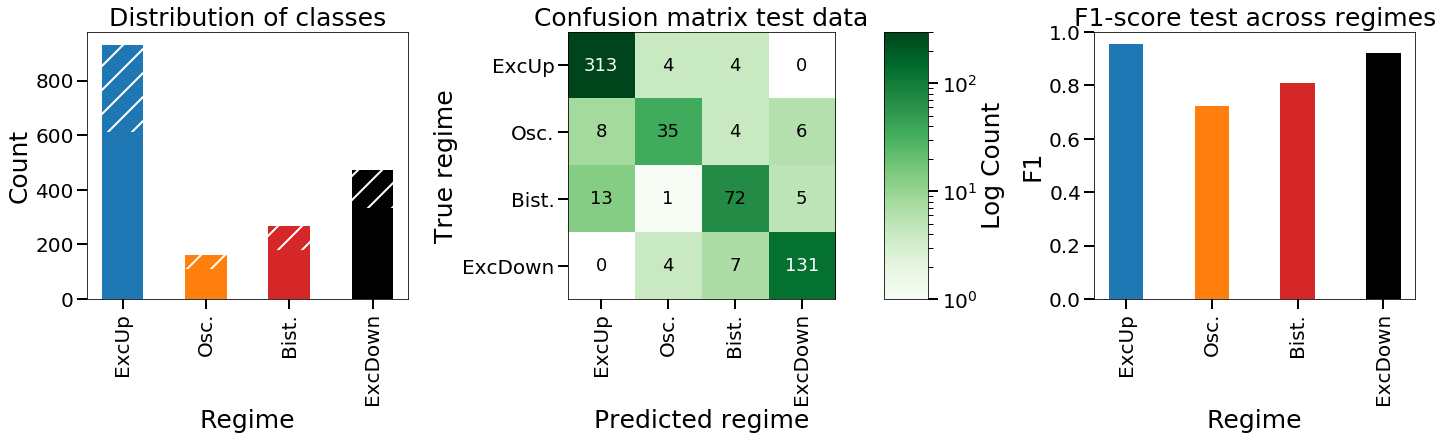

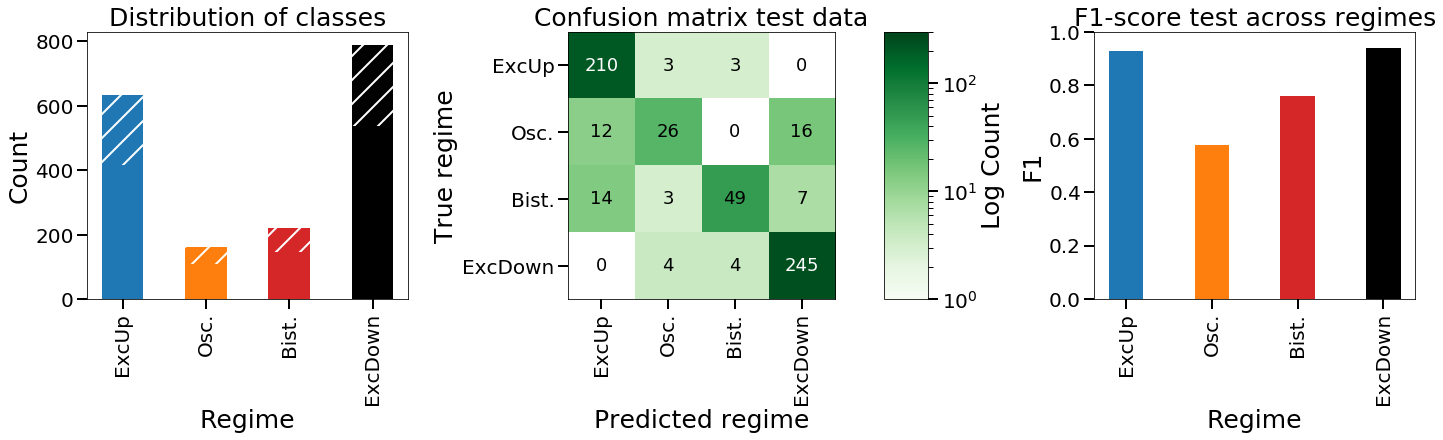

TRAIN on ADD , Predict on MULT


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


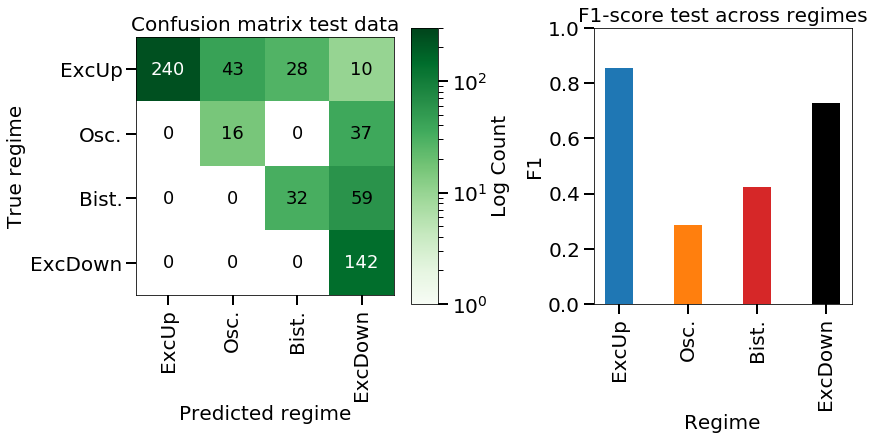

TRAIN on MULT , Predict on ADD


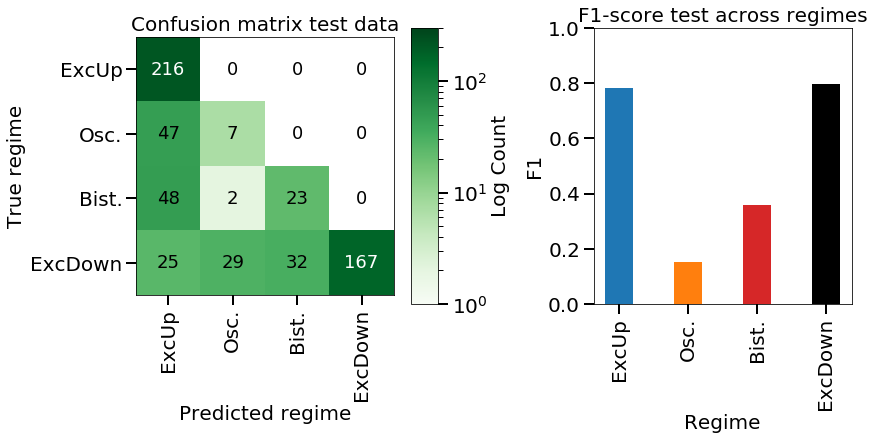

In [51]:
test_on_diff_noise_classify_regime(X_full_mult[:,[0,1,2,3,4,5,6,7]],X_full_add[:,[0,1,2,3,4,5,6,7]],label_full_mult_regime,label_full_add_regime)